## Load Module

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [289]:
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as profile   # To check data distributions and correlations
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
import pickle
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import missingno as msno
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
from sklearn.model_selection import train_test_split

#### Installing missing package 

In [6]:
!pip install pandas_profiling


In [7]:
!pip install tensorflow

## Load Data

In [8]:
#Load Train Dataset

Train=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

Test=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("/Users/kkisho15/Documents/repos/Data_science/188596_421248_bundle_archive/Test_Outpatientdata-1542969243754.csv")


#### checking shape and size of each Dataset

In [9]:
#Shape of Dataset
print("Train Data Shape:-")
print("Train Data Shape:-",Train.shape)
print("Train_Beneficiarydata data shape:-",Train_Beneficiarydata.shape)
print("Train_Inpatientdata data shape:-",Train_Inpatientdata.shape)
print("Train_Outpatientdata data shape:-",Train_Outpatientdata.shape)
print("Test Data After This Line:-")
print("Test data shape:-",Test.shape)
print("Test_Beneficiarydata data shape:-",Test_Beneficiarydata.shape)
print("Test_Inpatientdata data shape:-",Test_Inpatientdata.shape)
print("Test_Outpatientdata data shape:-",Test_Outpatientdata.shape)

Train Data Shape:-
Train Data Shape:- (5410, 2)
Train_Beneficiarydata data shape:- (138556, 25)
Train_Inpatientdata data shape:- (40474, 30)
Train_Outpatientdata data shape:- (517737, 27)
Test Data After This Line:-
Test data shape:- (1353, 1)
Test_Beneficiarydata data shape:- (63968, 25)
Test_Inpatientdata data shape:- (9551, 30)
Test_Outpatientdata data shape:- (125841, 27)


In [10]:
#shape of Train and Test Data

print('Train Shape:',Train.shape,'\n')
print('Train Sample:\n',Train.head(2),'\n')

print('\n Test Shape:',Test.shape,'\n')
print('Test Sample: \n',Test.head(2))

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


In [11]:
Train.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [12]:
Test.head()

Provider
0  PRV51002
1  PRV51006
2  PRV51009
3  PRV51010
4  PRV51018

In [13]:
Test_Beneficiarydata.head()

BeneID         DOB         DOD  Gender  Race RenalDiseaseIndicator  \
0  BENE11001  1943-01-01         NaN       1     1                     0   
1  BENE11007  1940-09-01  2009-12-01       1     2                     0   
2  BENE11010  1936-07-01         NaN       2     1                     0   
3  BENE11011  1914-03-01         NaN       2     2                     0   
4  BENE11014  1938-04-01         NaN       2     1                     Y   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     45     610                   12                   12  ...   
2     41      30                   12                   12  ...   
3      1     360                   12                   12  ...   
4     45     780                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     1                          2   
2                       2                     1                          1   
3                       1                     1                          2   
4                       1                     2                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         1                                1   
2                         1                                2   
3                         2                                1   
4                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   
2                   2                         0                      0   
3                   1                      5000                   1068   
4                   2                     21260                   2136   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                      1490                    160  
2                      1170                    660  
3                       250                    320  
4                       120                    100  

[5 rows x 25 columns]

In [14]:
Test_Inpatientdata.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-09-09  ...               5990                 570   
1            NaN  2008-12-25  ...               4549               29570   
2            NaN  2009-12-09  ...              78650                7813   
3            NaN  2009-06-23  ...               4254               41400   
4            NaN  2009-01-20  ...              V6109                7242   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0              41071                4280             4443.0   
1              34831                 NaN             5551.0   
2               4254                 NaN                NaN   
3               5849               41401             8152.0   
4                NaN                 NaN                NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0             5849.0                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3             3320.0                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

In [15]:
Test_Outpatientdata.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2  BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3  BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4  BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   
2                     200          PHY425311                NaN   
3                      10          PHY393253          PHY347995   
4                      10          PHY417685                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0      PHY347633              V5832  ...                NaN   
1      PHY381777               9594  ...                NaN   
2      PHY425311               7248  ...                NaN   
3            NaN              58889  ...                NaN   
4      PHY382041               V666  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                    NaN  
1                 0                    NaN  
2                 0                    NaN  
3                 0                   5939  
4                 0                    NaN  

[5 rows x 27 columns]

In [16]:
Train_Beneficiarydata.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   
2                       2                     2                          1   
3                       2                     1                          1   
4                       2                     1                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   
2                         2                                2   
3                         1                                1   
4                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   
2                   2                         0                      0   
3                   2                         0                      0   
4                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200  

[5 rows x 25 columns]

In [17]:
Train_Inpatientdata.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   
2      PHY324689  2009-09-17  ...                NaN                 NaN   
3      PHY349768  2009-02-14  ...              25062               40390   
4            NaN  2009-08-13  ...               5119               29620   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   
2                NaN                 NaN                NaN   
3               4019                 NaN              331.0   
4              20300                 NaN             3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

In [18]:
Train_Outpatientdata.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723  ...                NaN   
3            NaN              71988  ...                NaN   
4            NaN              82382  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                  56409  
1                 0                  79380  
2                 0                    NaN  
3                 0                    NaN  
4                 0                  71947  

[5 rows x 27 columns]

In [19]:
## Lets check whether  providers details are unique or not in train data
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in Train :',Train.isna().sum().sum())

print('\n Total missing values in Train :',Test.isna().sum().sum())

PRV55133    1
PRV54357    1
Name: Provider, dtype: int64

 Total missing values in Train : 0

 Total missing values in Train : 0


## Graphical Representation of Null Data for each Dataset using missingno module

<AxesSubplot:>

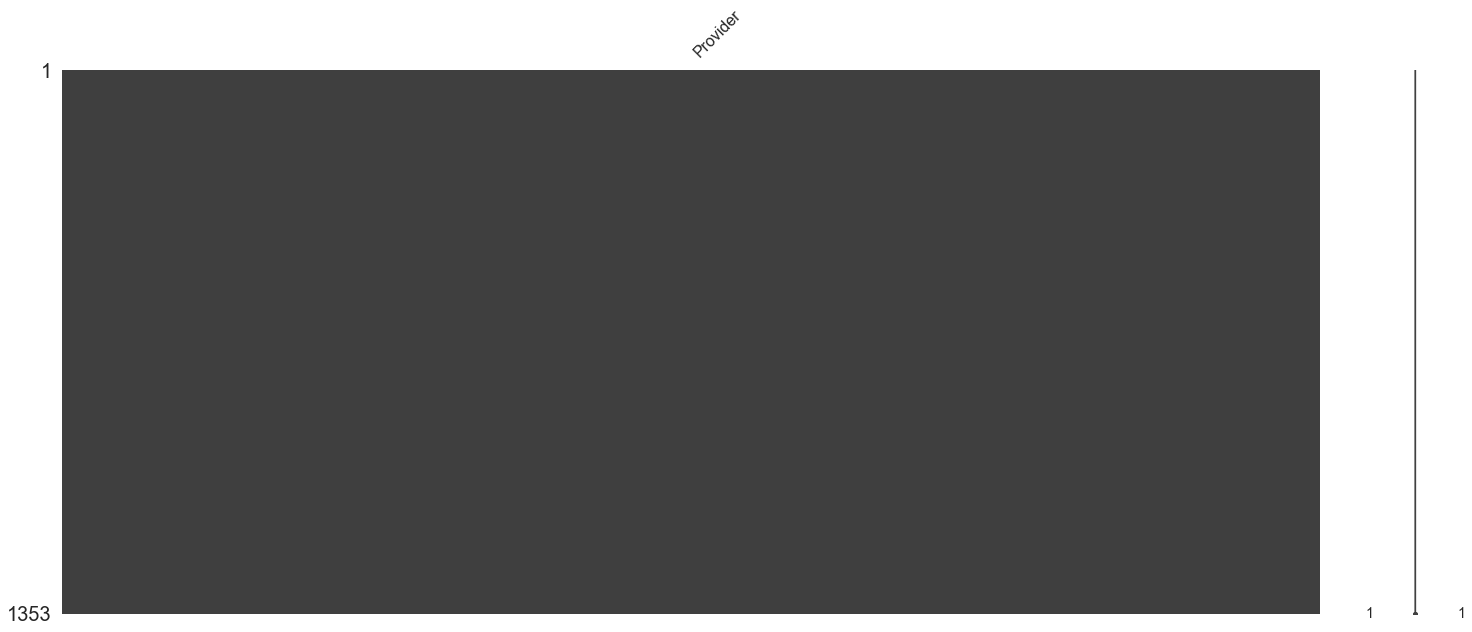

In [20]:
msno.matrix(Test)

<AxesSubplot:>

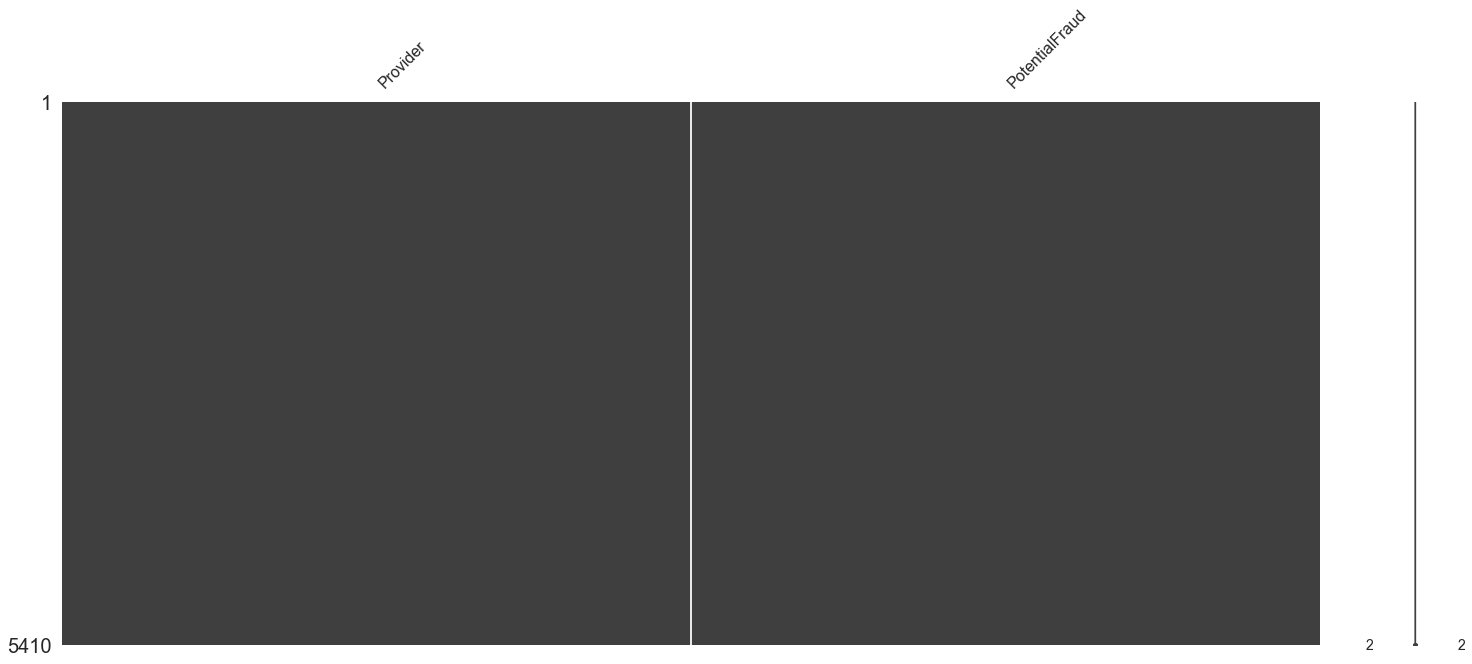

In [21]:
msno.matrix(Train)

AxesSubplot(0.125,0.125;0.698618x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)


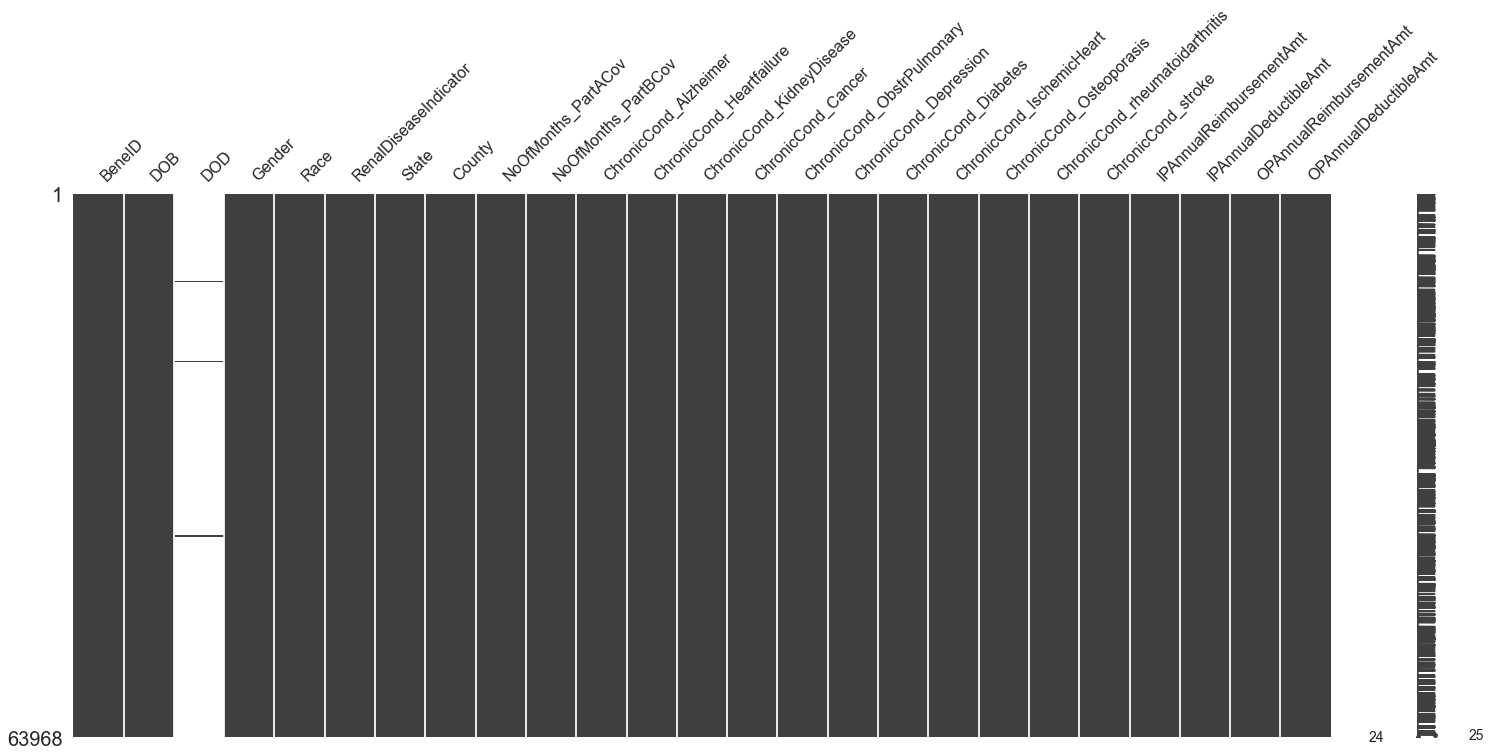

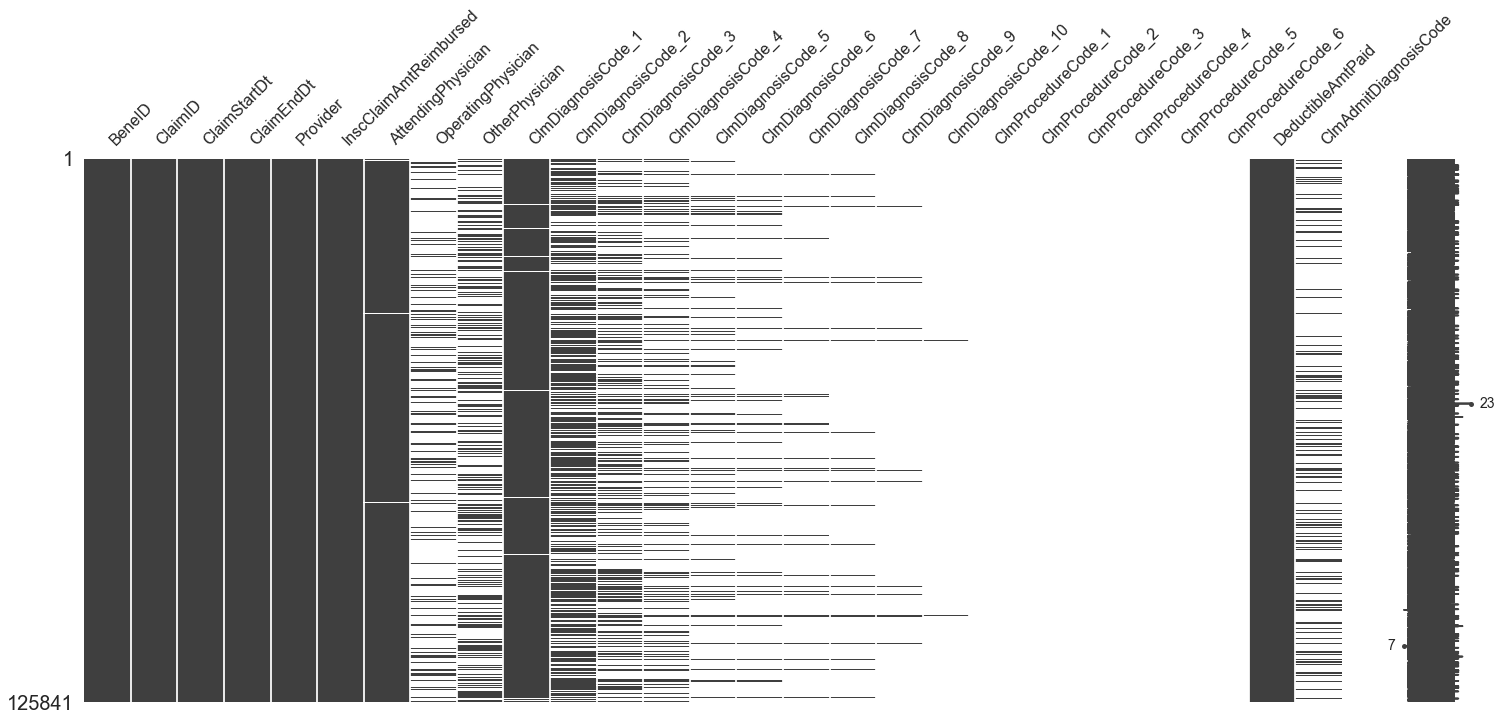

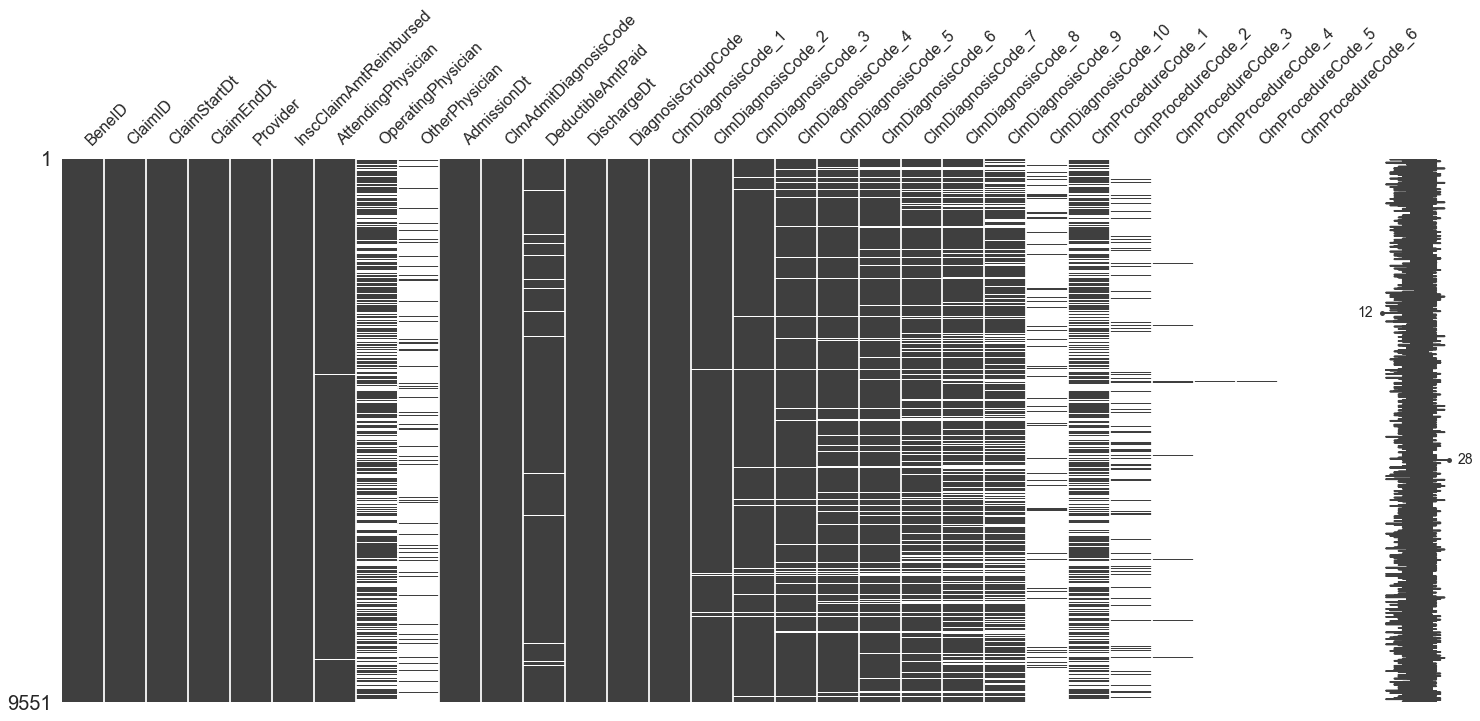

In [22]:
print(msno.matrix(Test_Beneficiarydata))
print(msno.matrix(Test_Outpatientdata))
print(msno.matrix(Test_Inpatientdata))

AxesSubplot(0.125,0.125;0.698618x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)


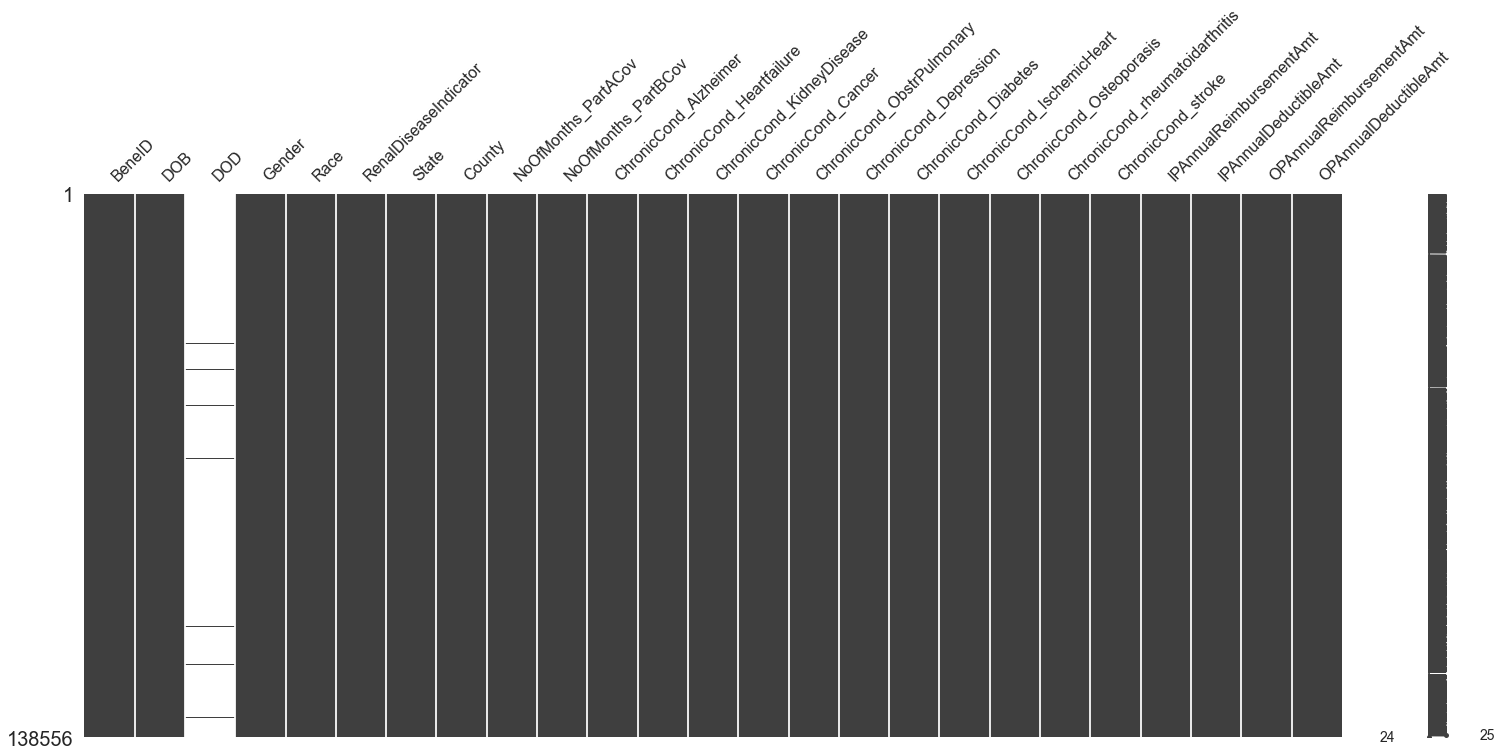

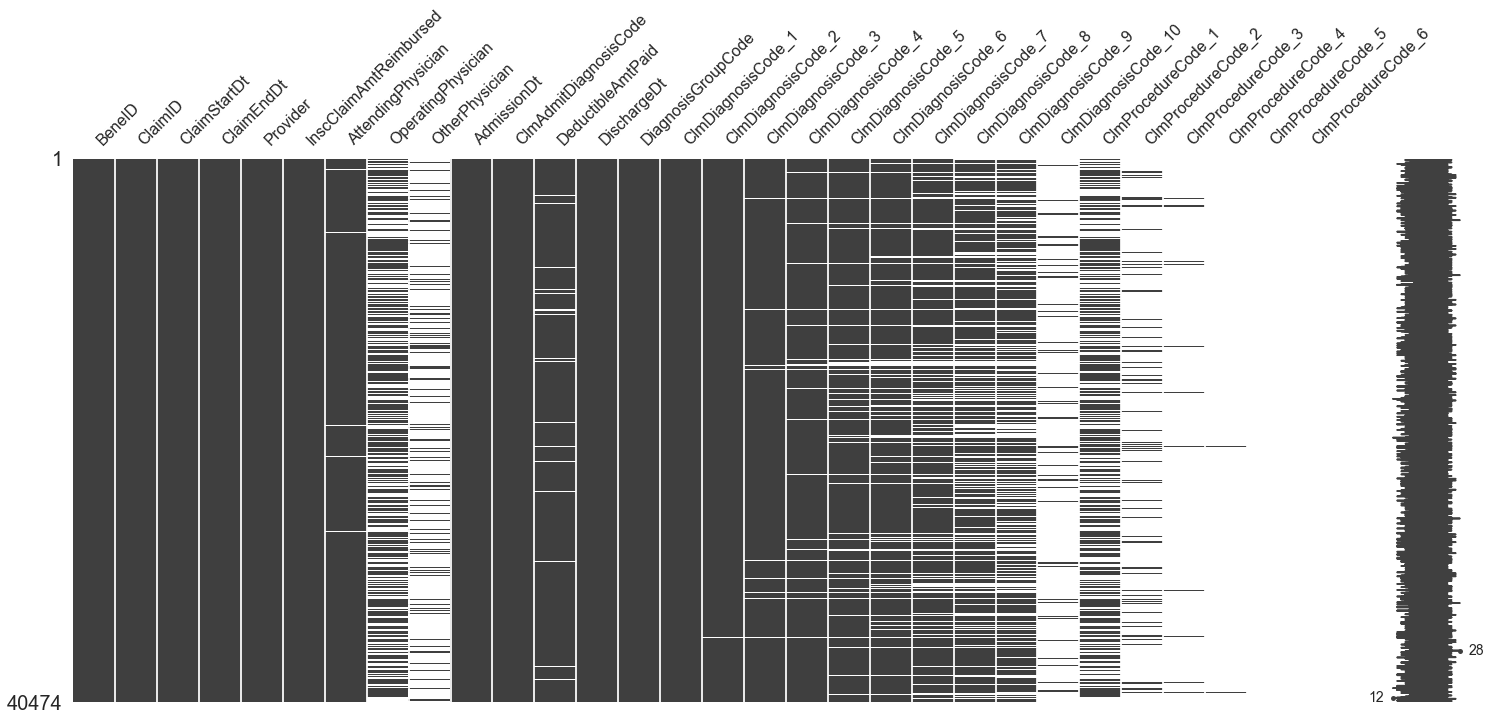

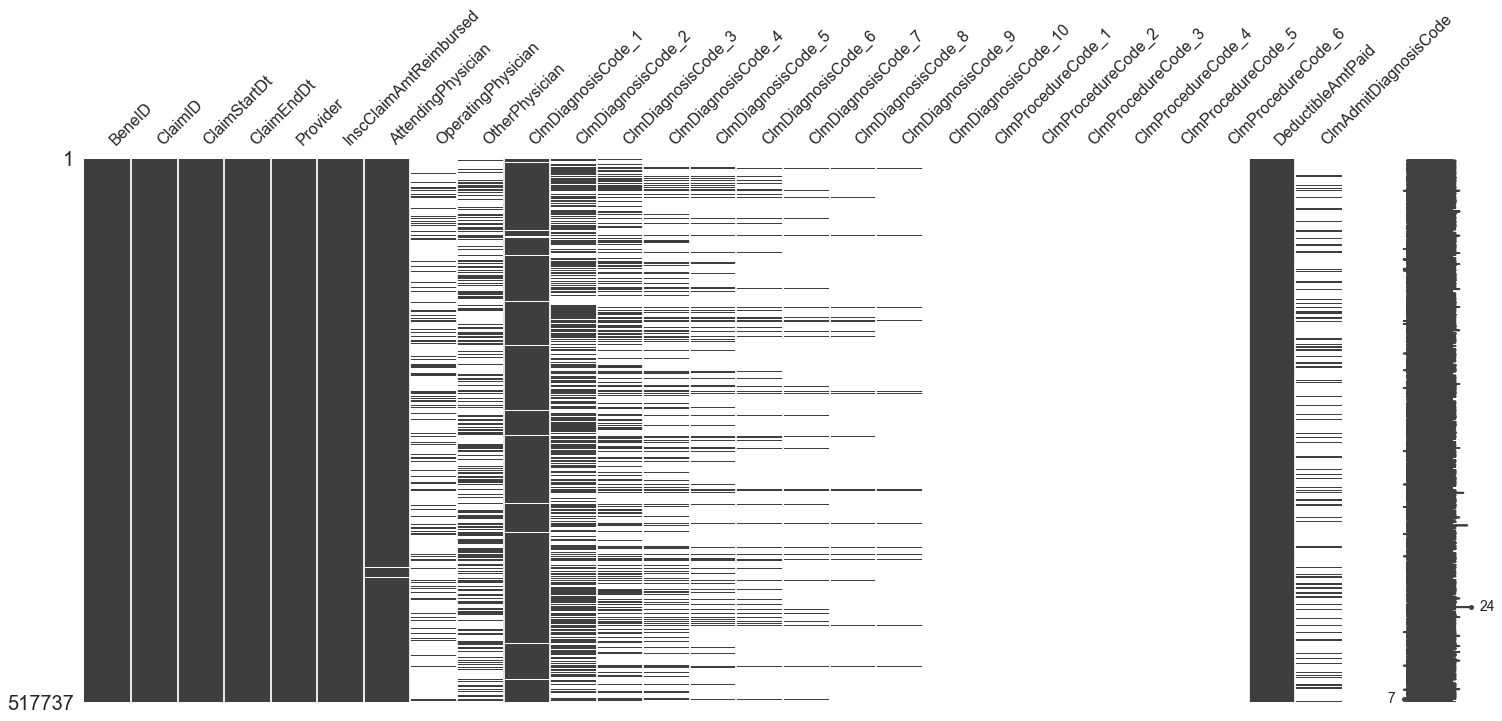

In [23]:
print(msno.matrix(Train_Beneficiarydata))
print(msno.matrix(Train_Inpatientdata))
print(msno.matrix(Train_Outpatientdata))

## Beneficiary Data

In [24]:
#Missing values in each column in beneficiary data :

Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [25]:
# Checking Data types of Beneficiary Data
Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [26]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [27]:
# Checking Beneficary data after replacing Disease value 
Train_Beneficiarydata.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     0                          0   
2                       0                     0                          1   
3                       0                     1                          1   
4                       0                     1                          0   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         1                                1   
4                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                         0                      0   
2                   0                         0                      0   
3                   0                         0                      0   
4                   0                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200  

[5 rows x 25 columns]

In [28]:
Test_Beneficiarydata.head()

BeneID         DOB         DOD  Gender  Race RenalDiseaseIndicator  \
0  BENE11001  1943-01-01         NaN       1     1                     0   
1  BENE11007  1940-09-01  2009-12-01       1     2                     0   
2  BENE11010  1936-07-01         NaN       2     1                     0   
3  BENE11011  1914-03-01         NaN       2     2                     0   
4  BENE11014  1938-04-01         NaN       2     1                     1   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     45     610                   12                   12  ...   
2     41      30                   12                   12  ...   
3      1     360                   12                   12  ...   
4     45     780                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     1                          0   
2                       0                     1                          1   
3                       1                     1                          0   
4                       1                     0                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         1                                1   
2                         1                                0   
3                         0                                1   
4                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                         0                      0   
2                   0                         0                      0   
3                   1                      5000                   1068   
4                   0                     21260                   2136   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                      1490                    160  
2                      1170                    660  
3                       250                    320  
4                       120                    100  

[5 rows x 25 columns]

In [29]:
# Feature Engineering for column Age
# Creating new feature Age Column for Dataset so that we can find age of each patient
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [30]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01        NaT       1     1                     0     39   
1  BENE11007 1940-09-01 2009-12-01       1     2                     0     45   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     610                   12                   12  ...   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         0   
1                     1                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   

   OPAnnualDeductibleAmt   Age  
0                     70   NaN  
1                    160  69.0  

[2 rows x 26 columns]

In [31]:
#DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009. Age calculation will be done till year 2009
Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [32]:

Test_Beneficiarydata.head(2)

BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01        NaT       1     1                     0     39   
1  BENE11007 1940-09-01 2009-12-01       1     2                     0     45   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     610                   12                   12  ...   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         0   
1                     1                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   

   OPAnnualDeductibleAmt   Age  
0                     70  67.0  
1                    160  69.0  

[2 rows x 26 columns]

In [33]:
Train_Beneficiarydata.head(2)

BeneID        DOB DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 NaT       1     1                     0     39   
1  BENE11002 1936-09-01 NaT       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         0   
1                     0                          0                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   

   OPAnnualDeductibleAmt   Age  
0                     70  67.0  
1                     50  73.0  

[2 rows x 26 columns]

In [34]:
# Feature Engineering for column WhetherDead
#New feature which determines person is dead or not. Feature name is WhetherDead
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1
print(Train_Beneficiarydata.loc[:,'WhetherDead'].head(7))
Train_Beneficiarydata.head()


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1
print(Test_Beneficiarydata.loc[:,'WhetherDead'].head(3))
Train_Beneficiarydata.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: WhetherDead, dtype: float64
0    0.0
1    1.0
2    0.0
Name: WhetherDead, dtype: float64


BeneID        DOB DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 NaT       1     1                     0     39   
1  BENE11002 1936-09-01 NaT       2     1                     0     39   
2  BENE11003 1936-08-01 NaT       1     1                     0     52   
3  BENE11004 1922-07-01 NaT       1     1                     0     39   
4  BENE11005 1935-09-01 NaT       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         0   
2                          1                         0   
3                          1                         1   
4                          0                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   
2                                0                   0   
3                                1                   0   
4                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt   Age  WhetherDead  
0                     70  67.0          0.0  
1                     50  73.0          0.0  
2                     40  73.0          0.0  
3                    760  87.0          0.0  
4                   1200  74.0          0.0  

[5 rows x 27 columns]

In [35]:
Test_Beneficiarydata.head()

BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01        NaT       1     1                     0     39   
1  BENE11007 1940-09-01 2009-12-01       1     2                     0     45   
2  BENE11010 1936-07-01        NaT       2     1                     0     41   
3  BENE11011 1914-03-01        NaT       2     2                     0      1   
4  BENE11014 1938-04-01        NaT       2     1                     1     45   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     610                   12                   12  ...   
2      30                   12                   12  ...   
3     360                   12                   12  ...   
4     780                   12                   12  ...   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         1   
2                          1                         1   
3                          0                         0   
4                          1                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   0   
2                                0                   0   
3                                1                   1   
4                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   
2                         0                      0                      1170   
3                      5000                   1068                       250   
4                     21260                   2136                       120   

   OPAnnualDeductibleAmt   Age  WhetherDead  
0                     70  67.0          0.0  
1                    160  69.0          1.0  
2                    660  73.0          0.0  
3                    320  96.0          0.0  
4                    100  72.0          0.0  

[5 rows x 27 columns]

## InpatientData

In [36]:
#missing value in Train_inpatient data
Train_Inpatientdata.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [37]:
#Missing value in Test Inpatient Data
Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [38]:
# Feature engineering for column AdminForDays
# As we have Admission Date and Discharge Date using this we can create new feature which helps to tell how many days patient admits in hospital
Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [39]:
Train_Inpatientdata.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_8  ClmDiagnosisCode_9  \
0            NaN  2009-04-12  ...              19889                5849   
1            NaN  2009-08-31  ...                NaN                 NaN   
2      PHY324689  2009-09-17  ...                NaN                 NaN   
3      PHY349768  2009-02-14  ...              40390                4019   
4            NaN  2009-08-13  ...              29620               20300   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN             7092.0                NaN   
2                 NaN                NaN                NaN   
3                 NaN              331.0                NaN   
4                 NaN             3893.0                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  AdmitForDays  
0            7  
1            3  
2            4  
3            9  
4           18  

[5 rows x 31 columns]

In [40]:
Test_Inpatientdata.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_8  ClmDiagnosisCode_9  \
0            NaN  2009-09-09  ...                570               41071   
1            NaN  2008-12-25  ...              29570               34831   
2            NaN  2009-12-09  ...               7813                4254   
3            NaN  2009-06-23  ...              41400                5849   
4            NaN  2009-01-20  ...               7242                 NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                4280             4443.0             5849.0   
1                 NaN             5551.0                NaN   
2                 NaN                NaN                NaN   
3               41401             8152.0             3320.0   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  AdmitForDays  
0            8  
1           15  
2            5  
3           14  
4           12  

[5 rows x 31 columns]

In [41]:
#Min and Max values for Admit for days data
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36





## OutpatientData

In [42]:
#Null value for Train dataset
Train_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [43]:
#Null value for test dataset
Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

#### Checking columns for each dataset

In [44]:
Train_Outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [45]:
Test_Outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [46]:
Train_Inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitForDays'],
      dtype='object')

In [47]:
Test_Inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitForDays'],
      dtype='object')

In [48]:
#Shape of Dataset after adding few fields
print("Train Data Shape:-")
print("Train Data Shape:-",Train.shape)
print("Train_Beneficiarydata data shape:-",Train_Beneficiarydata.shape)
print("Train_Inpatientdata data shape:-",Train_Inpatientdata.shape)
print("Train_Outpatientdata data shape:-",Train_Outpatientdata.shape)
print("Test Data After This Line:-")
print("Test data shape:-",Test.shape)
print("Test_Beneficiarydata data shape:-",Test_Beneficiarydata.shape)
print("Test_Inpatientdata data shape:-",Test_Inpatientdata.shape)
print("Test_Outpatientdata data shape:-",Test_Outpatientdata.shape)

Train Data Shape:-
Train Data Shape:- (5410, 2)
Train_Beneficiarydata data shape:- (138556, 27)
Train_Inpatientdata data shape:- (40474, 31)
Train_Outpatientdata data shape:- (517737, 27)
Test Data After This Line:-
Test data shape:- (1353, 1)
Test_Beneficiarydata data shape:- (63968, 27)
Test_Inpatientdata data shape:- (9551, 31)
Test_Outpatientdata data shape:- (125841, 27)


## Data Merging

In [49]:
#Union of Train Inpatient data and Outpatient data
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [50]:
#union of Test inpatient data and outpatient data
Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [51]:
Test_Allpatientdata.shape

(135392, 31)

In [52]:
Train_Allpatientdata.shape

(558211, 31)

In [53]:
Test_Allpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'AdmitForDays'],
      dtype='object')

In [54]:
Train_Allpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'AdmitForDays'],
      dtype='object')

In [55]:
Test_Allpatientdata

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1        BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2        BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3        BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4        BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   
...            ...        ...          ...         ...       ...   
135387  BENE159139   CLM61015   2009-07-24  2009-07-26  PRV55021   
135388  BENE159143   CLM42885   2009-03-16  2009-03-29  PRV55017   
135389  BENE159155   CLM67124   2009-09-07  2009-10-12  PRV53758   
135390  BENE159181   CLM72016   2009-10-14  2009-10-17  PRV57195   
135391  BENE159196   CLM47313   2009-04-17  2009-04-18  PRV51854   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY347633                NaN   
1                           30          PHY381777                NaN   
2                          200          PHY425311                NaN   
3                           10          PHY393253          PHY347995   
4                           10          PHY417685                NaN   
...                        ...                ...                ...   
135387                   23000          PHY406228          PHY406228   
135388                   34000          PHY354080                NaN   
135389                    5000          PHY338118                NaN   
135390                    3000          PHY328451                NaN   
135391                    2000          PHY377087                NaN   

       OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_3  \
0           PHY347633              V5832  ...                NaN   
1           PHY381777               9594  ...                NaN   
2           PHY425311               7248  ...                NaN   
3                 NaN              58889  ...                NaN   
4           PHY382041               V666  ...                NaN   
...               ...                ...  ...                ...   
135387            NaN              57400  ...                NaN   
135388            NaN              V5789  ...                NaN   
135389            NaN               1981  ...                NaN   
135390            NaN              43311  ...                NaN   
135391            NaN              41400  ...                NaN   

       ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
135387                NaN                NaN                NaN   
135388                NaN                NaN                NaN   
135389                NaN                NaN                NaN   
135390                NaN                NaN                NaN   
135391                NaN                NaN                NaN   

       DeductibleAmtPaid ClmAdmitDiagnosisCode AdmissionDt DischargeDt  \
0                    0.0                   NaN         NaT         NaT   
1                    0.0                   NaN         NaT         NaT   
2                    0.0                   NaN         NaT         NaT   
3                    0.0                  5939         NaT         NaT   
4                    0.0                   NaN         NaT         NaT   
...                  ...                   ...         ...         ...   
135387            1068.0                 57400  2009-07-24  2009-07-26   
135388            1068.0                 V5789  2009-03-16  2009-03-29   
135389            1068.0                 7

In [56]:
Train_Allpatientdata

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0        BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1        BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2        BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3        BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4        BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   
...            ...        ...          ...         ...       ...   
558206  BENE159167   CLM69886   2009-09-28  2009-10-02  PRV53671   
558207  BENE159175   CLM74504   2009-11-03  2009-11-06  PRV54981   
558208  BENE159177   CLM76485   2009-11-18  2009-11-22  PRV56588   
558209  BENE159177   CLM79949   2009-12-17  2009-12-18  PRV56575   
558210  BENE159188   CLM69948   2009-09-28  2009-10-06  PRV54765   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                           30          PHY326117                NaN   
1                           80          PHY362868                NaN   
2                           10          PHY328821                NaN   
3                           40          PHY334319                NaN   
4                          200          PHY403831                NaN   
...                        ...                ...                ...   
558206                    7000          PHY345332          PHY319565   
558207                    4000          PHY342806          PHY365497   
558208                    3000          PHY423220          PHY332752   
558209                    5000          PHY353156                NaN   
558210                   15000          PHY431177          PHY352941   

       OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_3  \
0                 NaN              78943  ...                NaN   
1                 NaN               6115  ...                NaN   
2                 NaN               2723  ...                NaN   
3                 NaN              71988  ...                NaN   
4                 NaN              82382  ...                NaN   
...               ...                ...  ...                ...   
558206            NaN               2851  ...                NaN   
558207            NaN              42823  ...                NaN   
558208            NaN               4280  ...                NaN   
558209            NaN               7802  ...                NaN   
558210            NaN               1540  ...                NaN   

       ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
558206                NaN                NaN                NaN   
558207                NaN                NaN                NaN   
558208                NaN                NaN                NaN   
558209                NaN                NaN                NaN   
558210                NaN                NaN                NaN   

       DeductibleAmtPaid ClmAdmitDiagnosisCode AdmissionDt DischargeDt  \
0                    0.0                 56409         NaT         NaT   
1                    0.0                 79380         NaT         NaT   
2                    0.0                   NaN         NaT         NaT   
3                    0.0                   NaN         NaT         NaT   
4                    0.0                 71947         NaT         NaT   
...                  ...                   ...         ...         ...   
558206            1068.0                  2859  2009-09-28  2009-10-02   
558207            1068.0                 79902  2009-11-03  2009-11-06   
558208            1068.0                 7

In [57]:
Train_Beneficiarydata.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'WhetherDead'],
      dtype='object')

In [58]:
Train_Allpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'AdmitForDays'],
      dtype='object')

In [59]:
# Joining all patient train data with beneficiary data
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [60]:
# Joining all patient test data with beneficiary data
Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [61]:
Train_AllPatientDetailsdata.shape

(558211, 57)

In [62]:
Test_AllPatientDetailsdata.shape

(135392, 57)

In [63]:
Train_AllPatientDetailsdata.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0            NaN              78943  ...                         0   
1            NaN               6115  ...                         1   
2            NaN               2723  ...                         1   
3            NaN              71988  ...                         1   
4            NaN              82382  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        0                               0                  0   
1                        0                               0                  0   
2                        0                               0                  0   
3                        1                               1                  0   
4                        1                               1                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                        0                     0                       30   
1                        0                     0                       90   
2                        0                     0                       90   
3                        0                     0                     1810   
4                        0                     0                     1810   

  OPAnnualDeductibleAmt   Age  WhetherDead  
0                    50  73.0          0.0  
1                    40  73.0          0.0  
2                    40  73.0          0.0  
3                   760  87.0          0.0  
4                   760  87.0          0.0  

[5 rows x 57 columns]

In [64]:
# Checking features after merge
Train_AllPatientDetailsdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'AdmitForDays', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressi

In [65]:
Test_AllPatientDetailsdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'AdmitForDays', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depressi

In [66]:
Test_AllPatientDetailsdata.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2  BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3  BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4  BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   
2                     200          PHY425311                NaN   
3                      10          PHY393253          PHY347995   
4                      10          PHY417685                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0      PHY347633              V5832  ...                         1   
1      PHY381777               9594  ...                         1   
2      PHY425311               7248  ...                         0   
3            NaN              58889  ...                         0   
4      PHY382041               V666  ...                         0   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        0                               1                  1   
1                        0                               1                  1   
2                        1                               1                  0   
3                        1                               1                  0   
4                        1                               1                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                    36000                  3204                       60   
1                    36000                  3204                       60   
2                        0                     0                     1490   
3                        0                     0                     1490   
4                        0                     0                     1490   

  OPAnnualDeductibleAmt   Age  WhetherDead  
0                    70  67.0          0.0  
1                    70  67.0          0.0  
2                   160  69.0          1.0  
3                   160  69.0          1.0  
4                   160  69.0          1.0  

[5 rows x 57 columns]

In [67]:
Train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [68]:
Test.columns

Index(['Provider'], dtype='object')

In [69]:
#Joining all train data with Train data
Train_ProviderAllData=pd.merge(Train,Train_AllPatientDetailsdata,on='Provider')

In [70]:
#Joining all test data with test data
Test_ProviderAllData=pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')

In [71]:
Train_ProviderAllData.shape

(558211, 58)

In [72]:
Test_ProviderAllData.shape

(135392, 57)

#### Checking Missing value in percentage for each dataset

In [73]:
#Missing value percentage for each feature in Train data set
Train_ProviderAllData.isnull().sum()*100/len(Train_ProviderAllData)

Provider                             0.000000
PotentialFraud                       0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                  90.425843
ClmDiagnosisCode_9                  92.509105
ClmDiagnosisCode_10                 99.102490
ClmProcedureCode_1                  95.824160
ClmProcedureCode_2                

In [74]:
# Missing value percentage of each feature in test data set
Test_ProviderAllData.isnull().sum()*100/len(Test_ProviderAllData)

Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

#### checking data type after merging all data

In [75]:
Train_ProviderAllData.dtypes

Provider                                   object
PotentialFraud                             object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object


In [76]:
Test_ProviderAllData.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


#### Summary of our dataset

In [77]:
Train_ProviderAllData.describe()

InscClaimAmtReimbursed  ClmProcedureCode_1  ClmProcedureCode_2  \
count           558211.000000        23310.000000         5490.000000   
mean               997.012133         5896.154612         4106.358106   
std               3821.534891         3050.489933         2031.640878   
min                  0.000000           11.000000           42.000000   
25%                 40.000000         3848.000000         2724.000000   
50%                 80.000000         5363.000000         4019.000000   
75%                300.000000         8669.000000         4439.000000   
max             125000.000000         9999.000000         9999.000000   

       ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
count          969.000000          118.000000            9.000000   
mean          4221.123839         4070.262712         5269.444444   
std           2281.849885         2037.626990         2780.071632   
min             42.000000           42.000000         2724.000000   
25%           2724.000000         2754.250000         4139.000000   
50%           4019.000000         4019.000000         4139.000000   
75%           5185.000000         4439.000000         5185.000000   
max           9999.000000         9986.000000         9982.000000   

       ClmProcedureCode_6  DeductibleAmtPaid  AdmitForDays         Gender  \
count                 0.0      557312.000000  40474.000000  558211.000000   
mean                  NaN          78.421085      6.665168       1.578838   
std                   NaN         274.016812      5.638538       0.493746   
min                   NaN           0.000000      1.000000       1.000000   
25%                   NaN           0.000000      3.000000       1.000000   
50%                   NaN           0.000000      5.000000       2.000000   
75%                   NaN           0.000000      8.000000       2.000000   
max                   NaN        1068.000000     36.000000       2.000000   

       ...  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
count  ...              558211.000000             558211.000000   
mean   ...                   0.759265                  0.317647   
std    ...                   0.427530                  0.465562   
min    ...                   0.000000                  0.000000   
25%    ...                   1.000000                  0.000000   
50%    ...                   1.000000                  0.000000   
75%    ...                   1.000000                  1.000000   
max    ...                   1.000000                  1.000000   

       ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
count                    558211.000000       558211.000000   
mean                          0.311171            0.101720   
std                           0.462973            0.302279   
min                           0.000000            0.000000   
25%                           0.000000            0.000000   
50%                           0.000000            0.000000   
75%                           1.000000            0.000000   
max                           1.000000            1.000000   

       IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
count             558211.000000          558211.000000   
mean                5227.971466             568.756807   
std                11786.274732            1179.172616   
min                -8000.000000               0.000000   
25%                    0.000000               0.000000   
50%                    0.000000               0.000000   
75%                 6000.000000            1068.000000   
max               161470.000000           38272.000000   

       OPAnnualReimbursementAmt  OPAnnualDeductibleAmt            Age  \
count             558211.000000          558211.000000  558211.000000   
mean                2278.225348             649.698745      73.769770   
std                 3881.846386            1002.020811      13.022524   
min                  -70.000000               0.000000 

In [78]:
Test_ProviderAllData.describe()

InscClaimAmtReimbursed  ClmProcedureCode_1  ClmProcedureCode_2  \
count           135392.000000         5467.000000         1263.000000   
mean               981.307906         5905.430766         4138.790182   
std               3788.177532         3057.976988         2042.016095   
min                  0.000000           14.000000           42.000000   
25%                 40.000000         3891.000000         2749.000000   
50%                 80.000000         5369.000000         4019.000000   
75%                300.000000         8741.000000         4439.000000   
max             125000.000000         9999.000000         9998.000000   

       ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
count          225.000000           29.000000            2.000000   
mean          4182.213333         4509.931034         7055.500000   
std           2165.057828         2571.379659         4124.553855   
min            185.000000          260.000000         4139.000000   
25%           2724.000000         3320.000000         5597.250000   
50%           4019.000000         4263.000000         7055.500000   
75%           5121.000000         5781.000000         8513.750000   
max           9984.000000         9971.000000         9972.000000   

       ClmProcedureCode_6  DeductibleAmtPaid  AdmitForDays         Gender  \
count                 0.0      135196.000000   9551.000000  135392.000000   
mean                  NaN          76.499194      6.776568       1.576231   
std                   NaN         270.779562      5.826400       0.494157   
min                   NaN           0.000000      1.000000       1.000000   
25%                   NaN           0.000000      3.000000       1.000000   
50%                   NaN           0.000000      5.000000       2.000000   
75%                   NaN           0.000000      8.000000       2.000000   
max                   NaN        1068.000000     36.000000       2.000000   

       ...  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
count  ...              135392.000000             135392.000000   
mean   ...                   0.759617                  0.316363   
std    ...                   0.427318                  0.465058   
min    ...                   0.000000                  0.000000   
25%    ...                   1.000000                  0.000000   
50%    ...                   1.000000                  0.000000   
75%    ...                   1.000000                  1.000000   
max    ...                   1.000000                  1.000000   

       ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
count                    135392.000000       135392.000000   
mean                          0.310077            0.104578   
std                           0.462527            0.306010   
min                           0.000000            0.000000   
25%                           0.000000            0.000000   
50%                           0.000000            0.000000   
75%                           1.000000            0.000000   
max                           1.000000            1.000000   

       IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
count             135392.000000          135392.000000   
mean                5271.108559             575.083978   
std                11746.248324            1211.898840   
min                -1000.000000               0.000000   
25%                    0.000000               0.000000   
50%                    0.000000               0.000000   
75%                 6000.000000            1068.000000   
max               155600.000000           38272.000000   

       OPAnnualReimbursementAmt  OPAnnualDeductibleAmt            Age  \
count             135392.000000          135392.000000  135392.000000   
mean                2277.197988             645.259572      73.791605   
std                 3985.942527             997.355872      12.905014   
min                  -60.000000               0.000000 

## Exploratory Data Analysis

Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


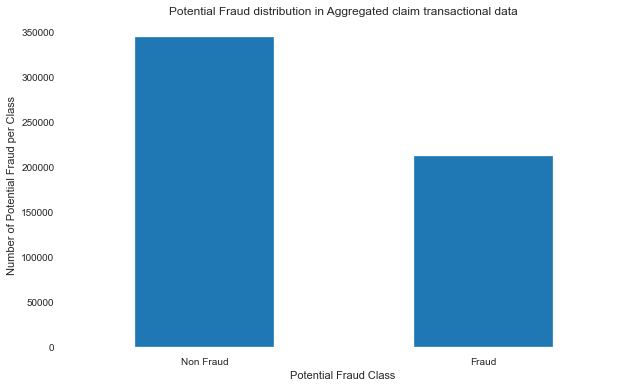

In [79]:
#Fraud and non fraud mergerd data
sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(Train_ProviderAllData['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(Train_ProviderAllData))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of Potential Fraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')


In [80]:
!pip install chart_studio

In [81]:
# Frequencies of fraud and non-fraud transactions in the train data
count_classes_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes_provider*100/len(Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in individual Providers data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

Percent Distribution of Potential Fraud class:- 
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


Text(0, 0.5, 'Number of PotentialFraud per Class ')

#### From the above 2 graphs ,Its easy to say that the proportion of fradulent claim transactions are more compared to non fraud providers.So we must get insights from number of claim transactions and amounts involved per - Beneficiary | Beneficiary + Physician |Physician | Diagnosis | Procedure etc...

In [82]:
print('Providers NonFraud|Fraud Class Percent Distribution in Whole dataset :\n',count_classes/len(Train_ProviderAllData)*100)

Providers NonFraud|Fraud Class Percent Distribution in Whole dataset :
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


In [83]:
print('Providers NonFraud|Fraud Class Percent Distribution :\n',count_classes_provider/len(Train)*100)

Providers NonFraud|Fraud Class Percent Distribution :
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


### Find out the procedure and diagnosis involved in fraud

In [84]:
len(Train_Inpatientdata)

40474

In [85]:
Train_f =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_f = Train.loc[(Train['PotentialFraud'] == 'Yes')]
fraud_provider_ip_df = pd.merge(Train_Inpatientdata, Train_f, how='inner', on='Provider')
len(fraud_provider_ip_df)

23402

In [86]:
(len(fraud_provider_ip_df)/len(Train_Inpatientdata)) * 100

57.81983495577408

#### there are 23402 admitted(inpatients) cases that the potential fradulent providers have interacted with at one point or the other during their services at the hospital. This is around 58% of the cases which we have in our inpatient data.

#### This means from our inpatient dataset for training we can have fradulent activities on more than half of them - 58% are potential fradulent encounters

In [87]:
len(Train_Outpatientdata)

517737

In [88]:
fraud_provider_op_df = pd.merge(Train_Outpatientdata, Train_f, how='inner', on='Provider')
len(fraud_provider_op_df)


189394

In [89]:
(len(fraud_provider_op_df)/len(Train_Outpatientdata))*100

36.58112130290089

#### there are 189394 outpatient cases that the potential fradulent providers have interacted with at one point or the other during their services at the hospital. This is around 37% of the cases which we have in our inpatient data.

#### This means from our outpatient dataset for training we can have fradulent activities on around 38% of encounters

In [90]:
!pip install plotly

In [91]:
!pip install cufflinks

In [92]:
print(__version__)

4.9.0


In [93]:
init_notebook_mode(connected=True)

In [94]:
cf.go_offline()

In [95]:
Train_Beneficiarydata.head()

BeneID        DOB DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 NaT       1     1                     0     39   
1  BENE11002 1936-09-01 NaT       2     1                     0     39   
2  BENE11003 1936-08-01 NaT       1     1                     0     52   
3  BENE11004 1922-07-01 NaT       1     1                     0     39   
4  BENE11005 1935-09-01 NaT       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         0   
2                          1                         0   
3                          1                         1   
4                          0                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   
2                                0                   0   
3                                1                   0   
4                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt   Age  WhetherDead  
0                     70  67.0          0.0  
1                     50  73.0          0.0  
2                     40  73.0          0.0  
3                    760  87.0          0.0  
4                   1200  74.0          0.0  

[5 rows x 27 columns]

In [96]:
#PLotting the frequencies of Statewise beneficiaries
count_States = pd.value_counts(Train_Beneficiarydata['State'], sort = True)
#print("Percent Distribution of Beneficieries per state:- \n",count_States*100/len(Train_Beneficiarydata))

#Drawing a barplot
(count_States*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)

#Giving titles and labels to the plot

plt.annotate('Maximum Beneficiaries are from this State', xy=(0.01,8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title("State - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
plt.show()

plt.savefig('StateWiseBeneficiaryDistribution')

<Figure size 576x396 with 0 Axes>

#### Above Plot shows top states with their beneficiary percentage distribution.States 5,10,45,33 are top states in terms of beneficiary percentage

In [97]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... ChronicCond_IschemicHeart ChronicCond_Osteoporasis  \
0      PHY383007  ...                         1                        0   
1      PHY402512  ...                         1                        1   
2            NaN  ...                         1                        0   
3            NaN  ...                         1                        0   
4            NaN  ...                         1                        0   

  ChronicCond_rheumatoidarthritis ChronicCond_stroke IPAnnualReimbursementAmt  \
0                               0                  0                        0   
1                               0                  1                        0   
2                               1                  0                        0   
3                               0                  0                     2020   
4                               0                  1                    36000   

  IPAnnualDeductibleAmt OPAnnualReimbursementAmt OPAnnualDeductibleAmt   Age  \
0                     0                      300                   110  80.0   
1                     0                      720                    10  67.0   
2                     0                     1380                   370  76.0   
3                  1068                     6700                  2700  74.0   
4                  1068                     3520                   140  69.0   

  WhetherDead  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 58 columns]

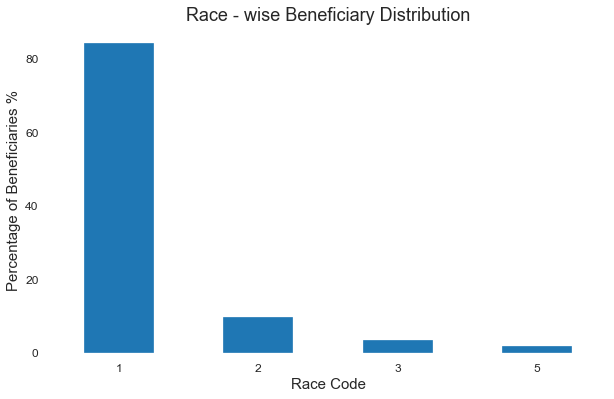

<Figure size 576x396 with 0 Axes>

In [98]:
#PLotting the frequencies of race-wise beneficiaries
count_Race = pd.value_counts(Train_Beneficiarydata['Race'], sort = True)

#Drawing a barplot
(count_Race*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))#, ('0 %','20 %', '40 %', '60 %', '80 %', '100%'))
plt.title("Race - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)

plt.show()

plt.savefig('RacewiseBeneficiaryDistribution')

#### Looks like more than 80% datset is from same race . Means maximum population in the dataset originated from same Race. From the above graph there is no Race 4

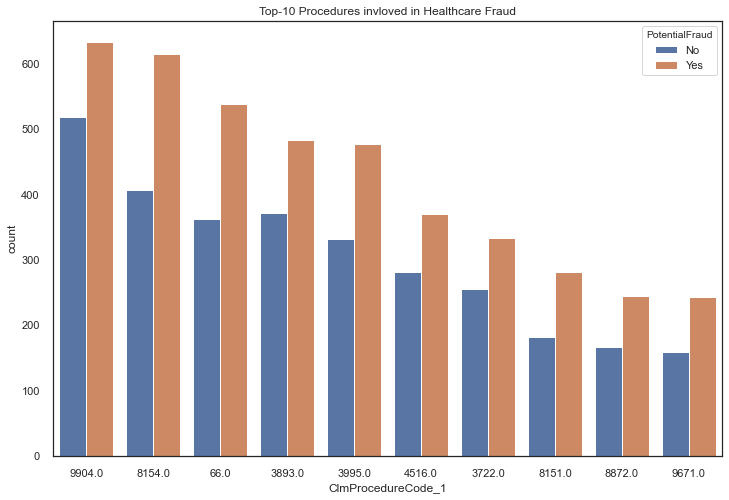

<Figure size 864x576 with 0 Axes>

In [99]:
#Countplot for each fraud and non fraud categories
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=Train_ProviderAllData
              ,order=Train_ProviderAllData.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

####  From the above plot, its easy to say that Procedure 9904,8154,66 are top procedures (in terms of money involved).Distribution of fraud and non fraud count shows suspicious transactions involved in them.

### Most common procedure codes which are applied for the fradulent and non fradulent services to see any specific pattern

In [100]:
#Inpatient

df_procedures1 =  pd.DataFrame(columns = ['Procedures'])
df_procedures1['Procedures'] = pd.concat([Train_Inpatientdata["ClmProcedureCode_1"], Train_Inpatientdata["ClmProcedureCode_2"], Train_Inpatientdata["ClmProcedureCode_3"], Train_Inpatientdata["ClmProcedureCode_4"], Train_Inpatientdata["ClmProcedureCode_5"], Train_Inpatientdata["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures1['Procedures'].head(10)
grouped_procedure_df = df_procedures1['Procedures'].value_counts()

df_diagnosis = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis['Diagnosis'] = pd.concat([Train_Inpatientdata["ClmDiagnosisCode_1"], Train_Inpatientdata["ClmDiagnosisCode_2"], Train_Inpatientdata["ClmDiagnosisCode_3"], Train_Inpatientdata["ClmDiagnosisCode_4"], Train_Inpatientdata["ClmDiagnosisCode_5"], Train_Inpatientdata["ClmDiagnosisCode_6"], Train_Inpatientdata["ClmDiagnosisCode_7"],  Train_Inpatientdata["ClmDiagnosisCode_8"], Train_Inpatientdata["ClmDiagnosisCode_9"], Train_Inpatientdata["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis['Diagnosis'].head(10)
grouped_diagnosis_df = df_diagnosis['Diagnosis'].value_counts()

grouped_procedure_df1 = grouped_procedure_df.to_frame()
grouped_procedure_df1.columns = ['count']
grouped_procedure_df1['Procedure'] = grouped_procedure_df1.index
grouped_procedure_df1['Percentage'] = (grouped_procedure_df1['count']/sum(grouped_procedure_df1['count']))*100

grouped_diagnosis_df = grouped_diagnosis_df.to_frame()
grouped_diagnosis_df.columns = ['count']
grouped_diagnosis_df['Diagnosis'] = grouped_diagnosis_df.index
grouped_diagnosis_df['Percentage'] = (grouped_diagnosis_df['count']/sum(grouped_diagnosis_df['count']))*100

# taking only top 20 

plot_procedure_df1 = grouped_procedure_df1.head(20)
plot_diagnosis_df1 = grouped_diagnosis_df.head(20)

# Plotting the most commonly used diagnosis and procedures 
from matplotlib import pyplot as plt

plot_procedure_df1['Procedure'] = 'P' + plot_procedure_df1['Procedure'].astype(str)
plot_procedure_df1.sort_values(by=['Percentage'])
plot_procedure_df1.iplot(x ='Procedure', y='Percentage', kind='bar',xTitle='Procedure', color ='green',
                  yTitle='Percentage', title='Procedure Distribution', categoryorder='total descending')

plot_diagnosis_df1['Diagnosis'] = 'D' + plot_diagnosis_df1['Diagnosis'].astype(str)
plot_diagnosis_df1.sort_values(by=['Percentage'])
plot_diagnosis_df1.iplot(x ='Diagnosis', y='Percentage', kind='bar',xTitle='Diagnosis', color ='green',
                  yTitle='Percentage', title='Diagnosis Distribution', categoryorder='total descending')

#### for inpatinet the most common procedure used is 4019, 9904, 2724 among others andfor inpatinet the most common Diagnosis used is 4019, 2724,25000 among others

In [101]:
#Outpatient
df_procedures2 =  pd.DataFrame(columns = ['Procedures'])
df_procedures2['Procedures'] = pd.concat([Train_Outpatientdata["ClmProcedureCode_1"], Train_Outpatientdata["ClmProcedureCode_2"], Train_Outpatientdata["ClmProcedureCode_3"], Train_Outpatientdata["ClmProcedureCode_4"], Train_Outpatientdata["ClmProcedureCode_5"], Train_Outpatientdata["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures2['Procedures'].head(10)
grouped_procedure_df2 = df_procedures2['Procedures'].value_counts()

df_diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis2['Diagnosis'] = pd.concat([Train_Outpatientdata["ClmDiagnosisCode_1"], Train_Outpatientdata["ClmDiagnosisCode_2"], Train_Outpatientdata["ClmDiagnosisCode_3"], Train_Outpatientdata["ClmDiagnosisCode_4"], Train_Outpatientdata["ClmDiagnosisCode_5"], Train_Outpatientdata["ClmDiagnosisCode_6"], Train_Outpatientdata["ClmDiagnosisCode_7"],  Train_Outpatientdata["ClmDiagnosisCode_8"], Train_Outpatientdata["ClmDiagnosisCode_9"], Train_Outpatientdata["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis2['Diagnosis'].head(10)
grouped_diagnosis_df2 = df_diagnosis2['Diagnosis'].value_counts()

grouped_procedure_df_op = grouped_procedure_df2.to_frame()
grouped_procedure_df_op.columns = ['count']
grouped_procedure_df_op['Procedure'] = grouped_procedure_df_op.index
grouped_procedure_df_op['Percentage'] = (grouped_procedure_df_op['count']/sum(grouped_procedure_df_op['count']))*100

grouped_diagnosis_df_op = grouped_diagnosis_df2.to_frame()
grouped_diagnosis_df_op.columns = ['count']
grouped_diagnosis_df_op['Diagnosis'] = grouped_diagnosis_df_op.index
grouped_diagnosis_df_op['Percentage'] = (grouped_diagnosis_df_op['count']/sum(grouped_diagnosis_df_op['count']))*100

# taking only top 20 

plot_procedure_df2 = grouped_procedure_df_op.head(20)
plot_diagnosis_df2 = grouped_diagnosis_df_op.head(20)

# Plotting the most commonly used diagnosis and procedures 
from matplotlib import pyplot as plt


plot_procedure_df2['Procedure'] = 'P' + plot_procedure_df2['Procedure'].astype(str)
plot_procedure_df2.sort_values(by=['Percentage'])
plot_procedure_df2.iplot(x ='Procedure', y='Percentage', kind='bar',xTitle='Procedure', color ='yellow',
                  yTitle='Percentage', title='Procedure Distribution', categoryorder='total descending')
plt.savefig('OutPatientProcedureDistribution')

plot_diagnosis_df2['Diagnosis'] = 'D' + plot_diagnosis_df2['Diagnosis'].astype(str)
plot_diagnosis_df2.sort_values(by=['Percentage'])
plot_diagnosis_df2.iplot(x ='Diagnosis', y='Percentage', kind='bar',xTitle='Diagnosis', color ='yellow',
                  yTitle='Percentage', title='Diagnosis Distribution', categoryorder='total descending')
plt.savefig('OutPatientDiagnosisDistribution')

<Figure size 864x576 with 0 Axes>

#### There is a minor difference between the most used diagnosis and procedure codes between inpatient and outpatients, for inpatinet the most common procedure used is 9904, 3722, 4516 among others & for inpatinet the most common Diagnosis used is 4019, 25000, 2724 among others

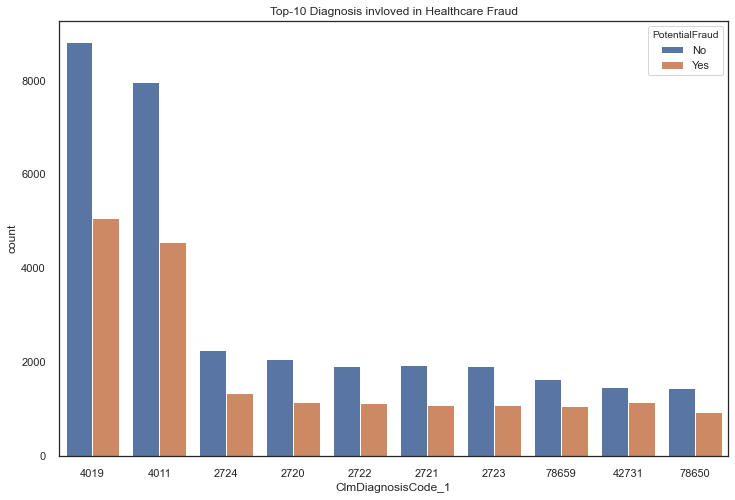

<Figure size 864x576 with 0 Axes>

In [102]:
# Countplot for Diagnosis involved in healthcare fraud
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=Train_ProviderAllData
              ,order=Train_ProviderAllData.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

plt.savefig('TopDiagnosisInnvlovedinHealthcareFraud')

#### From the above plot, its easy to say that Procedure 4019,4011,2724 are top Diagnosis (in terms of money involved).Distribution of fraud and non fraud count shows suspicious transactions involved in them.

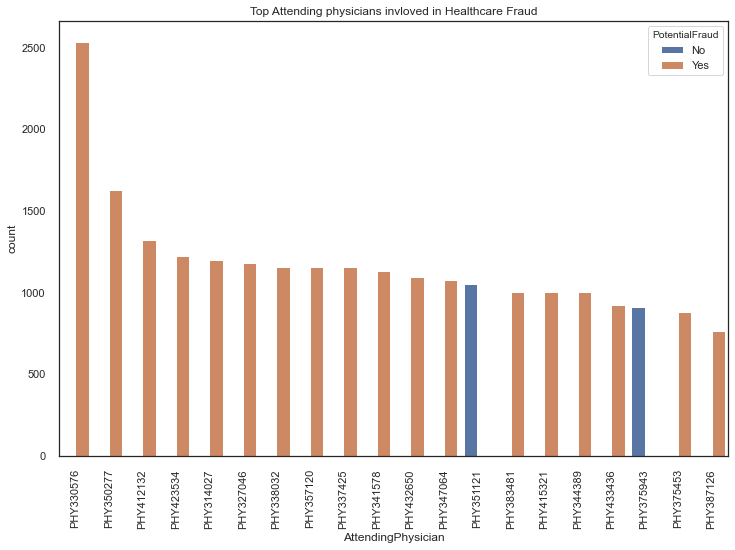

<Figure size 864x576 with 0 Axes>

In [103]:
# Top Physcian attending involvement
sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderAllData
              ,order=Train_ProviderAllData.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Top Attending physicians invloved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

#### In the above plot,we see count of involvement of attending physicians.And flags the nature of provider where they are working is whether fraud or non fraud.

In [104]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... ChronicCond_IschemicHeart ChronicCond_Osteoporasis  \
0      PHY383007  ...                         1                        0   
1      PHY402512  ...                         1                        1   
2            NaN  ...                         1                        0   
3            NaN  ...                         1                        0   
4            NaN  ...                         1                        0   

  ChronicCond_rheumatoidarthritis ChronicCond_stroke IPAnnualReimbursementAmt  \
0                               0                  0                        0   
1                               0                  1                        0   
2                               1                  0                        0   
3                               0                  0                     2020   
4                               0                  1                    36000   

  IPAnnualDeductibleAmt OPAnnualReimbursementAmt OPAnnualDeductibleAmt   Age  \
0                     0                      300                   110  80.0   
1                     0                      720                    10  67.0   
2                     0                     1380                   370  76.0   
3                  1068                     6700                  2700  74.0   
4                  1068                     3520                   140  69.0   

  WhetherDead  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 58 columns]

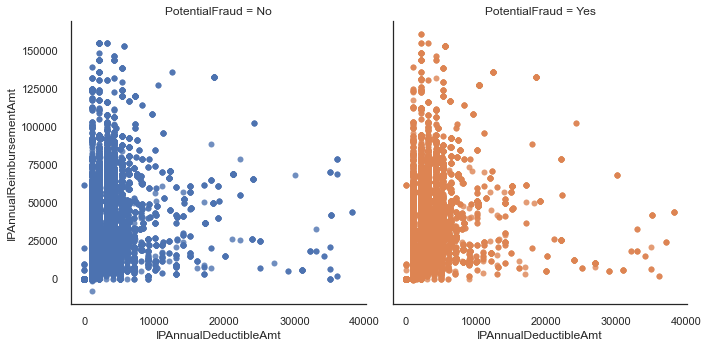

In [105]:
# IPAnnualReimbursementAmt and IPAnnualDeductibleAmt in both categories
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderAllData)

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

#### In the above graph there is no visible difference between Deductible amount and Reimbursment amount

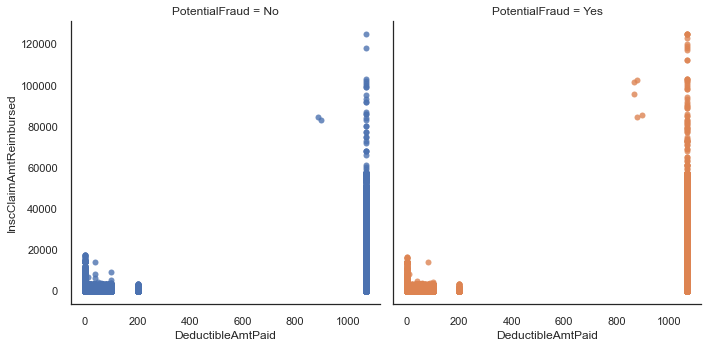

In [106]:
# DeductibleAmtpaid and InscClaimAmtReimbursed in both categories
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderAllData)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')

#### using above graph we cannot predict anything about fraud and non-fraud

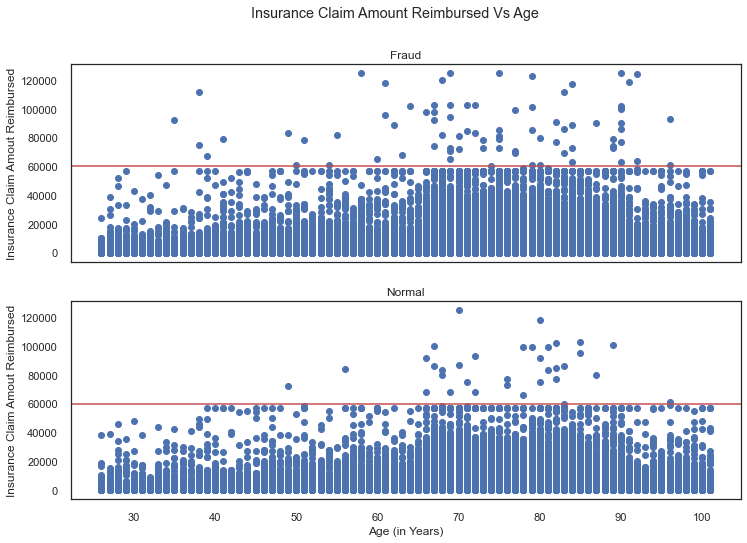

In [107]:
#Insurance Claim Amount Reimbursed Vs Age
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(Train_ProviderAllData[Train_ProviderAllData.PotentialFraud=='Yes'].Age, 
            Train_ProviderAllData[Train_ProviderAllData.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(Train_ProviderAllData[Train_ProviderAllData.PotentialFraud=='No'].Age, 
            Train_ProviderAllData[Train_ProviderAllData.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

#### In the above graph,we can see that occurance of fraud cases is more frequent in lower age groups compared to higher age groups.Age is one of the important feature for differentiating between fraud and non fraud behaviour.

#### Now let us check which were the most used procedure codes and diagnosis codes used by the potential fradulent provi

<AxesSubplot:xlabel='Diagnosis'>

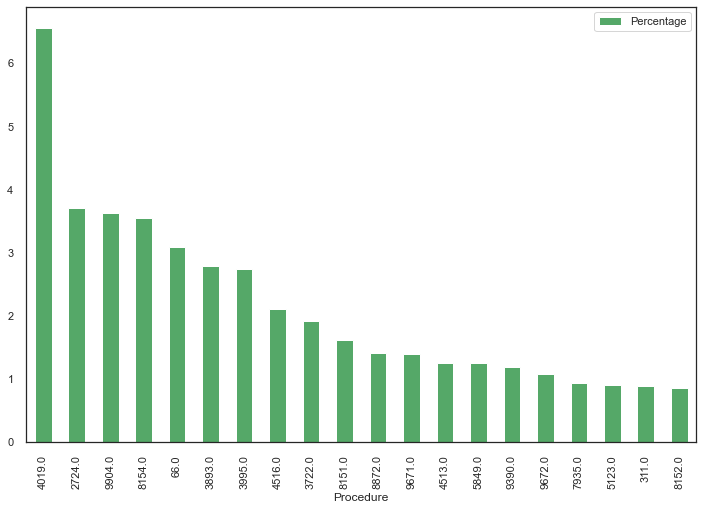

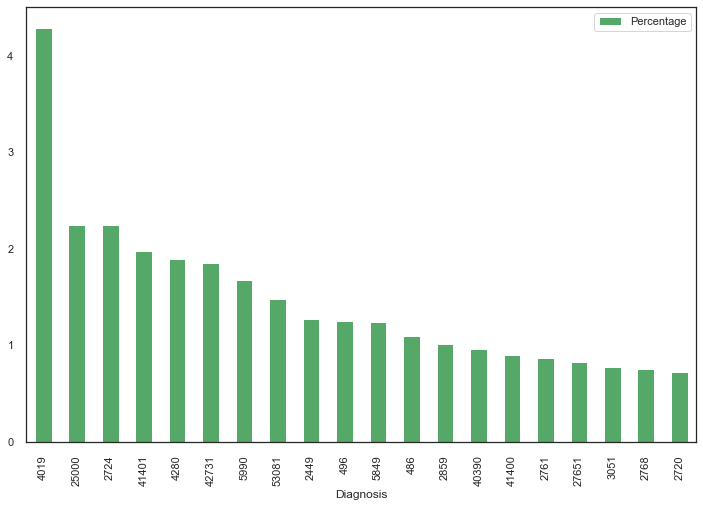

In [108]:
df_procedures2 =  pd.DataFrame(columns = ['Procedures'])
df_procedures2['Procedures'] = pd.concat([fraud_provider_ip_df["ClmProcedureCode_1"], fraud_provider_ip_df["ClmProcedureCode_2"], fraud_provider_ip_df["ClmProcedureCode_3"], fraud_provider_ip_df["ClmProcedureCode_4"], fraud_provider_ip_df["ClmProcedureCode_5"], fraud_provider_ip_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures2['Procedures'].head(10)
grouped_F_procedure_df = df_procedures2['Procedures'].value_counts()

df_diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis2['Diagnosis'] = pd.concat([fraud_provider_ip_df["ClmDiagnosisCode_1"], fraud_provider_ip_df["ClmDiagnosisCode_2"], fraud_provider_ip_df["ClmDiagnosisCode_3"], fraud_provider_ip_df["ClmDiagnosisCode_4"], fraud_provider_ip_df["ClmDiagnosisCode_5"], fraud_provider_ip_df["ClmDiagnosisCode_6"], fraud_provider_ip_df["ClmDiagnosisCode_7"],  fraud_provider_ip_df["ClmDiagnosisCode_8"], fraud_provider_ip_df["ClmDiagnosisCode_9"], fraud_provider_ip_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis2['Diagnosis'].head(10)
grouped_F_diagnosis_df = df_diagnosis2['Diagnosis'].value_counts()

grouped_F_procedure_df2 = grouped_F_procedure_df.to_frame()
grouped_F_procedure_df2.columns = ['count']
grouped_F_procedure_df2['Procedure'] = grouped_F_procedure_df2.index
grouped_F_procedure_df2['Percentage'] = (grouped_F_procedure_df2['count']/sum(grouped_F_procedure_df2['count']))*100

grouped_F_diagnosis_df2 = grouped_F_diagnosis_df.to_frame()
grouped_F_diagnosis_df2.columns = ['count']
grouped_F_diagnosis_df2['Diagnosis'] = grouped_F_diagnosis_df2.index
grouped_F_diagnosis_df2['Percentage'] = (grouped_F_diagnosis_df2['count']/sum(grouped_F_diagnosis_df2['count']))*100

plot_F_procedure_df1 = grouped_F_procedure_df2.head(20)

plot_F_diagnosis_df1 = grouped_F_diagnosis_df2.head(20)

plot_F_procedure_df1.plot(x ='Procedure', y='Percentage', kind = 'bar', color ='g')
plot_F_diagnosis_df1.plot(x ='Diagnosis', y='Percentage', kind = 'bar', color ='g')

<AxesSubplot:xlabel='Diagnosis'>

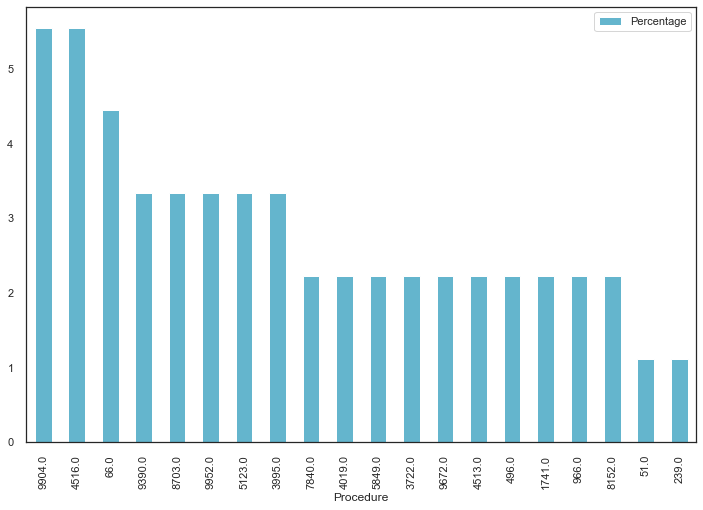

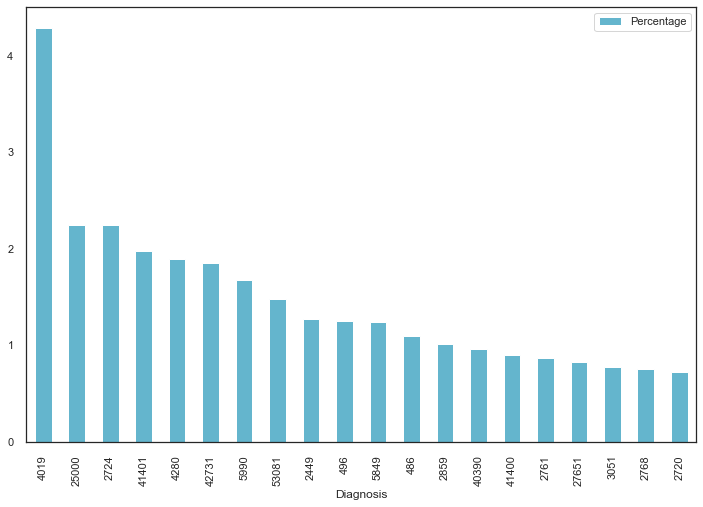

In [109]:
df_procedures_op2 =  pd.DataFrame(columns = ['Procedures'])
df_procedures_op2['Procedures'] = pd.concat([fraud_provider_op_df["ClmProcedureCode_1"], fraud_provider_op_df["ClmProcedureCode_2"], fraud_provider_op_df["ClmProcedureCode_3"], fraud_provider_op_df["ClmProcedureCode_4"], fraud_provider_op_df["ClmProcedureCode_5"], fraud_provider_op_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures_op2['Procedures'].head(10)
grouped_F_procedure_op_df = df_procedures_op2['Procedures'].value_counts()

df_diagnosis_op2 = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis_op2['Diagnosis'] = pd.concat([fraud_provider_op_df["ClmDiagnosisCode_1"], fraud_provider_op_df["ClmDiagnosisCode_2"], fraud_provider_op_df["ClmDiagnosisCode_3"], fraud_provider_op_df["ClmDiagnosisCode_4"], fraud_provider_op_df["ClmDiagnosisCode_5"], fraud_provider_op_df["ClmDiagnosisCode_6"], fraud_provider_op_df["ClmDiagnosisCode_7"],  fraud_provider_op_df["ClmDiagnosisCode_8"], fraud_provider_op_df["ClmDiagnosisCode_9"], fraud_provider_op_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis_op2['Diagnosis'].head(10)
grouped_F_diagnosis_op_df = df_diagnosis2['Diagnosis'].value_counts()

grouped_F_procedure_opdf2 = grouped_F_procedure_op_df.to_frame()
grouped_F_procedure_opdf2.columns = ['count']
grouped_F_procedure_opdf2['Procedure'] = grouped_F_procedure_opdf2.index
grouped_F_procedure_opdf2['Percentage'] = (grouped_F_procedure_opdf2['count']/sum(grouped_F_procedure_opdf2['count']))*100

grouped_F_diagnosis_opdf2 = grouped_F_diagnosis_op_df.to_frame()
grouped_F_diagnosis_opdf2.columns = ['count']
grouped_F_diagnosis_opdf2['Diagnosis'] = grouped_F_diagnosis_opdf2.index
grouped_F_diagnosis_opdf2['Percentage'] = (grouped_F_diagnosis_opdf2['count']/sum(grouped_F_diagnosis_opdf2['count']))*100

plot_F_procedure_opdf1 = grouped_F_procedure_opdf2.head(20)

plot_F_diagnosis_opdf1 = grouped_F_diagnosis_opdf2.head(20)

plot_F_procedure_opdf1.plot(x ='Procedure', y='Percentage', kind = 'bar', color ='c')
plot_F_diagnosis_opdf1.plot(x ='Diagnosis', y='Percentage', kind = 'bar', color ='c')


### States/Localities have the highest number of potential frauds

In [110]:
Train_Beneficiarydata.head()

BeneID        DOB DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 NaT       1     1                     0     39   
1  BENE11002 1936-09-01 NaT       2     1                     0     39   
2  BENE11003 1936-08-01 NaT       1     1                     0     52   
3  BENE11004 1922-07-01 NaT       1     1                     0     39   
4  BENE11005 1935-09-01 NaT       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         0   
2                          1                         0   
3                          1                         1   
4                          0                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   
2                                0                   0   
3                                1                   0   
4                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt   Age  WhetherDead  
0                     70  67.0          0.0  
1                     50  73.0          0.0  
2                     40  73.0          0.0  
3                    760  87.0          0.0  
4                   1200  74.0          0.0  

[5 rows x 27 columns]

<AxesSubplot:xlabel='STATE'>

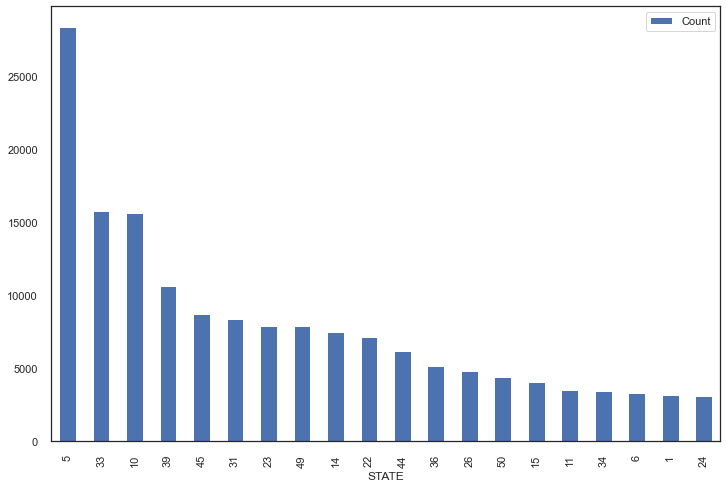

In [111]:
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiarydata, fraud_provider_ip_df, how='inner', on='BeneID')
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiarydata, fraud_provider_op_df, how='inner', on='BeneID')
Train_F_Beneficiary_grouped = fraud_beneficiary_ip_op_df['State'].value_counts()
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped.to_frame()
Train_F_Beneficiary_grouped1['Count'] =  Train_F_Beneficiary_grouped1['State']
Train_F_Beneficiary_grouped1['STATE'] = Train_F_Beneficiary_grouped1.index
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.drop(['State'], axis = 1)
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.head(20)
Train_F_Beneficiary_grouped1.plot(x ='STATE', y='Count', kind = 'bar')

#### Average Age for the data set and as a comparison for the probable fradulent activites applied on what age range

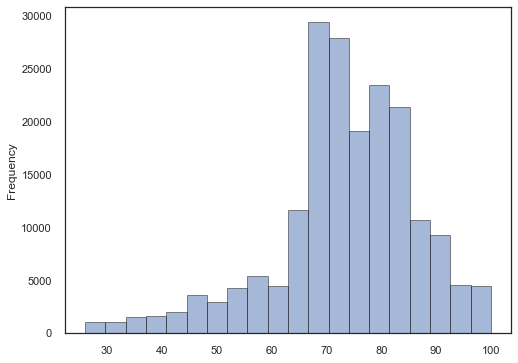

In [112]:
fraud_beneficiary_ip_op_df['DOB'] =  pd.to_datetime(fraud_beneficiary_ip_op_df['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
fraud_beneficiary_ip_op_df['DOB'] = fraud_beneficiary_ip_op_df['DOB'].where(fraud_beneficiary_ip_op_df['DOB'] < now, fraud_beneficiary_ip_op_df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
fraud_beneficiary_ip_op_df['age'] = (now - fraud_beneficiary_ip_op_df['DOB']).astype('<m8[Y]')    # 3
ax = fraud_beneficiary_ip_op_df['age'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='k')

#### In the above plot we can see maximum patients are from age > 65

#### Average cost of potential fraud claims and also what is the cost as a % of whole a. Checking the outliers for such claims

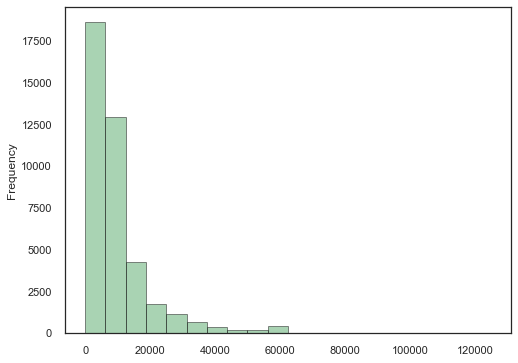

In [113]:
ax = Train_Inpatientdata['InscClaimAmtReimbursed'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), facecolor='g', edgecolor='k')

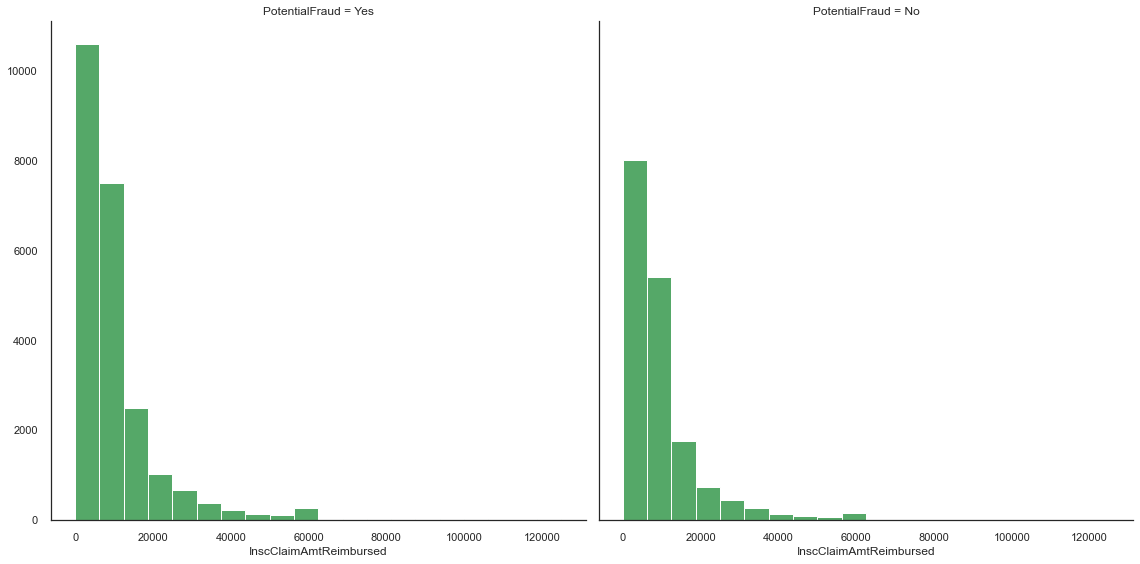

In [114]:
Train_Inpatient_1 = pd.merge(Train_Inpatientdata, Train, how='inner', on='Provider')
g = sns.FacetGrid(Train_Inpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, color = 'g')

####  It is a significantly large amount which might be fradulent.

In [115]:
Train_Inpatient_1 = Train_Inpatient_1.loc[(Train_Inpatient_1['PotentialFraud'] == 'Yes')]
Total = Train_Inpatient_1['InscClaimAmtReimbursed'].sum()
print(Total)

241288510


#### 241288510 - around 240 Million dollars worth of claim might have some fradulent activity. Even if we assume that it has just 10% fradulent activity the amount will be quite huge

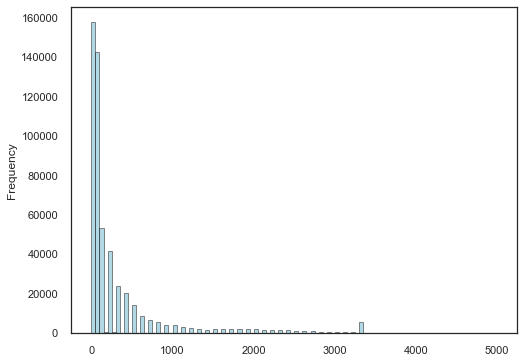

In [116]:
#Outpatient
ax = Train_Outpatientdata['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0, 5000], alpha=0.5, figsize=(8, 6), facecolor='c', edgecolor='k')

#Outpatient Claim have smaller amount

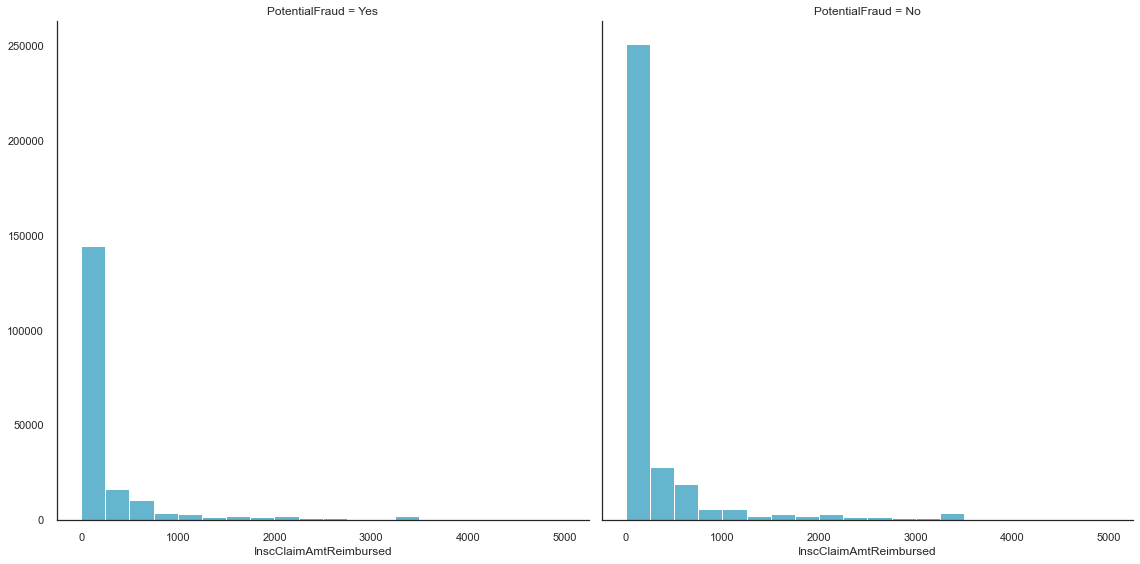

In [117]:
Train_Outpatient_1 = pd.merge(Train_Outpatientdata, Train, how='inner', on='Provider')
g = sns.FacetGrid(Train_Outpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, range=[0, 5000], color ='c')

In [118]:
#sns.pairplot(Test_Beneficiarydata, hue = 'BeneID')

In [119]:
#Last record of Test All data
Test_ProviderAllData.iloc[[135391]]

Provider      BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
135391  PRV57750  BENE150236  CLM675578   2009-11-10  2009-11-10   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
135391                     200          PHY323525          PHY323525   

       OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
135391      PHY323525               4788  ...                         1   

       ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis  \
135391                        0                               0   

       ChronicCond_stroke IPAnnualReimbursementAmt IPAnnualDeductibleAmt  \
135391                  0                        0                     0   

       OPAnnualReimbursementAmt OPAnnualDeductibleAmt   Age  WhetherDead  
135391                      290                  1120  67.0          0.0  

[1 rows x 57 columns]

In [120]:
#Last record of Train all Data
Train_ProviderAllData.iloc[[558210]]

Provider PotentialFraud      BeneID    ClaimID ClaimStartDt  \
558210  PRV57763             No  BENE158531  CLM701529   2009-11-26   

        ClaimEndDt  InscClaimAmtReimbursed AttendingPhysician  \
558210  2009-11-26                      40          PHY321072   

       OperatingPhysician OtherPhysician  ... ChronicCond_IschemicHeart  \
558210                NaN      PHY321072  ...                         1   

       ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis  \
558210                        0                               0   

       ChronicCond_stroke IPAnnualReimbursementAmt IPAnnualDeductibleAmt  \
558210                  0                        0                     0   

       OPAnnualReimbursementAmt OPAnnualDeductibleAmt   Age WhetherDead  
558210                     3700                   240  58.0         0.0  

[1 rows x 58 columns]

### Lets try to append test data and train data so that we can get good scores of test data as we know we dont have each feature in test data 

In [121]:
# Creating copy of test All data
Test_ProviderAllData_copy = Test_ProviderAllData

In [122]:
#Check status of copy data
Test_ProviderAllData_copy.shape

(135392, 57)

In [123]:
col_merge = Test_ProviderAllData.columns

In [124]:
# Adding both test and Train all data in Test all data
Test_ProviderAllData = pd.concat([Test_ProviderAllData, Train_ProviderAllData[col_merge]])

In [125]:
Train_ProviderAllData.shape

(558211, 58)

In [126]:
Test_ProviderAllData_copy.shape

(135392, 57)

In [127]:

# Verify after merge
print("Shape of Test After Concatenation",Test_ProviderAllData.shape)

print("Expected rows after addition",135392+558211)

Shape of Test After Concatenation (693603, 57)
Expected rows after addition 693603


In [128]:
Test_ProviderAllData.iloc[[135392]]

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001  BENE11727  CLM733300   2009-12-17  2009-12-17   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0      PHY383007               5953  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        0                               0                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                        0                     0                      300   

  OPAnnualDeductibleAmt   Age  WhetherDead  
0                   110  80.0          0.0  

[1 rows x 57 columns]

In [129]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... ChronicCond_IschemicHeart ChronicCond_Osteoporasis  \
0      PHY383007  ...                         1                        0   
1      PHY402512  ...                         1                        1   
2            NaN  ...                         1                        0   
3            NaN  ...                         1                        0   
4            NaN  ...                         1                        0   

  ChronicCond_rheumatoidarthritis ChronicCond_stroke IPAnnualReimbursementAmt  \
0                               0                  0                        0   
1                               0                  1                        0   
2                               1                  0                        0   
3                               0                  0                     2020   
4                               0                  1                    36000   

  IPAnnualDeductibleAmt OPAnnualReimbursementAmt OPAnnualDeductibleAmt   Age  \
0                     0                      300                   110  80.0   
1                     0                      720                    10  67.0   
2                     0                     1380                   370  76.0   
3                  1068                     6700                  2700  74.0   
4                  1068                     3520                   140  69.0   

  WhetherDead  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 58 columns]

###### ** Verified successfully in concatenation Train data appended successfully after test data
Other than basic explorations and visualizations,Let us try some certain methods to identify clues of fraud and abuse. One such simple method is 'Grouping based on Similarity'. In this method, we basically group all the records by the ProcedureCodes, DiagnosisCodes,Provider.

In [130]:
Train_ProviderAllData_copy = Train_ProviderAllData

In [131]:
Train_ProviderAllData_copy.shape

(558211, 58)

In [132]:
# Avg feature based on group by and avg feature group by provider
Train_ProviderAllData["PerProviderAvg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerProviderAvg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerProviderAvg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerProviderAvg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerProviderAvg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerProviderAvg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerProviderAvg_Age"]=Train_ProviderAllData.groupby('Provider')['Age'].transform('mean')
Train_ProviderAllData["PerProviderAvg_NoOfMonths_PartACov"]=Train_ProviderAllData.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Train_ProviderAllData["PerProviderAvg_NoOfMonths_PartBCov"]=Train_ProviderAllData.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Train_ProviderAllData["PerProviderAvg_AdmitForDays"]=Train_ProviderAllData.groupby('Provider')['AdmitForDays'].transform('mean')

In [133]:
Test_ProviderAllData["PerProviderAvg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerProviderAvg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerProviderAvg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerProviderAvg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerProviderAvg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerProviderAvg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerProviderAvg_Age"]=Test_ProviderAllData.groupby('Provider')['Age'].transform('mean')
Test_ProviderAllData["PerProviderAvg_NoOfMonths_PartACov"]=Test_ProviderAllData.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Test_ProviderAllData["PerProviderAvg_NoOfMonths_PartBCov"]=Test_ProviderAllData.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Test_ProviderAllData["PerProviderAvg_AdmitForDays"]=Test_ProviderAllData.groupby('Provider')['AdmitForDays'].transform('mean')

In [134]:
Train_ProviderAllData.shape

(558211, 68)

In [135]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerProviderAvg_InscClaimAmtReimbursed  \
0      PHY383007  ...                                4185.6   
1      PHY402512  ...                                4185.6   
2            NaN  ...                                4185.6   
3            NaN  ...                                4185.6   
4            NaN  ...                                4185.6   

  PerProviderAvg_DeductibleAmtPaid PerProviderAvg_IPAnnualReimbursementAmt  \
0                            213.6                                 17606.0   
1                            213.6                                 17606.0   
2                            213.6                                 17606.0   
3                            213.6                                 17606.0   
4                            213.6                                 17606.0   

  PerProviderAvg_IPAnnualDeductibleAmt  \
0                               897.12   
1                               897.12   
2                               897.12   
3                               897.12   
4                               897.12   

  PerProviderAvg_OPAnnualReimbursementAmt  \
0                                  2615.2   
1                                  2615.2   
2                                  2615.2   
3                                  2615.2   
4                                  2615.2   

  PerProviderAvg_OPAnnualDeductibleAmt PerProviderAvg_Age  \
0                               463.92              78.84   
1                               463.92              78.84   
2                               463.92              78.84   
3                               463.92              78.84   
4                               463.92              78.84   

  PerProviderAvg_NoOfMonths_PartACov PerProviderAvg_NoOfMonths_PartBCov  \
0                               12.0                               12.0   
1                               12.0                               12.0   
2                               12.0                               12.0   
3                               12.0                               12.0   
4                               12.0                               12.0   

  PerProviderAvg_AdmitForDays  
0                         6.0  
1                         6.0  
2                         6.0  
3                         6.0  
4                         6.0  

[5 rows x 68 columns]

In [136]:
Test_ProviderAllData.shape

(693603, 67)

In [137]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerProviderAvg_InscClaimAmtReimbursed PerProviderAvg_DeductibleAmtPaid  \
0                            262.390244                         1.853659   
1                            262.390244                         1.853659   
2                            262.390244                         1.853659   
3                            262.390244                         1.853659   
4                            262.390244                         1.853659   

  PerProviderAvg_IPAnnualReimbursementAmt  \
0                             5180.926829   
1                             5180.926829   
2                             5180.926829   
3                             5180.926829   
4                             5180.926829   

  PerProviderAvg_IPAnnualDeductibleAmt  \
0                           548.253659   
1                           548.253659   
2                           548.253659   
3                           548.253659   
4                           548.253659   

  PerProviderAvg_OPAnnualReimbursementAmt  \
0                             2345.073171   
1                             2345.073171   
2                             2345.073171   
3                             2345.073171   
4                             2345.073171   

  PerProviderAvg_OPAnnualDeductibleAmt PerProviderAvg_Age  \
0                            677.95122          72.365854   
1                            677.95122          72.365854   
2                            677.95122          72.365854   
3                            677.95122          72.365854   
4                            677.95122          72.365854   

  PerProviderAvg_NoOfMonths_PartACov PerProviderAvg_NoOfMonths_PartBCov  \
0                           11.82439                               12.0   
1                           11.82439                               12.0   
2                           11.82439                               12.0   
3                           11.82439                               12.0   
4                           11.82439                               12.0   

   PerProviderAvg_AdmitForDays  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 67 columns]

In [138]:
# Grouped by Beneficiary
Train_ProviderAllData["PerBeneIDAvg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerBeneIDAvg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerBeneIDAvg_AdmitForDays"]=Train_ProviderAllData.groupby('BeneID')['AdmitForDays'].transform('mean')




In [139]:
#Grouped by beneficiary id
Test_ProviderAllData["PerBeneIDAvg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerBeneIDAvg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerBeneIDAvg_AdmitForDays"]=Test_ProviderAllData.groupby('BeneID')['AdmitForDays'].transform('mean')

In [140]:
Test_ProviderAllData.shape

(693603, 74)

In [141]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... PerProviderAvg_NoOfMonths_PartACov  \
0      PHY413853                514  ...                           11.82439   
1            NaN               7840  ...                           11.82439   
2            NaN              V4581  ...                           11.82439   
3            NaN              42789  ...                           11.82439   
4      PHY330212               1532  ...                           11.82439   

  PerProviderAvg_NoOfMonths_PartBCov PerProviderAvg_AdmitForDays  \
0                               12.0                         NaN   
1                               12.0                         NaN   
2                               12.0                         NaN   
3                               12.0                         NaN   
4                               12.0                         NaN   

  PerBeneIDAvg_InscClaimAmtReimbursed PerBeneIDAvg_DeductibleAmtPaid  \
0                          145.555556                       0.000000   
1                         1644.285714                     231.000000   
2                         1644.285714                     231.000000   
3                         1644.285714                     231.000000   
4                          732.307692                     164.307692   

  PerBeneIDAvg_IPAnnualReimbursementAmt PerBeneIDAvg_IPAnnualDeductibleAmt  \
0                                     0                                  0   
1                                 22000                               3204   
2                                 22000                               3204   
3                                 22000                               3204   
4                                  8000                              13136   

  PerBeneIDAvg_OPAnnualReimbursementAmt PerBeneIDAvg_OPAnnualDeductibleAmt  \
0                                  1310                                590   
1                                  1020                                910   
2                                  1020                                910   
3                                  1020                                910   
4                                  1520                                730   

   PerBeneIDAvg_AdmitForDays  
0                        NaN  
1                   3.666667  
2                   3.666667  
3                   3.666667  
4                   4.000000  

[5 rows x 74 columns]

In [142]:
Train_ProviderAllData.shape

(558211, 75)

In [143]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerProviderAvg_NoOfMonths_PartACov  \
0      PHY383007  ...                               12.0   
1      PHY402512  ...                               12.0   
2            NaN  ...                               12.0   
3            NaN  ...                               12.0   
4            NaN  ...                               12.0   

  PerProviderAvg_NoOfMonths_PartBCov PerProviderAvg_AdmitForDays  \
0                               12.0                         6.0   
1                               12.0                         6.0   
2                               12.0                         6.0   
3                               12.0                         6.0   
4                               12.0                         6.0   

  PerBeneIDAvg_InscClaimAmtReimbursed PerBeneIDAvg_DeductibleAmtPaid  \
0                           60.000000                       0.000000   
1                          360.000000                       0.000000   
2                          410.000000                      33.333333   
3                          408.571429                      55.619048   
4                        12146.666667                     356.000000   

  PerBeneIDAvg_IPAnnualReimbursementAmt PerBeneIDAvg_IPAnnualDeductibleAmt  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                  2020                               1068   
4                                 36000                               1068   

  PerBeneIDAvg_OPAnnualReimbursementAmt PerBeneIDAvg_OPAnnualDeductibleAmt  \
0                                   300                                110   
1                                   720                                 10   
2                                  1380                                370   
3                                  6700                               2700   
4                                  3520                                140   

  PerBeneIDAvg_AdmitForDays  
0                       NaN  
1                       NaN  
2                       NaN  
3                       2.0  
4                       5.0  

[5 rows x 75 columns]

In [144]:
# grouped by Otherphyscian
Train_ProviderAllData["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerOtherPhysicianAvg_AdmitForDays"]=Train_ProviderAllData.groupby('OtherPhysician')['AdmitForDays'].transform('mean')


In [145]:
Test_ProviderAllData["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerOtherPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerOtherPhysicianAvg_AdmitForDays"]=Test_ProviderAllData.groupby('OtherPhysician')['AdmitForDays'].transform('mean')

In [146]:
Test_ProviderAllData.shape

(693603, 81)

In [147]:
Train_ProviderAllData.shape

(558211, 82)

In [148]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerBeneIDAvg_OPAnnualReimbursementAmt PerBeneIDAvg_OPAnnualDeductibleAmt  \
0                                  1310                                590   
1                                  1020                                910   
2                                  1020                                910   
3                                  1020                                910   
4                                  1520                                730   

  PerBeneIDAvg_AdmitForDays PerOtherPhysicianAvg_InscClaimAmtReimbursed  \
0                       NaN                                       100.0   
1                  3.666667                                         NaN   
2                  3.666667                                         NaN   
3                  3.666667                                         NaN   
4                  4.000000                                       240.0   

  PerOtherPhysicianAvg_DeductibleAmtPaid  \
0                                    0.0   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    0.0   

  PerOtherPhysicianAvg_IPAnnualReimbursementAmt  \
0                                           0.0   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                       12725.0   

  PerOtherPhysicianAvg_IPAnnualDeductibleAmt  \
0                                        0.0   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                     7636.0   

  PerOtherPhysicianAvg_OPAnnualReimbursementAmt  \
0                                        1310.0   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                        1160.0   

  PerOtherPhysicianAvg_OPAnnualDeductibleAmt  \
0                                      590.0   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                      485.0   

   PerOtherPhysicianAvg_AdmitForDays  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4                                NaN  

[5 rows x 81 columns]

In [149]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerBeneIDAvg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                   300   
1      PHY402512  ...                                   720   
2            NaN  ...                                  1380   
3            NaN  ...                                  6700   
4            NaN  ...                                  3520   

  PerBeneIDAvg_OPAnnualDeductibleAmt PerBeneIDAvg_AdmitForDays  \
0                                110                       NaN   
1                                 10                       NaN   
2                                370                       NaN   
3                               2700                       2.0   
4                                140                       5.0   

  PerOtherPhysicianAvg_InscClaimAmtReimbursed  \
0                                        20.0   
1                                       550.0   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  PerOtherPhysicianAvg_DeductibleAmtPaid  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  PerOtherPhysicianAvg_IPAnnualReimbursementAmt  \
0                                           0.0   
1                                        8160.0   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  PerOtherPhysicianAvg_IPAnnualDeductibleAmt  \
0                                        0.0   
1                                     1068.0   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerOtherPhysicianAvg_OPAnnualReimbursementAmt  \
0                                         300.0   
1                                        7090.0   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  PerOtherPhysicianAvg_OPAnnualDeductibleAmt PerOtherPhysicianAvg_AdmitForDays  
0                                      110.0                               NaN  
1                                      854.0                               NaN  
2                                        NaN                               NaN  
3                                        NaN                               NaN  
4                                        NaN                               NaN  

[5 rows x 82 columns]

In [150]:
# Group by Oerating Physcian
Train_ProviderAllData["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerOperatingPhysicianAvg_AdmitForDays"]=Train_ProviderAllData.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

In [151]:
Test_ProviderAllData["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerOperatingPhysicianAvg_AdmitForDays"]=Test_ProviderAllData.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

In [152]:
Train_ProviderAllData.shape

(558211, 89)

In [153]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerOtherPhysicianAvg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                         300.0   
1      PHY402512  ...                                        7090.0   
2            NaN  ...                                           NaN   
3            NaN  ...                                           NaN   
4            NaN  ...                                           NaN   

  PerOtherPhysicianAvg_OPAnnualDeductibleAmt  \
0                                      110.0   
1                                      854.0   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerOtherPhysicianAvg_AdmitForDays  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

  PerOperatingPhysicianAvg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                           500.0   
4                                             NaN   

  PerOperatingPhysicianAvg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        0.0   
4                                        NaN   

  PerOperatingPhysicianAvg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                            2020.0   
4                                               NaN   

  PerOperatingPhysicianAvg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                         1068.0   
4                                            NaN   

  PerOperatingPhysicianAvg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                            6700.0   
4                                               NaN   

  PerOperatingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                         2700.0   
4                                            NaN   

  PerOperatingPhysicianAvg_AdmitForDays  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  

[5 rows x 89 columns]

In [154]:
Test_ProviderAllData.shape

(693603, 88)

In [155]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerOtherPhysicianAvg_OPAnnualReimbursementAmt  \
0                                        1310.0   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                        1160.0   

  PerOtherPhysicianAvg_OPAnnualDeductibleAmt  \
0                                      590.0   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                      485.0   

  PerOtherPhysicianAvg_AdmitForDays  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

  PerOperatingPhysicianAvg_InscClaimAmtReimbursed  \
0                                           100.0   
1                                            40.0   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerOperatingPhysicianAvg_DeductibleAmtPaid  \
0                                        0.0   
1                                        0.0   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerOperatingPhysicianAvg_IPAnnualReimbursementAmt  \
0                                               0.0   
1                                           22000.0   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerOperatingPhysicianAvg_IPAnnualDeductibleAmt  \
0                                            0.0   
1                                         3204.0   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerOperatingPhysicianAvg_OPAnnualReimbursementAmt  \
0                                            1310.0   
1                                            1020.0   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerOperatingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                          590.0   
1                                          910.0   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PerOperatingPhysicianAvg_AdmitForDays  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                   

In [156]:
#grouped by AttendingPhysician   

Train_ProviderAllData["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerAttendingPhysicianAvg_AdmitForDays"]=Train_ProviderAllData.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

In [157]:
Test_ProviderAllData["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerAttendingPhysicianAvg_AdmitForDays"]=Test_ProviderAllData.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

In [158]:
Train_ProviderAllData.shape

(558211, 96)

In [159]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerOperatingPhysicianAvg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                               NaN   
1      PHY402512  ...                                               NaN   
2            NaN  ...                                               NaN   
3            NaN  ...                                            6700.0   
4            NaN  ...                                               NaN   

  PerOperatingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                         2700.0   
4                                            NaN   

  PerOperatingPhysicianAvg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerAttendingPhysicianAvg_InscClaimAmtReimbursed  \
0                                            20.0   
1                                           300.0   
2                                           647.5   
3                                           500.0   
4                                         36000.0   

  PerAttendingPhysicianAvg_DeductibleAmtPaid  \
0                                   0.000000   
1                                  26.666667   
2                                   0.000000   
3                                   0.000000   
4                                1068.000000   

  PerAttendingPhysicianAvg_IPAnnualReimbursementAmt  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                            2020.0   
4                                           36000.0   

  PerAttendingPhysicianAvg_IPAnnualDeductibleAmt  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                         1068.0   
4                                         1068.0   

  PerAttendingPhysicianAvg_OPAnnualReimbursementAmt  \
0                                        300.000000   
1                                       1703.333333   
2                                       1932.500000   
3                                       6700.000000   
4                                       3520.000000   

  PerAttendingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                     110.000000   
1                                     286.666667   
2                                     220.000000   
3                                    2700.000000   
4                                     140.000000   

  PerAttendingPhysicianAvg_AdmitForDays  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4       

In [160]:
Test_ProviderAllData.shape

(693603, 95)

In [161]:

Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerOperatingPhysicianAvg_OPAnnualReimbursementAmt  \
0                                            1310.0   
1                                            1020.0   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerOperatingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                          590.0   
1                                          910.0   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerOperatingPhysicianAvg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerAttendingPhysicianAvg_InscClaimAmtReimbursed  \
0                                           305.0   
1                                            55.0   
2                                           280.0   
3                                           100.0   
4                                           400.0   

  PerAttendingPhysicianAvg_DeductibleAmtPaid  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

  PerAttendingPhysicianAvg_IPAnnualReimbursementAmt  \
0                                          0.000000   
1                                      11000.000000   
2                                       3006.666667   
3                                      22000.000000   
4                                       8000.000000   

  PerAttendingPhysicianAvg_IPAnnualDeductibleAmt  \
0                                       0.000000   
1                                    1602.000000   
2                                     474.666667   
3                                    3204.000000   
4                                   13136.000000   

  PerAttendingPhysicianAvg_OPAnnualReimbursementAmt  \
0                                       1687.500000   
1                                        895.000000   
2                                       2496.666667   
3                                       1020.000000   
4                                       1520.000000   

  PerAttendingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                     390.000000   
1                                     480.000000   
2                                     767.777778   
3                                     910.000000   
4                                     730.000000   

   PerAttendingPhysicianAvg_AdmitForDays  
0                                    NaN  
1                                    NaN  
2                                 

In [162]:
#grouped by DiagnosisGroupCode  

Train_ProviderAllData["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Train_ProviderAllData.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

In [163]:
Test_ProviderAllData["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Test_ProviderAllData.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

In [164]:
Train_ProviderAllData.shape

(558211, 103)

In [165]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerAttendingPhysicianAvg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                        300.000000   
1      PHY402512  ...                                       1703.333333   
2            NaN  ...                                       1932.500000   
3            NaN  ...                                       6700.000000   
4            NaN  ...                                       3520.000000   

  PerAttendingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                     110.000000   
1                                     286.666667   
2                                     220.000000   
3                                    2700.000000   
4                                     140.000000   

  PerAttendingPhysicianAvg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   5.0   

  PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                     7710.391061   

  PerDiagnosisGroupCodeAvg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                     1068.0   

  PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                      15502.513966   

  PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                    2187.944134   

  PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                       1193.072626   

  PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                     409.608939   

  PerDiagnosisGroupCodeAvg_AdmitForDays  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4       

In [166]:
Test_ProviderAllData.shape

(693603, 102)

In [167]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerAttendingPhysicianAvg_OPAnnualReimbursementAmt  \
0                                       1687.500000   
1                                        895.000000   
2                                       2496.666667   
3                                       1020.000000   
4                                       1520.000000   

  PerAttendingPhysicianAvg_OPAnnualDeductibleAmt  \
0                                     390.000000   
1                                     480.000000   
2                                     767.777778   
3                                     910.000000   
4                                     730.000000   

  PerAttendingPhysicianAvg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerDiagnosisGroupCodeAvg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PerDiagnosisGroupCodeAvg_AdmitForDays  
0                                    NaN  
1                                    NaN  
2                                 

In [168]:
# grouped by ClmAdmitDiagnosisCode 

Train_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

In [169]:
Test_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

In [170]:
Train_ProviderAllData.shape

(558211, 110)

In [171]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                               NaN   
1      PHY402512  ...                                               NaN   
2            NaN  ...                                               NaN   
3            NaN  ...                                               NaN   
4            NaN  ...                                       1193.072626   

  PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                     409.608939   

  PerDiagnosisGroupCodeAvg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                             10.692737   

  PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed  \
0                                                NaN   
1                                                NaN   
2                                        1450.994624   
3                                        2696.200000   
4                                        5028.571429   

  PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid  \
0                                           NaN   
1                                           NaN   
2                                    184.951613   
3                                    239.959184   
4                                    406.857143   

  PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt  \
0                                                NaN     
1                                                NaN     
2                                        5805.779570     
3                                        7368.800000     
4                                        8987.619048     

  PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt  \
0                                               NaN   
1                                               NaN   
2                                        682.924731   
3                                        895.760000   
4                                       1160.000000   

  PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt  \
0                                                NaN     
1                                                NaN     
2                                        1682.983871     
3                                        2706.200000     
4                                        1873.809524     

  PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt  \
0                                               NaN   
1                                               NaN   
2                                        524.166667   
3                                        567.400000   
4                                        618.571429   

  PerClmAdmitDiagnosisCodeAvg_AdmitForDays  
0                                      NaN  
1                   

In [172]:
Test_ProviderAllData.shape

(693603, 109)

In [173]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerDiagnosisGroupCodeAvg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed  \
0                                        5694.723011   
1                                        7042.946979   
2                                        8443.163265   
3                                                NaN   
4                                        1758.732782   

  PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid  \
0                                    796.941856   
1                                    798.657431   
2                                    428.883346   
3                                           NaN   
4                                     96.049587   

  PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt  \
0                                       12233.323864     
1                                       13890.308261     
2                                       13498.338192     
3                                                NaN     
4                                        6797.493113     

  PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt  \
0                                       1496.126420   
1                                       1583.691739   
2                                        977.501458   
3                                               NaN   
4                                        708.297521   

  PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt  \
0                                        1906.580256     
1                                        2335.376079     
2                                        2157.346939     
3                                                NaN     
4                                        2958.402204     

  PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt  \
0                                        532.714489   
1                                        632.032059   
2                                        662.244898   
3                                               NaN   
4                                        959.008264   

   PerClmAdmitDiagnosisCodeAvg_AdmitForDays  
0        

In [174]:
#grouped by ClmProcedureCode_1 

Train_ProviderAllData["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_1Avg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


In [175]:
Test_ProviderAllData["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_1Avg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

In [176]:
Train_ProviderAllData.shape

(558211, 117)

In [177]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                                NaN     
1      PHY402512  ...                                                NaN     
2            NaN  ...                                        1682.983871     
3            NaN  ...                                        2706.200000     
4            NaN  ...                                        1873.809524     

  PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt  \
0                                               NaN   
1                                               NaN   
2                                        524.166667   
3                                        567.400000   
4                                        618.571429   

  PerClmAdmitDiagnosisCodeAvg_AdmitForDays  \
0                                      NaN   
1                                      NaN   
2                                     5.75   
3                                     5.75   
4                                    12.50   

  PerClmProcedureCode_1Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmProcedureCode_1Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_1Avg_AdmitForDays  
0                                   NaN  
1                                   NaN  
2                                   Na

In [178]:
Test_ProviderAllData.shape

(693603, 116)

In [179]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt  \
0                                        1906.580256     
1                                        2335.376079     
2                                        2157.346939     
3                                                NaN     
4                                        2958.402204     

  PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt  \
0                                        532.714489   
1                                        632.032059   
2                                        662.244898   
3                                               NaN   
4                                        959.008264   

  PerClmAdmitDiagnosisCodeAvg_AdmitForDays  \
0                                 4.777830   
1                                 7.072131   
2                                 6.230631   
3                                      NaN   
4                                 9.093750   

  PerClmProcedureCode_1Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmProcedureCode_1Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PerClmProcedureCode_1Avg_AdmitForDays  
0                                    NaN  
1                      

In [180]:
#grouped by ClmProcedureCode_2

Train_ProviderAllData["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_2Avg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

In [181]:
Test_ProviderAllData["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_2Avg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

In [182]:
Train_ProviderAllData.shape

(558211, 124)

In [183]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                               NaN   
1      PHY402512  ...                                               NaN   
2            NaN  ...                                               NaN   
3            NaN  ...                                               NaN   
4            NaN  ...                                               NaN   

  PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_1Avg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmProcedureCode_2Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmProcedureCode_2Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_2Avg_AdmitForDays  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4       

In [184]:
Test_ProviderAllData.shape

(693603, 123)

In [185]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_1Avg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmProcedureCode_2Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmProcedureCode_2Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PerClmProcedureCode_2Avg_AdmitForDays  
0                                    NaN  
1                                    NaN  
2                                 

In [186]:
#grouped by ClmProcedureCode_3

Train_ProviderAllData["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmProcedureCode_3Avg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

In [187]:
Test_ProviderAllData["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmProcedureCode_3Avg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

In [188]:
Train_ProviderAllData.shape

(558211, 131)

In [189]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                               NaN   
1      PHY402512  ...                                               NaN   
2            NaN  ...                                               NaN   
3            NaN  ...                                               NaN   
4            NaN  ...                                               NaN   

  PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_2Avg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmProcedureCode_3Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmProcedureCode_3Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_3Avg_AdmitForDays  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4       

In [190]:
Test_ProviderAllData.shape

(693603, 130)

In [191]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_2Avg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmProcedureCode_3Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmProcedureCode_3Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PerClmProcedureCode_3Avg_AdmitForDays  
0                                    NaN  
1                                    NaN  
2                                 

In [192]:
#grouped by ClmDiagnosisCode_1 

Train_ProviderAllData["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

In [193]:
Test_ProviderAllData["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

In [194]:
Test_ProviderAllData.shape

(693603, 137)

In [195]:
Train_ProviderAllData.shape

(558211, 138)

In [196]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_3Avg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed  \
0                                      364.715909   
1                                     1315.564516   
2                                      555.000000   
3                                      870.593103   
4                                     2863.173077   

  PerClmDiagnosisCode_1Avg_DeductibleAmtPaid  \
0                                  21.159091   
1                                 206.709677   
2                                   2.034700   
3                                 110.390221   
4                                 115.846154   

  PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt  \
0                                       4683.892045   
1                                       5496.693548   
2                                       4113.438486   
3                                       5147.678161   
4                                       7401.346154   

  PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt  \
0                                     530.738636   
1                                     755.741935   
2                                     480.031546   
3                                     627.058391   
4                                     874.461538   

  PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt  \
0                                       1823.494318   
1                                       2339.193548   
2                                       2343.706625   
3                                       1644.726437   
4                                       2521.250000   

  PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt  \
0                                     541.079545   
1                                     652.500000   
2                                     699.810726   
3                                     482.735632   
4                                     696.730769   

   PerClmDiagnosisCode_1Avg_AdmitForDays  
0                               5.833333  
1                               4.583333  
2                                 

In [197]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                               NaN   
1      PHY402512  ...                                               NaN   
2            NaN  ...                                               NaN   
3            NaN  ...                                               NaN   
4            NaN  ...                                               NaN   

  PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmProcedureCode_3Avg_AdmitForDays  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed  \
0                                      114.301994   
1                                      826.380034   
2                                      121.744186   
3                                      301.375000   
4                                     2949.379845   

  PerClmDiagnosisCode_1Avg_DeductibleAmtPaid  \
0                                   2.905983   
1                                  92.212784   
2                                   0.697674   
3                                   3.200000   
4                                 390.511628   

  PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt  \
0                                       4054.415954   
1                                       4591.027685   
2                                       4920.581395   
3                                       3821.850000   
4                                       7603.255814   

  PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt  \
0                                     489.777778   
1                                     554.756711   
2                                     459.488372   
3                                     440.210000   
4                                    1070.883721   

  PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt  \
0                                       1671.452991   
1                                       2244.869966   
2                                       1536.860465   
3                                       1935.725000   
4                                       1698.837209   

  PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt  \
0                                     553.874644   
1                                     650.670302   
2                                     552.790698   
3                                     587.025000   
4                                     523.100775   

  PerClmDiagnosisCode_1Avg_AdmitForDays  
0                                   NaN  
1                              3.400000  
2                                   NaN  
3                                   NaN  
4       

In [198]:
# grouped by ClmDiagnosisCode_2

Train_ProviderAllData["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

In [199]:

Test_ProviderAllData["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

In [200]:
Train_ProviderAllData.shape

(558211, 145)

In [201]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                       1671.452991   
1      PHY402512  ...                                       2244.869966   
2            NaN  ...                                       1536.860465   
3            NaN  ...                                       1935.725000   
4            NaN  ...                                       1698.837209   

  PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt  \
0                                     553.874644   
1                                     650.670302   
2                                     552.790698   
3                                     587.025000   
4                                     523.100775   

  PerClmDiagnosisCode_1Avg_AdmitForDays  \
0                                   NaN   
1                              3.400000   
2                                   NaN   
3                                   NaN   
4                             11.212766   

  PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed  \
0                                     1589.190761   
1                                      745.674548   
2                                             NaN   
3                                     1980.370370   
4                                     3740.000000   

  PerClmDiagnosisCode_2Avg_DeductibleAmtPaid  \
0                                 144.421540   
1                                  51.746518   
2                                        NaN   
3                                 237.703704   
4                                 213.600000   

  PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt  \
0                                       5858.383234   
1                                       4622.781641   
2                                               NaN   
3                                       6440.370370   
4                                       4960.666667   

  PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt  \
0                                     640.557057   
1                                     549.262865   
2                                            NaN   
3                                    1000.888889   
4                                     427.200000   

  PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt  \
0                                       1932.162532   
1                                       2115.591099   
2                                               NaN   
3                                       1786.296296   
4                                       1978.666667   

  PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt  \
0                                     544.546108   
1                                     618.539638   
2                                            NaN   
3                                     659.629630   
4                                     601.333333   

  PerClmDiagnosisCode_2Avg_AdmitForDays  
0                              6.340479  
1                              6.264706  
2                                   NaN  
3                              9.000000  
4       

In [202]:
Test_ProviderAllData.shape

(693603, 144)

In [203]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt  \
0                                       1823.494318   
1                                       2339.193548   
2                                       2343.706625   
3                                       1644.726437   
4                                       2521.250000   

  PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt  \
0                                     541.079545   
1                                     652.500000   
2                                     699.810726   
3                                     482.735632   
4                                     696.730769   

  PerClmDiagnosisCode_1Avg_AdmitForDays  \
0                              5.833333   
1                              4.583333   
2                                   NaN   
3                              4.930131   
4                             13.181818   

  PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed  \
0                                     1774.063604   
1                                     1650.322581   
2                                     1913.873874   
3                                             NaN   
4                                             NaN   

  PerClmDiagnosisCode_2Avg_DeductibleAmtPaid  \
0                                 164.042403   
1                                 174.945848   
2                                 191.585586   
3                                        NaN   
4                                        NaN   

  PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt  \
0                                       5816.996466   
1                                       7580.143369   
2                                       5399.009009   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt  \
0                                     646.388693   
1                                     791.512545   
2                                     601.351351   
3                                            NaN   
4                                            NaN   

  PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt  \
0                                       2051.590106   
1                                       2048.279570   
2                                       1914.324324   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt  \
0                                     605.547703   
1                                     623.870968   
2                                     598.603604   
3                                            NaN   
4                                            NaN   

   PerClmDiagnosisCode_2Avg_AdmitForDays  
0                               4.674419  
1                               4.744681  
2                               4.

In [204]:
# grouped by ClmDiagnosisCode_3

Train_ProviderAllData["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

In [205]:
Test_ProviderAllData["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

In [206]:
Test_ProviderAllData.shape

(693603, 151)

In [207]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt  \
0                                       2051.590106   
1                                       2048.279570   
2                                       1914.324324   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt  \
0                                     605.547703   
1                                     623.870968   
2                                     598.603604   
3                                            NaN   
4                                            NaN   

  PerClmDiagnosisCode_2Avg_AdmitForDays  \
0                              4.674419   
1                              4.744681   
2                              4.307692   
3                                   NaN   
4                                   NaN   

  PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed  \
0                                     1586.738883   
1                                     1206.080000   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmDiagnosisCode_3Avg_DeductibleAmtPaid  \
0                                 193.296678   
1                                 175.261044   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt  \
0                                       6308.289624   
1                                       6307.240000   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt  \
0                                     758.196123   
1                                     850.608000   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt  \
0                                       2185.564424   
1                                       1912.480000   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt  \
0                                     630.786773   
1                                     533.280000   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PerClmDiagnosisCode_3Avg_AdmitForDays  
0                               5.731250  
1                               7.219512  
2                                 

In [208]:
Train_ProviderAllData.shape

(558211, 152)

In [209]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                       1932.162532   
1      PHY402512  ...                                       2115.591099   
2            NaN  ...                                               NaN   
3            NaN  ...                                       1786.296296   
4            NaN  ...                                       1978.666667   

  PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt  \
0                                     544.546108   
1                                     618.539638   
2                                            NaN   
3                                     659.629630   
4                                     601.333333   

  PerClmDiagnosisCode_2Avg_AdmitForDays  \
0                              6.340479   
1                              6.264706   
2                                   NaN   
3                              9.000000   
4                             16.333333   

  PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                      323.834240   
2                                             NaN   
3                                     1560.000000   
4                                     1987.343132   

  PerClmDiagnosisCode_3Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                  14.111404   
2                                        NaN   
3                                 259.125828   
4                                 219.679727   

  PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                       4307.422969   
2                                               NaN   
3                                       5758.815789   
4                                       6542.300735   

  PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                     477.223925   
2                                            NaN   
3                                     893.315789   
4                                     738.844545   

  PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                       2224.318669   
2                                               NaN   
3                                       1944.868421   
4                                       2086.037309   

  PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                     626.603394   
2                                            NaN   
3                                     531.118421   
4                                     615.325042   

  PerClmDiagnosisCode_3Avg_AdmitForDays  
0                                   NaN  
1                              5.134328  
2                                   NaN  
3                              5.027027  
4       

In [210]:
#grouped by ClmDiagnosisCode_4

Train_ProviderAllData["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderAllData["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train_ProviderAllData.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

In [211]:
Test_ProviderAllData["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderAllData["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test_ProviderAllData.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

In [212]:
Train_ProviderAllData.shape

(558211, 159)

In [213]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt  \
0      PHY383007  ...                                               NaN   
1      PHY402512  ...                                       2224.318669   
2            NaN  ...                                               NaN   
3            NaN  ...                                       1944.868421   
4            NaN  ...                                       2086.037309   

  PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                     626.603394   
2                                            NaN   
3                                     531.118421   
4                                     615.325042   

  PerClmDiagnosisCode_3Avg_AdmitForDays  \
0                                   NaN   
1                              5.134328   
2                                   NaN   
3                              5.027027   
4                              6.369863   

  PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                     2363.242273   
2                                             NaN   
3                                     1598.320141   
4                                     2376.012461   

  PerClmDiagnosisCode_4Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                 242.469765   
2                                        NaN   
3                                 158.092470   
4                                 264.938967   

  PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                       6945.843492   
2                                               NaN   
3                                       5697.304310   
4                                       7328.613707   

  PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                     794.706138   
2                                            NaN   
3                                     665.006157   
4                                     813.638629   

  PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                       2076.283195   
2                                               NaN   
3                                       1950.149516   
4                                       2191.090343   

  PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                     599.675446   
2                                            NaN   
3                                     562.396658   
4                                     628.940810   

  PerClmDiagnosisCode_4Avg_AdmitForDays  
0                                   NaN  
1                              5.972381  
2                                   NaN  
3                              5.565868  
4       

In [214]:
Test_ProviderAllData.shape

(693603, 158)

In [215]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ...  \
0      PHY413853                514  ...   
1            NaN               7840  ...   
2            NaN              V4581  ...   
3            NaN              42789  ...   
4      PHY330212               1532  ...   

  PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt  \
0                                       2185.564424   
1                                       1912.480000   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt  \
0                                     630.786773   
1                                     533.280000   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmDiagnosisCode_3Avg_AdmitForDays  \
0                              5.731250   
1                              7.219512   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  PerClmDiagnosisCode_4Avg_DeductibleAmtPaid  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PerClmDiagnosisCode_4Avg_AdmitForDays  
0                                    NaN  
1                                    NaN  
2                                 

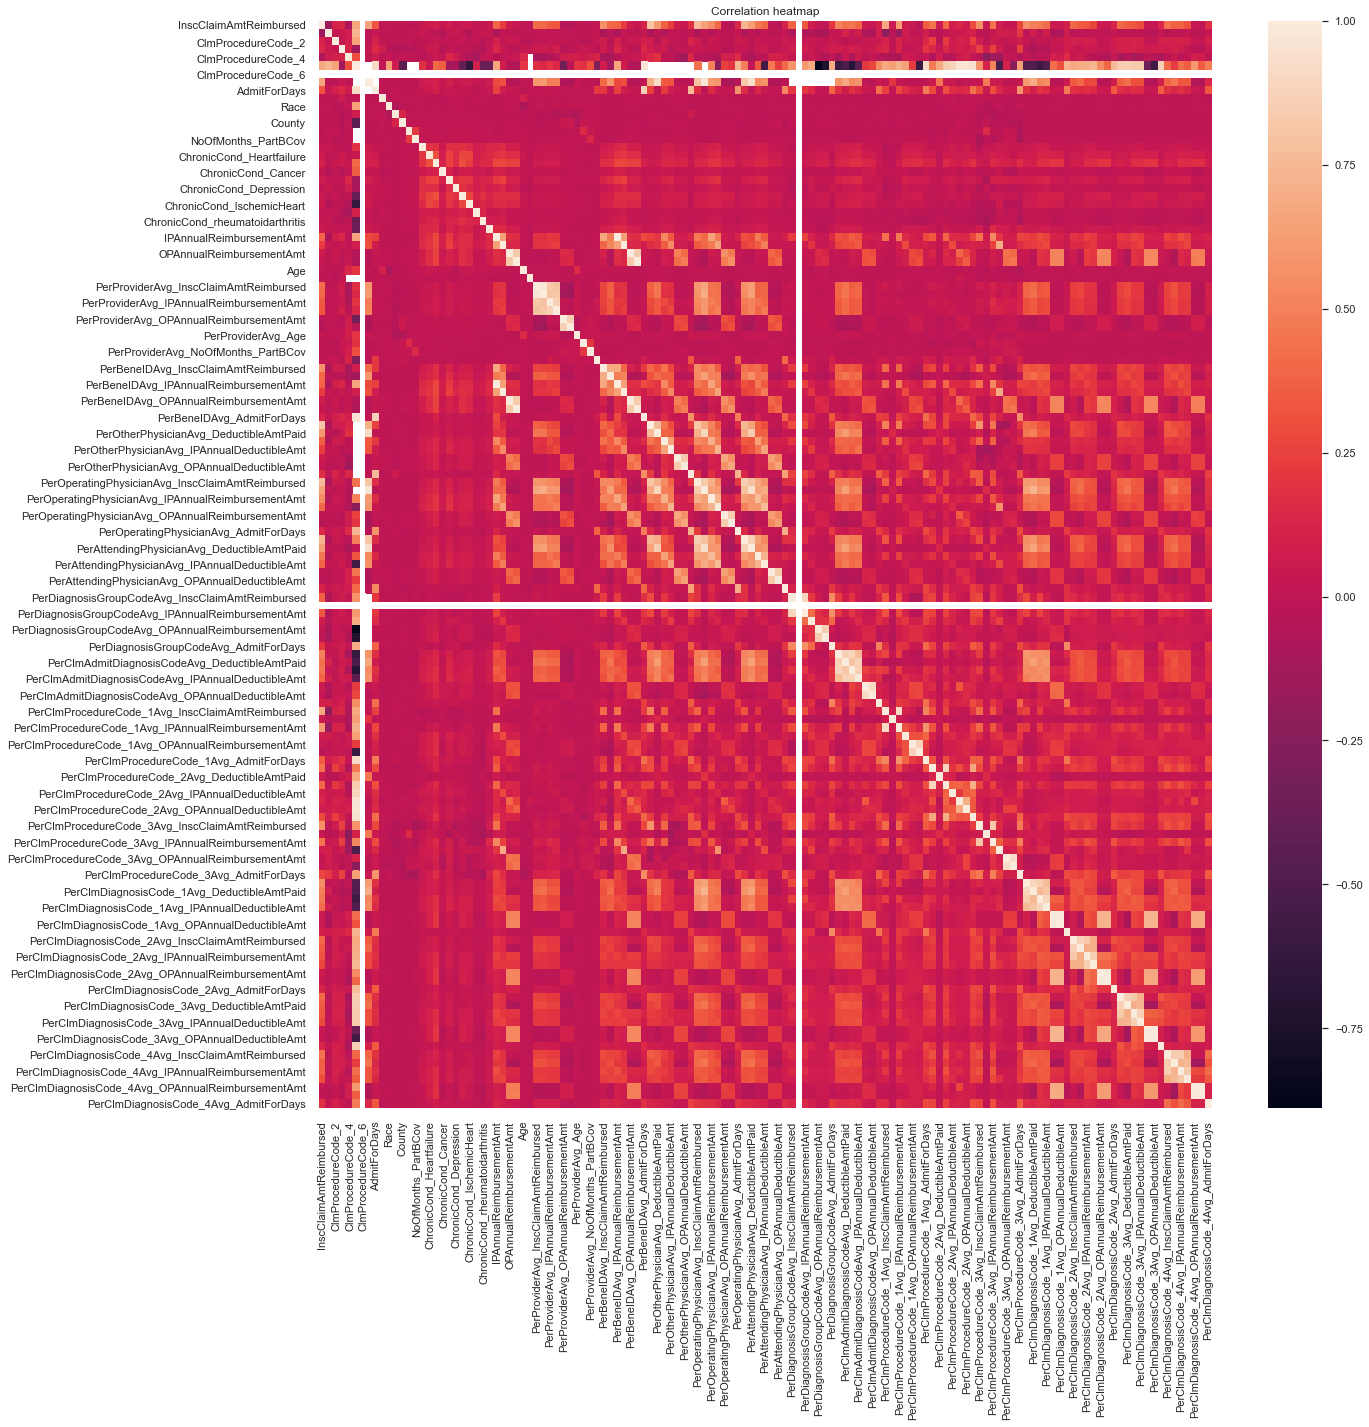

<Figure size 864x576 with 0 Axes>

In [216]:
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(Train_ProviderAllData.corr())
plt.show()
plt.savefig('Train_ProviderAllData_correlationgraph')

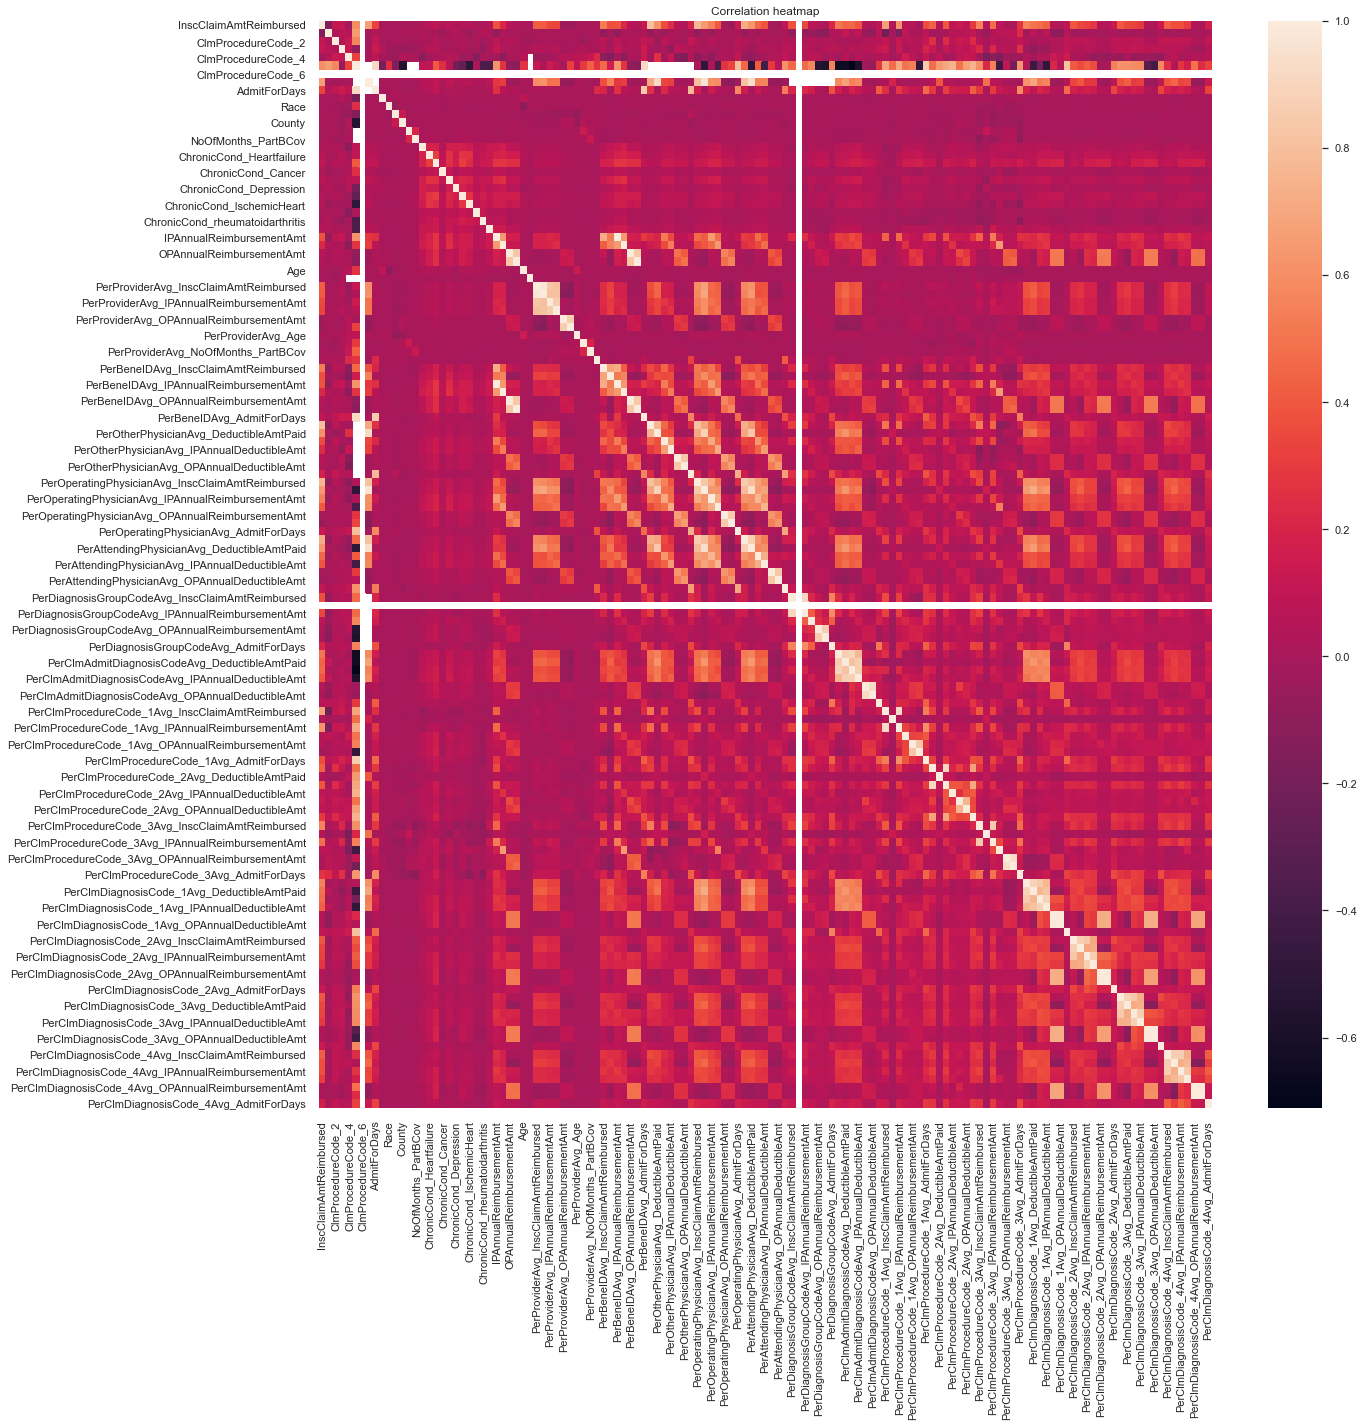

<Figure size 864x576 with 0 Axes>

In [217]:
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(Test_ProviderAllData.corr())
plt.show()
plt.savefig('Test_ProviderAllData_correlationgraph')

In [218]:
Train_ProviderAllData.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician',
       ...
       'PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt',
       'PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt',
       'PerClmDiagnosisCode_3Avg_AdmitForDays',
       'PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed',
       'PerClmDiagnosisCode_4Avg_DeductibleAmtPaid',
       'PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt',
       'PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt',
       'PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt',
       'PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt',
       'PerClmDiagnosisCode_4Avg_AdmitForDays'],
      dtype='object', length=159)

In [219]:
#Grouping based on combinations of different variables

Train_ProviderAllData["ClmCount_Provider"]=Train_ProviderAllData.groupby(['Provider'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID"]=Train_ProviderAllData.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_AttendingPhysician"]=Train_ProviderAllData.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_OtherPhysician"]=Train_ProviderAllData.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_OperatingPhysician"]=Train_ProviderAllData.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train_ProviderAllData.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmProcedureCode_1"]=Train_ProviderAllData.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmProcedureCode_2"]=Train_ProviderAllData.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmProcedureCode_3"]=Train_ProviderAllData.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmProcedureCode_4"]=Train_ProviderAllData.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmProcedureCode_5"]=Train_ProviderAllData.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_1"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_2"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_3"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_4"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_5"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_6"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_7"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_8"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_9"]=Train_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_DiagnosisGroupCode"]=Train_ProviderAllData.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Train_ProviderAllData["ClmCount_Provider_BeneID_AttendingPhysician"]=Train_ProviderAllData.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID_OtherPhysician"]=Train_ProviderAllData.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train_ProviderAllData.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train_ProviderAllData.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID_OperatingPhysician"]=Train_ProviderAllData.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train_ProviderAllData.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train_ProviderAllData.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderAllData["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train_ProviderAllData.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

In [220]:
Test_ProviderAllData["ClmCount_Provider"]=Test_ProviderAllData.groupby(['Provider'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID"]=Test_ProviderAllData.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_AttendingPhysician"]=Test_ProviderAllData.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_OtherPhysician"]=Test_ProviderAllData.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_OperatingPhysician"]=Test_ProviderAllData.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test_ProviderAllData.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmProcedureCode_1"]=Test_ProviderAllData.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmProcedureCode_2"]=Test_ProviderAllData.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmProcedureCode_3"]=Test_ProviderAllData.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmProcedureCode_4"]=Test_ProviderAllData.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmProcedureCode_5"]=Test_ProviderAllData.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_1"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_2"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_3"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_4"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_5"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_6"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_7"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_8"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_ClmDiagnosisCode_9"]=Test_ProviderAllData.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_DiagnosisGroupCode"]=Test_ProviderAllData.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Test_ProviderAllData["ClmCount_Provider_BeneID_AttendingPhysician"]=Test_ProviderAllData.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID_OtherPhysician"]=Test_ProviderAllData.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test_ProviderAllData.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test_ProviderAllData.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID_OperatingPhysician"]=Test_ProviderAllData.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test_ProviderAllData.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test_ProviderAllData.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderAllData["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test_ProviderAllData.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

In [221]:
Train_ProviderAllData.shape

(558211, 188)

In [222]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... ClmCount_Provider_ClmDiagnosisCode_9  \
0      PHY383007  ...                                  NaN   
1      PHY402512  ...                                  NaN   
2            NaN  ...                                  NaN   
3            NaN  ...                                  NaN   
4            NaN  ...                                  NaN   

  ClmCount_Provider_DiagnosisGroupCode  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  1.0   

  ClmCount_Provider_BeneID_AttendingPhysician  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

  ClmCount_Provider_BeneID_OtherPhysician  \
0                                     1.0   
1                                     1.0   
2                                     NaN   
3                                     NaN   
4                                     NaN   

  ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                NaN               
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               

  ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0               
1                                                1.0               
2                                                1.0               
3                                                1.0               
4                                                1.0               

  ClmCount_Provider_BeneID_OperatingPhysician  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         1.0   
4                                         NaN   

  ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

  ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  
0                                                NaN              
1                                                NaN              
2                                        

In [223]:
Test_ProviderAllData.shape

(693603, 187)

In [224]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmCount_Provider_ClmDiagnosisCode_9  \
0      PHY413853                514  ...                                  NaN   
1            NaN               7840  ...                                  NaN   
2            NaN              V4581  ...                                  NaN   
3            NaN              42789  ...                                  NaN   
4      PHY330212               1532  ...                                  NaN   

  ClmCount_Provider_DiagnosisGroupCode  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

  ClmCount_Provider_BeneID_AttendingPhysician  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

  ClmCount_Provider_BeneID_OtherPhysician  \
0                                     1.0   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     1.0   

  ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                NaN               
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               

  ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0               
1                                                1.0               
2                                                1.0               
3                                                1.0               
4                                                1.0               

  ClmCount_Provider_BeneID_OperatingPhysician  \
0                                         1.0   
1                                         1.0   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  
0                                                NaN               
1                                                NaN               
2             

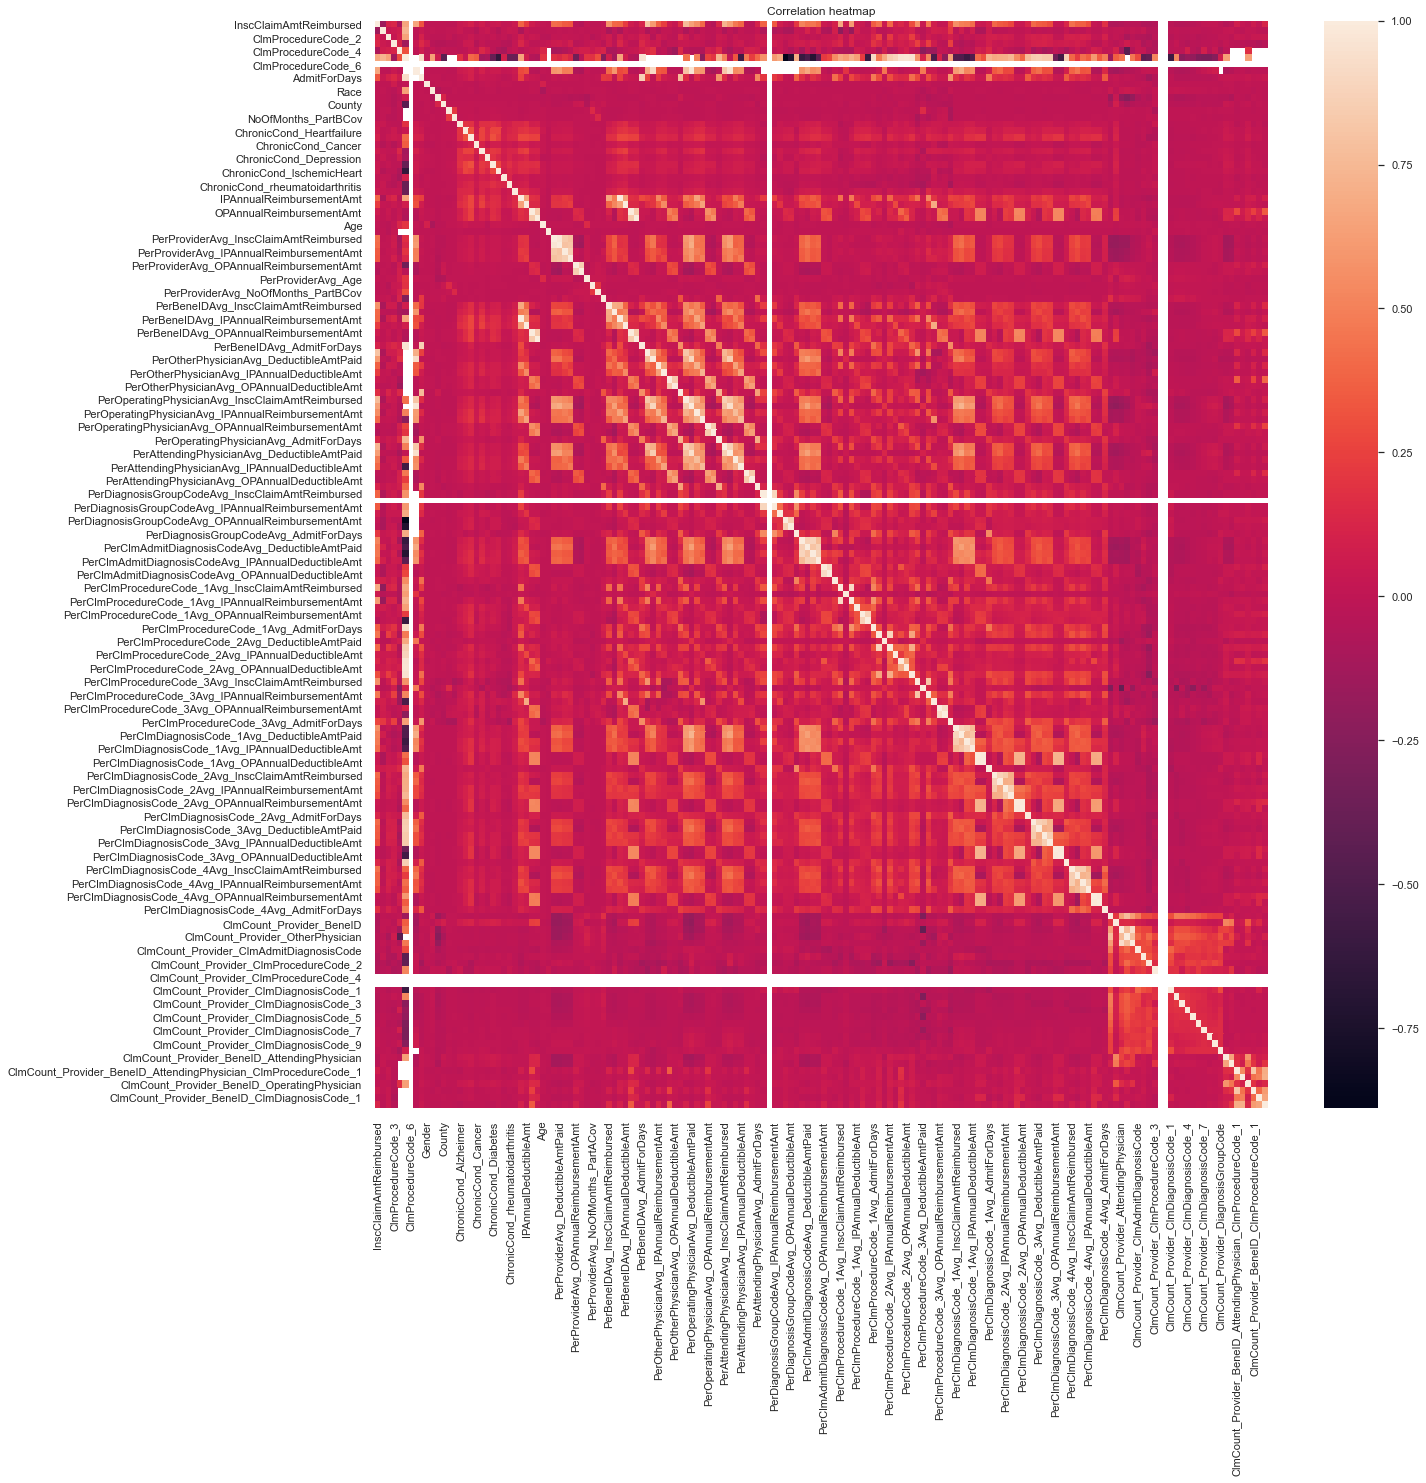

<Figure size 864x576 with 0 Axes>

In [225]:
# Correlation Heatmap for Train data
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(Train_ProviderAllData.corr())
plt.show()
plt.savefig('Train_ProviderAllData_correlationgraph_fullfeatures')

In [226]:
# Correlation heatmap for Test data
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(Test_ProviderAllData.corr())
plt.show()
plt.savefig('Test_ProviderAllData_correlationgraph_fullfeatures')

<Figure size 864x576 with 0 Axes>

#### Checking unique claim diagnose code

In [230]:
code_value_clm1 = Train_ProviderAllData['ClmDiagnosisCode_1'].astype(str).str[0:2]
code_value_clm1.unique()

array(['59', '78', 'V4', '29', '03', '51', 'na', '71', 'V1', '27', '42',
       'V7', '24', '41', '56', '79', '04', '35', '85', 'V5', '72', '44',
       '45', '18', '60', '50', '57', '40', '16', '25', '68', '15', '82',
       '28', '61', '47', '99', '20', '70', '33', '31', '49', '88', '48',
       '53', '43', '91', '55', '00', '58', '73', '46', '19', '17', 'V0',
       '34', 'V6', '62', 'V8', '11', '36', '83', 'E8', '02', '32', '52',
       '38', '23', '84', '37', 'V2', '87', '30', '90', '21', '12', '92',
       '39', '63', '69', '64', '81', '89', '95', '80', '22', '07', '06',
       '93', '94', '54', '26', '05', '13', '74', '14', '98', '08', '97',
       '75', '66', 'E9', '09', '96', '10', '77', '86', '65', '67', '01',
       '76'], dtype=object)

In [231]:
code_value_clm2 = Train_ProviderAllData['ClmDiagnosisCode_2'].astype(str).str[0:2]
code_value_clm2.unique()

array(['42', '51', 'na', 'V4', '29', '58', '36', '78', '49', '25', '24',
       '27', '40', '55', '56', '59', '75', '28', '72', '44', '53', 'V1',
       '41', '73', 'E8', '62', 'V5', '19', '33', '34', 'V7', '60', '71',
       '43', '30', '48', '38', '79', '32', '57', '35', '45', '46', '17',
       '07', '18', '84', 'V0', '31', '70', '52', 'E9', '37', 'V6', '89',
       '68', '92', '16', '26', '00', '61', '47', '20', '11', '14', '23',
       '22', '21', '69', '87', '95', '15', '04', '88', 'V8', '99', '81',
       '91', '50', '74', '03', '82', '39', '05', '80', '97', '96', '83',
       '90', '86', 'V2', '64', '94', '93', '09', '85', '08', '01', '13',
       '66', '65', '98', '54', '12', '76', '67', '77', '63'], dtype=object)

In [232]:
code_value_clm3 = Train_ProviderAllData['ClmDiagnosisCode_3'].astype(str).str[0:2]
code_value_clm3.unique()

array(['na', 'V5', '55', '30', '28', '33', '41', '42', '00', '25', 'V0',
       '59', '58', '49', '79', 'V4', '57', '85', '40', '21', 'V1', '24',
       '56', '39', '46', '03', '70', '27', 'V7', '44', '78', '53', 'V8',
       '29', '99', 'E8', '62', '04', '69', '37', 'E9', '31', '19', '71',
       '72', '34', '26', '36', '92', '45', '73', '35', '32', '61', '17',
       '51', '43', '47', '22', '75', '60', '05', '94', '20', 'V6', '88',
       '18', '95', '48', '84', '91', '38', '68', '07', '14', '87', '80',
       '64', '16', '89', '82', '74', '83', '15', '23', '11', '08', '52',
       '81', '96', '13', '90', '50', '86', '98', 'V2', '65', '09', '54',
       '93', '97', '01', '12', '06', '10', '02'], dtype=object)

In [233]:
code_value_clm4 = Train_ProviderAllData['ClmDiagnosisCode_4'].astype(str).str[0:2]
code_value_clm4.unique()

array(['na', '40', '27', 'V1', '57', '28', 'V5', '70', 'V0', '58', '72',
       '42', '41', '24', '56', 'V4', '49', '99', '25', 'E8', '78', '31',
       '79', '60', '30', '71', '26', '51', '53', '04', '48', '45', '43',
       '55', 'V6', '11', '20', '73', '44', '29', '47', '21', '37', '36',
       '61', '91', 'E9', '35', '17', '18', '81', '69', 'V7', '33', '32',
       '19', '59', '94', '74', '46', '38', '86', '23', '03', '34', '62',
       '87', '05', '16', '39', 'V8', '52', '15', '84', '75', '07', '22',
       '64', '80', '68', '82', '88', '50', '92', '00', '95', '14', '90',
       '13', '85', '89', '83', '98', '93', '65', '96', '01', 'V2', '09',
       '08', '97', '54', '06', '66', '02'], dtype=object)

In [238]:
code_value_clm5 = Train_ProviderAllData['ClmDiagnosisCode_5'].astype(str).str[0:2]
code_value_clm5.unique()
len(code_value_clm5.unique())

104

### Data Preprocessing

In [241]:
# Checking features whose data type is number
dt_type_num = Train_ProviderAllData.select_dtypes([np.number]).columns

In [243]:
dt_type_num

Index(['InscClaimAmtReimbursed', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'AdmitForDays', 'Gender',
       ...
       'ClmCount_Provider_ClmDiagnosisCode_9',
       'ClmCount_Provider_DiagnosisGroupCode',
       'ClmCount_Provider_BeneID_AttendingPhysician',
       'ClmCount_Provider_BeneID_OtherPhysician',
       'ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1',
       'ClmCount_Provider_BeneID_OperatingPhysician',
       'ClmCount_Provider_BeneID_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1'],
      dtype='object', length=162)

In [244]:
#Club all other data type features
dt_type_other = Train_ProviderAllData.select_dtypes(exclude = [np.number]).columns

In [245]:
dt_type_other

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode',
       'AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode', 'DOB', 'DOD',
       'RenalDiseaseIndicator'],
      dtype='object')

In [247]:
#Fill value to all number features
Train_ProviderAllData[dt_type_num] = Train_ProviderAllData[dt_type_num].fillna(value=0)

In [248]:
Train_ProviderAllData.head()

Provider PotentialFraud     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51001             No  BENE11727  CLM733300   2009-12-17  2009-12-17   
1  PRV51001             No  BENE24646  CLM372475   2009-05-22  2009-05-23   
2  PRV51001             No  BENE31617  CLM748221   2009-12-28  2009-12-28   
3  PRV51001             No  BENE32715  CLM272936   2009-03-29  2009-03-30   
4  PRV51001             No  BENE36012   CLM58316   2009-07-04  2009-07-08   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      20          PHY383007                NaN   
1                     700          PHY405682                NaN   
2                     900          PHY345302                NaN   
3                     500          PHY318842          PHY392882   
4                   36000          PHY340163                NaN   

  OtherPhysician  ... ClmCount_Provider_ClmDiagnosisCode_9  \
0      PHY383007  ...                                  0.0   
1      PHY402512  ...                                  0.0   
2            NaN  ...                                  0.0   
3            NaN  ...                                  0.0   
4            NaN  ...                                  0.0   

  ClmCount_Provider_DiagnosisGroupCode  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  1.0   

  ClmCount_Provider_BeneID_AttendingPhysician  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

  ClmCount_Provider_BeneID_OtherPhysician  \
0                                     1.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

  ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                0.0               
4                                                0.0               

  ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0               
1                                                1.0               
2                                                1.0               
3                                                1.0               
4                                                1.0               

  ClmCount_Provider_BeneID_OperatingPhysician  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   

  ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

  ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

  ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  
0                                                0.0              
1                                                0.0              
2                                        

In [249]:
# Fill value to all number features
Test_ProviderAllData[dt_type_num]=Test_ProviderAllData[dt_type_num].fillna(value=0)

In [250]:
Test_ProviderAllData.head()

Provider     BeneID    ClaimID ClaimStartDt  ClaimEndDt  \
0  PRV51002  BENE13342  CLM129901   2009-01-10  2009-01-10   
1  PRV51002  BENE13915  CLM163936   2009-01-29  2009-01-29   
2  PRV51002  BENE13915  CLM348696   2009-05-09  2009-05-09   
3  PRV51002  BENE13915  CLM500906   2009-08-01  2009-08-01   
4  PRV51002  BENE14575  CLM272820   2009-03-29  2009-03-29   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                     100          PHY418314          PHY418314   
1                      40          PHY399539          PHY421140   
2                      70          PHY352340                NaN   
3                     100          PHY366184                NaN   
4                     400          PHY401762                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmCount_Provider_ClmDiagnosisCode_9  \
0      PHY413853                514  ...                                  0.0   
1            NaN               7840  ...                                  0.0   
2            NaN              V4581  ...                                  0.0   
3            NaN              42789  ...                                  0.0   
4      PHY330212               1532  ...                                  0.0   

  ClmCount_Provider_DiagnosisGroupCode  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

  ClmCount_Provider_BeneID_AttendingPhysician  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

  ClmCount_Provider_BeneID_OtherPhysician  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     1.0   

  ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                0.0               
4                                                0.0               

  ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0               
1                                                1.0               
2                                                1.0               
3                                                1.0               
4                                                1.0               

  ClmCount_Provider_BeneID_OperatingPhysician  \
0                                         1.0   
1                                         1.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

  ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

  ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  
0                                                0.0               
1                                                0.0               
2             

In [252]:
features=Train_ProviderAllData.columns
features[:58]

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode', 'AdmitForDays', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'Ch

In [253]:
# Club all features which needs to remove from our data set
feature_needto_remove=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

In [254]:
# Removing unwanted features from Train data set
Train_data_after_feature_removal = Train_ProviderAllData.drop(axis=1,columns=feature_needto_remove)

In [255]:
Train_data_after_feature_removal.shape

(558211, 157)

In [256]:
Train_data_after_feature_removal.shape

(558211, 157)

In [257]:
# removing unwanted features from Test data set
Test_data_after_feature_removal = Test_ProviderAllData.drop(axis=1,columns=feature_needto_remove)

In [258]:
Test_data_after_feature_removal.shape

(693603, 156)

In [260]:
Test_data_after_feature_removal.head()

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitForDays  Gender  \
0  PRV51002                     100                0.0           0.0       2   
1  PRV51002                      40                0.0           0.0       2   
2  PRV51002                      70                0.0           0.0       2   
3  PRV51002                     100                0.0           0.0       2   
4  PRV51002                     400                0.0           0.0       2   

   Race RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0     1                     0                   12                   12   
1     1                     0                    0                   12   
2     1                     0                    0                   12   
3     1                     0                    0                   12   
4     1                     0                   12                   12   

   ChronicCond_Alzheimer  ...  ClmCount_Provider_ClmDiagnosisCode_9  \
0                      0  ...                                   0.0   
1                      0  ...                                   0.0   
2                      0  ...                                   0.0   
3                      0  ...                                   0.0   
4                      1  ...                                   0.0   

   ClmCount_Provider_DiagnosisGroupCode  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   ClmCount_Provider_BeneID_AttendingPhysician  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_OtherPhysician  \
0                                      1.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      1.0   

   ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   ClmCount_Provider_BeneID_OperatingPhysician  \
0                                          1.0   
1                                          1.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  
0     

In [261]:
# Dummification for feature

Train_data_after_feature_removal=pd.get_dummies(Train_data_after_feature_removal,columns=['Gender','Race'],drop_first=True)
Test_data_after_feature_removal=pd.get_dummies(Test_data_after_feature_removal,columns=['Gender','Race'],drop_first=True)

In [262]:
Train_data_after_feature_removal.head()

Provider PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0  PRV51001             No                      20                0.0   
1  PRV51001             No                     700                0.0   
2  PRV51001             No                     900                0.0   
3  PRV51001             No                     500                0.0   
4  PRV51001             No                   36000             1068.0   

   AdmitForDays RenalDiseaseIndicator  NoOfMonths_PartACov  \
0           0.0                     1                   12   
1           0.0                     0                   12   
2           0.0                     0                   12   
3           0.0                     0                   12   
4           5.0                     0                   12   

   NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  ...  \
0                   12                      1                         1  ...   
1                   12                      1                         0  ...   
2                   12                      0                         0  ...   
3                   12                      1                         1  ...   
4                   12                      0                         1  ...   

   ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   ClmCount_Provider_BeneID_OperatingPhysician  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          1.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmProcedureCode_1  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
0                                          1.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  Gender_2  \
0                                                0.0                      0   
1                                                0.0                      0   
2                                                0.0                      1   
3                                                0.0                      0   
4                                                0.0                      0   

   Race_2  Race_3  Race_5  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 159 columns]

In [263]:
# checking data for 
Train_data_after_feature_removal['PotentialFraud']

0         No
1         No
2         No
3         No
4         No
          ..
558206    No
558207    No
558208    No
558209    No
558210    No
Name: PotentialFraud, Length: 558211, dtype: object

In [265]:
Train_data_after_feature_removal.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_data_after_feature_removal.head()
Train_data_after_feature_removal.PotentialFraud=Train_data_after_feature_removal.PotentialFraud.astype('int64')
Train_data_after_feature_removal.PotentialFraud.dtypes
Train_data_after_feature_removal.PotentialFraud.min()

0

In [266]:
Train_data_after_feature_removal.PotentialFraud.max()

1

In [267]:
Train_data_after_feature_removal.dtypes

Provider                                                           object
PotentialFraud                                                      int64
InscClaimAmtReimbursed                                              int64
DeductibleAmtPaid                                                 float64
AdmitForDays                                                      float64
                                                                   ...   
ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1    float64
Gender_2                                                            uint8
Race_2                                                              uint8
Race_3                                                              uint8
Race_5                                                              uint8
Length: 159, dtype: object

In [268]:
#Removing Train data
Test_data_after_feature_removal=Test_data_after_feature_removal.iloc[:135392]

In [269]:
Test_data_after_feature_removal.shape

(135392, 158)

In [270]:
Test_data_after_feature_removal.tail()

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitForDays  \
135387  PRV57750                    1300                0.0           0.0   
135388  PRV57750                      10                0.0           0.0   
135389  PRV57750                     200                0.0           0.0   
135390  PRV57750                    2300                0.0           0.0   
135391  PRV57750                     200                0.0           0.0   

       RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
135387                     0                   12                   12   
135388                     0                   12                   12   
135389                     0                   12                   12   
135390                     0                   12                   12   
135391                     0                   12                   12   

        ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
135387                      0                         1   
135388                      0                         0   
135389                      0                         0   
135390                      1                         0   
135391                      0                         1   

        ChronicCond_KidneyDisease  ...  \
135387                          0  ...   
135388                          0  ...   
135389                          0  ...   
135390                          1  ...   
135391                          0  ...   

        ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
135387                                                0.0                
135388                                                0.0                
135389                                                0.0                
135390                                                0.0                
135391                                                0.0                

        ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
135387                                                1.0                
135388                                                1.0                
135389                                                1.0                
135390                                                1.0                
135391                                                1.0                

        ClmCount_Provider_BeneID_OperatingPhysician  \
135387                                          0.0   
135388                                          0.0   
135389                                          0.0   
135390                                          1.0   
135391                                          1.0   

        ClmCount_Provider_BeneID_ClmProcedureCode_1  \
135387                                          0.0   
135388                                          0.0   
135389                                          0.0   
135390                                          0.0   
135391                                          0.0   

        ClmCount_Provider_BeneID_ClmDiagnosisCode_1  \
135387                                          1.0   
135388                                          1.0   
135389                                          1.0   
135390                                          1.0   
135391                                          1.0   

        ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1  \
135387                                                0.0                
135388                                                0.0                
135389                                                0.0                
135390                                                0.0                
135391                                                0.0                

        Gender_2  Race_2  Race_3  Race_5  
135387         1       0       0       0  
135388         1       0       0       0  
135389         1       1       0   

In [273]:
print(len(Train_data_after_feature_removal['Provider'].unique()))
print(len(Test_data_after_feature_removal['Provider'].unique()))

5410
1353


In [274]:
Train_data_after_feature_removal_provider=Train_data_after_feature_removal.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Test_data_after_feature_removal_provider=Test_data_after_feature_removal.groupby(['Provider'],as_index=False).agg('sum')

In [275]:
Train_data_after_feature_removal_provider.shape

(5410, 158)

In [277]:
Test_data_after_feature_removal_provider.shape

(1353, 157)

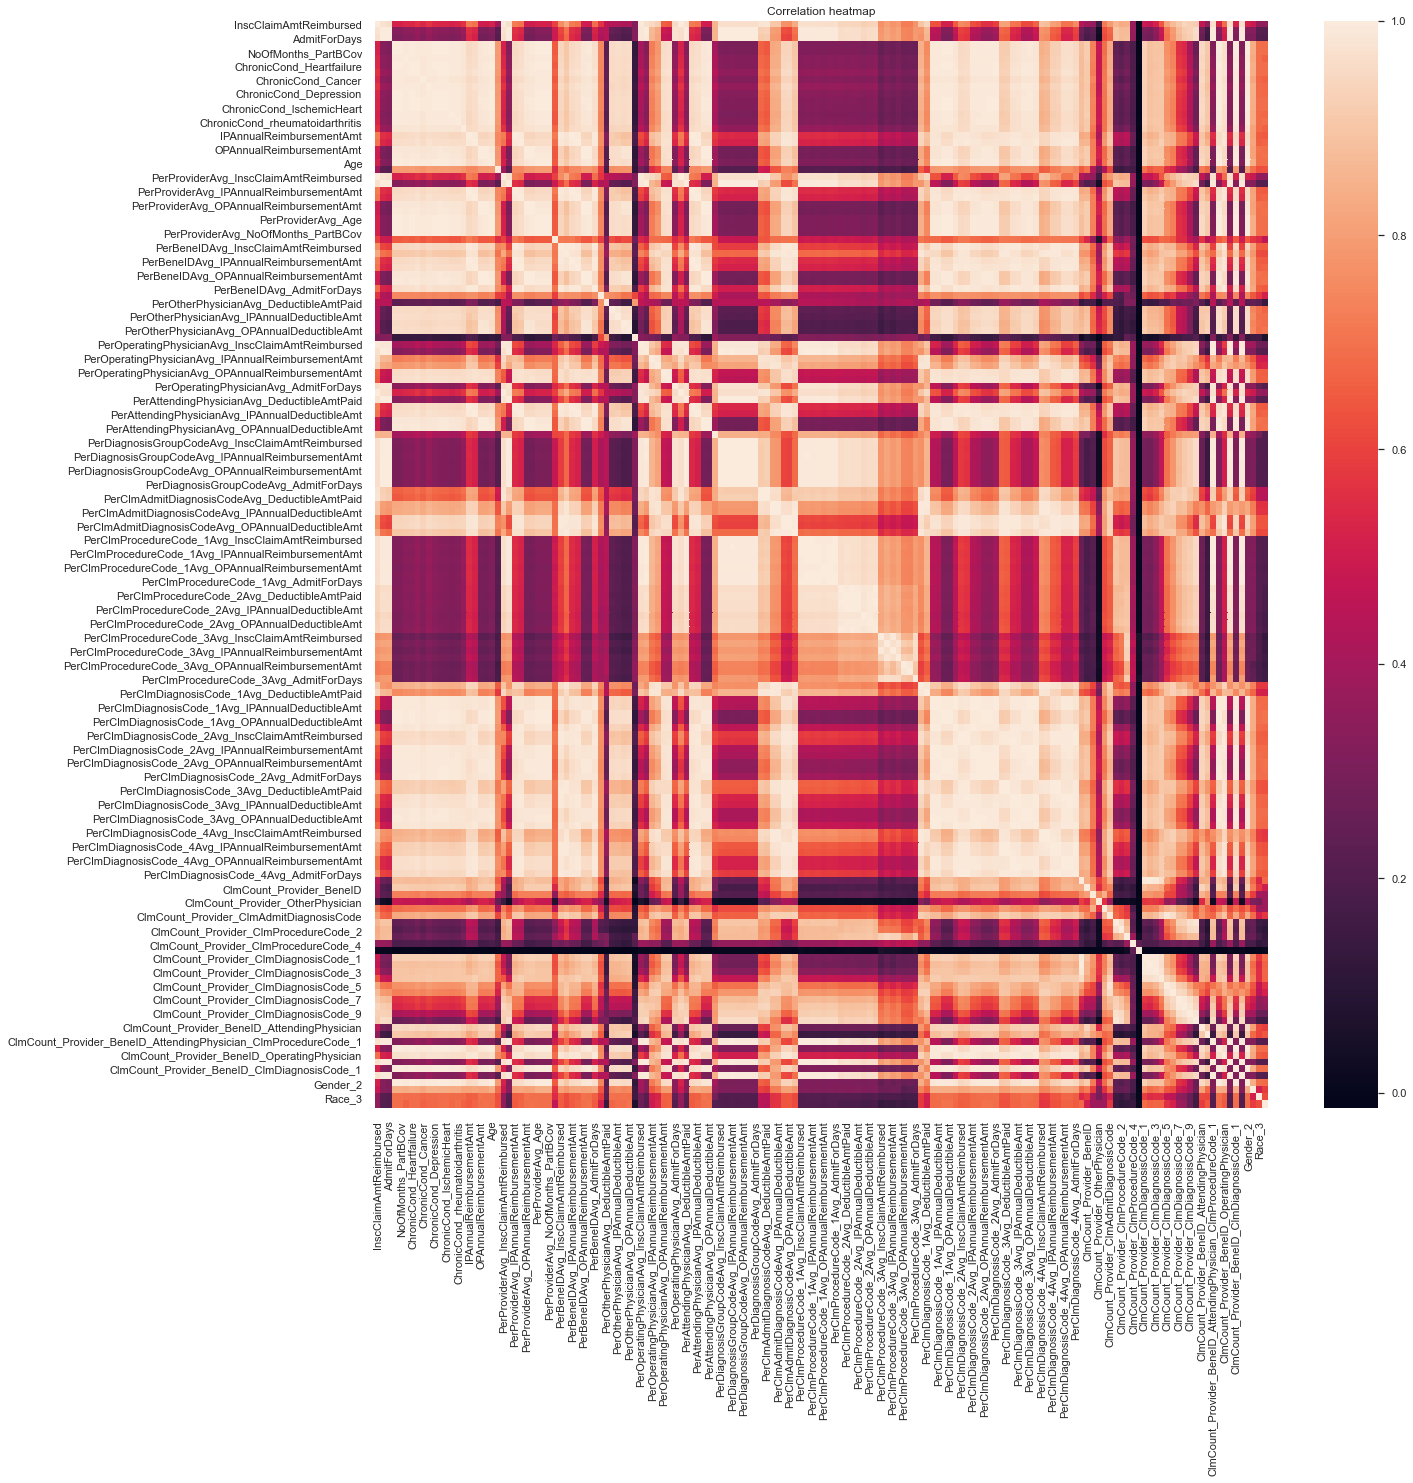

<Figure size 864x576 with 0 Axes>

In [278]:
# Correlation graph after feature rempval
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(Test_data_after_feature_removal_provider.corr())
plt.show()
plt.savefig('Test_data_after_feature_removal_provider_corr')

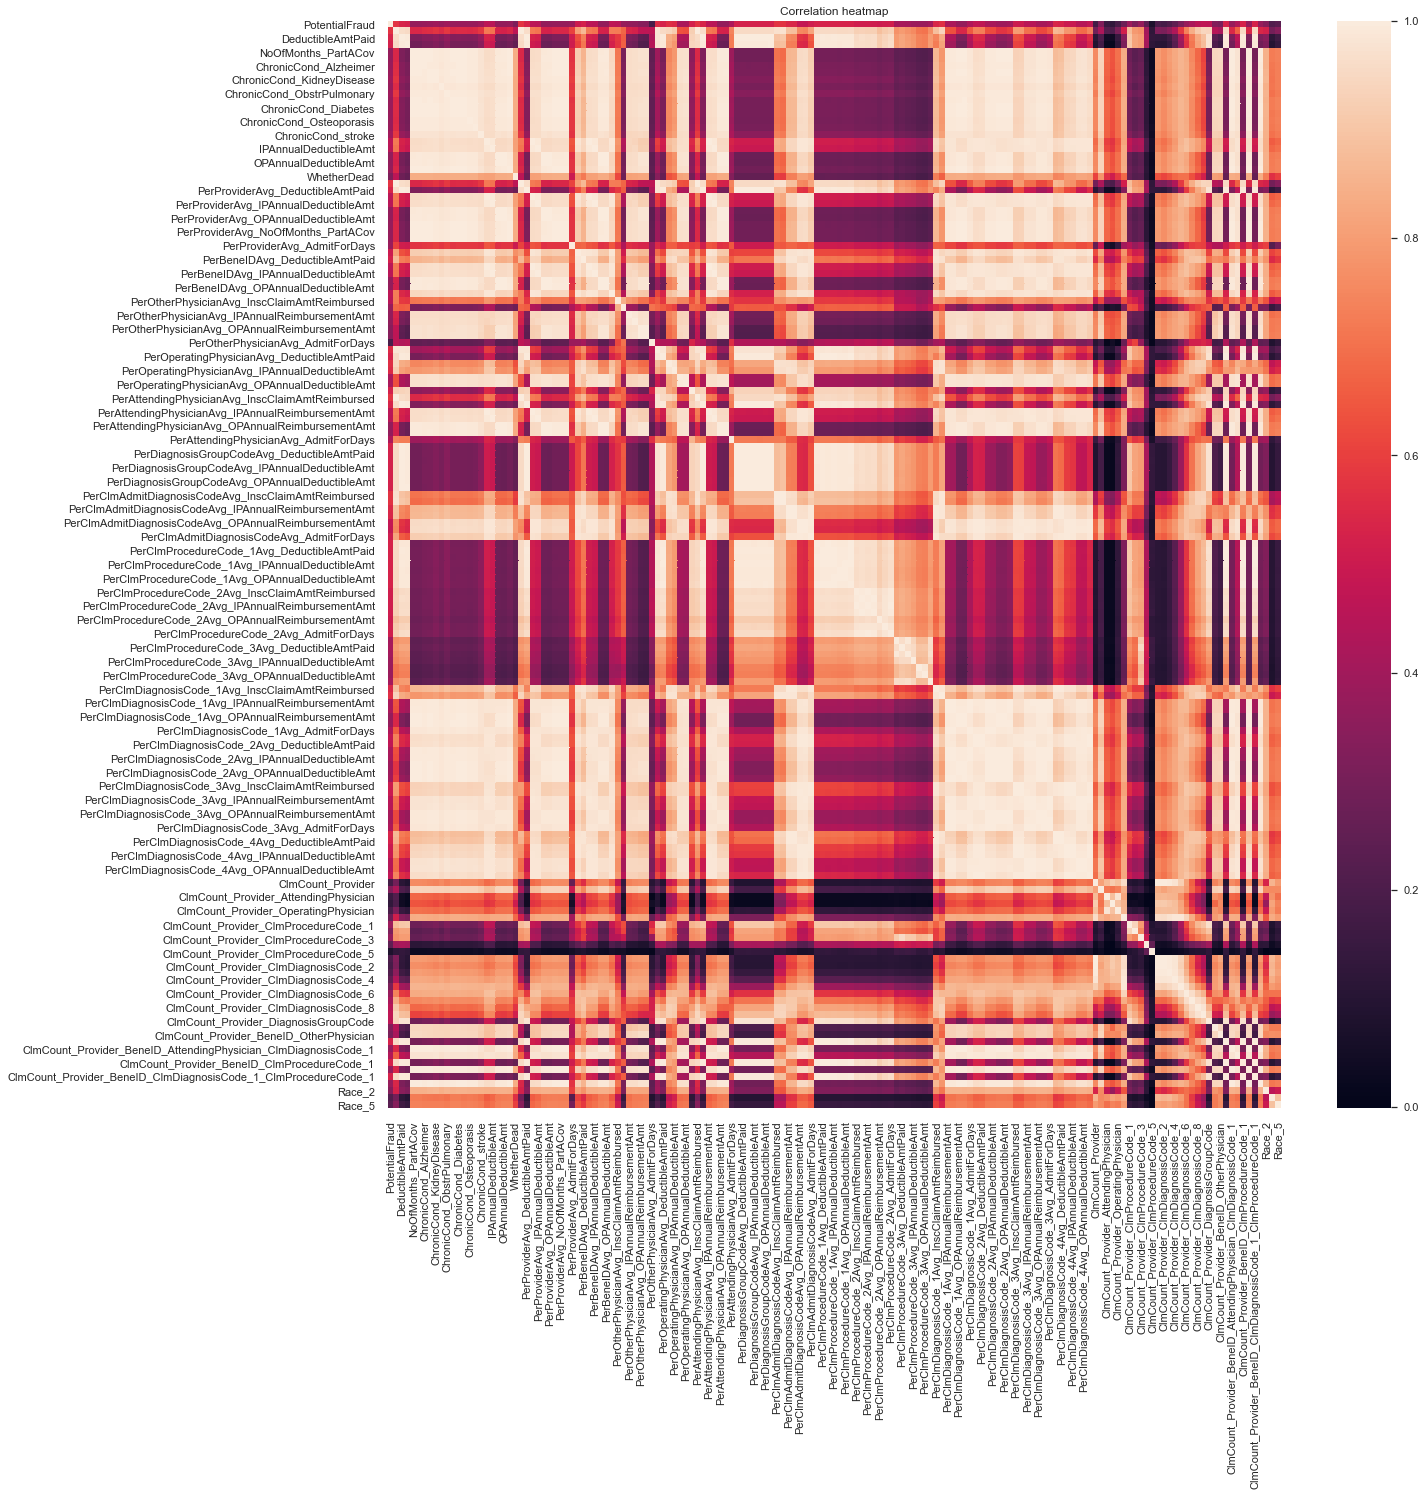

<Figure size 864x576 with 0 Axes>

In [279]:
#Correaltion graph after feature removal
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(Train_data_after_feature_removal_provider.corr())
plt.show()
plt.savefig('Train_data_after_feature_removal_provider_corr')

### Train Test Split
Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [296]:
X=Train_data_after_feature_removal_provider.drop(axis=1,columns=['Provider','PotentialFraud'])
y=Train_data_after_feature_removal_provider['PotentialFraud']


In [297]:
Train_data_after_feature_removal_provider.describe()

PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
count     5410.000000            5.410000e+03        5410.000000   
mean         0.093530            1.028730e+05        8078.560444   
std          0.291201            2.687367e+05       24924.637743   
min          0.000000            0.000000e+00           0.000000   
25%          0.000000            4.460000e+03          10.000000   
50%          0.000000            1.980500e+04         310.000000   
75%          0.000000            8.556500e+04        5340.000000   
max          1.000000            5.996050e+06      539426.000000   

       AdmitForDays  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
count   5410.000000          5410.000000          5410.000000   
mean      49.864325          1231.105176          1231.858226   
std      159.883542          3252.788048          3254.936965   
min        0.000000             0.000000             0.000000   
25%        0.000000           120.000000           120.000000   
50%        0.000000           372.000000           372.000000   
75%       32.000000          1044.000000          1044.000000   
max     3568.000000         98234.000000         98615.000000   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
count            5410.000000               5410.000000   
mean               41.465250                 60.921072   
std               109.109322                158.698296   
min                 0.000000                  0.000000   
25%                 4.000000                  6.000000   
50%                12.000000                 18.000000   
75%                36.000000                 52.750000   
max              3282.000000               4638.000000   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  ...  \
count                5410.000000         5410.000000  ...   
mean                   42.510906           15.620148  ...   
std                   110.048136           41.558020  ...   
min                     0.000000            0.000000  ...   
25%                     4.000000            1.000000  ...   
50%                    13.000000            5.000000  ...   
75%                    37.000000           13.000000  ...   
max                  3111.000000         1238.000000  ...   

       ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1  \
count                                        5410.000000                
mean                                            4.312754                
std                                            13.634961                
min                                             0.000000                
25%                                             0.000000                
50%                                             0.000000                
75%                                             3.000000                
max                                           299.000000                

       ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1  \
count                                        5410.000000                
mean                                          101.190203                
std                                           266.962144                
min                                             0.000000                
25%                                             9.000000                
50%                                            30.000000                
75%                                            86.000000                
max                                          8065.000000                

       ClmCount_Provider_BeneID_OperatingPhysician  \
count                                   5410.00000   
mean                                      22.75915   
std                                       56.50895   
min                                        0.00000   
25%                                        2.00000   
50%                                        7.00000   
75%                                      

#### Standardization

In [298]:
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)
X_unseen=sc.transform(Test_data_after_feature_removal_provider.iloc[:,1:])
print(X_std[0:3,:])

[[ 6.57567293e-03 -1.09883787e-01 -1.24253949e-01 -2.86274798e-01
  -2.86317176e-01 -2.42579601e-01 -2.64180197e-01 -2.31837309e-01
  -2.55573521e-01 -2.68694606e-01 -3.05089698e-01 -2.71257868e-01
  -2.69678183e-01 -3.11868006e-01 -2.85323944e-01 -1.65466659e-01
  -7.59340700e-02 -2.52237575e-01 -2.67686562e-01 -3.05868340e-01
  -2.79481737e-01 -3.29949625e-01  6.57567293e-03 -1.11795621e-01
  -7.59340700e-02 -2.52237575e-01 -2.67686562e-01 -3.05868340e-01
  -2.79481737e-01 -2.86274798e-01 -2.86317176e-01 -1.32504740e-01
  -8.74467495e-02 -1.89836343e-01 -7.59340700e-02 -2.52237575e-01
  -2.67686562e-01 -3.05868340e-01 -2.24193021e-01  4.37698220e-01
   1.29444881e-02  4.25330396e-02 -1.79108678e-01 -2.11550087e-01
  -2.86668349e-01  3.40140865e-02 -8.29924305e-02 -1.74176745e-01
   2.77169011e-01 -1.57296451e-01 -3.23392833e-01 -3.10055598e-01
  -1.88328575e-01  5.38882805e-03 -1.12040244e-01 -6.78172787e-02
  -2.43318828e-01 -2.71005188e-01 -3.03714857e-01 -1.68023770e-01
  -1.18044

In [299]:
print(X_unseen[0:3,:])

[[-1.82660498e-01 -3.08902064e-01 -3.11907867e-01  3.66763857e-01
   3.77351485e-01  3.44042281e-01  2.96684217e-01  2.67990182e-01
   2.25725844e-01  3.82290560e-01  3.92472932e-01  3.88768183e-01
   3.54058451e-01  3.28751688e-01  2.59119095e-01  3.13019839e-01
   3.99759783e-01  3.73634627e-01  3.87544025e-01  3.96927069e-01
   3.57899551e-01  9.66366623e-01 -1.82660498e-01 -3.08872779e-01
   3.99759783e-01  3.73634627e-01  3.87544025e-01  3.96927069e-01
   3.57899551e-01  3.66763857e-01  3.77351485e-01 -2.48130758e-01
   2.80270301e-01  2.02679931e-01  3.99759783e-01  3.73634627e-01
   3.87544025e-01  3.96927069e-01  4.26990827e-01  4.74289582e-02
  -2.46591438e-01  5.66224227e-01  6.75100702e-01  4.40252077e-01
   4.00494615e-01 -1.40926893e-01 -2.69781419e-01 -2.56456693e-01
  -2.89027320e-02  5.20407753e-02  6.87745843e-02  1.22760081e-01
  -2.73059911e-01 -1.34510270e-01 -2.27842922e-01  4.20029801e-01
   4.16952339e-01  3.78264651e-01  3.93169168e-01 -6.88493079e-02
  -3.14739

In [300]:
X_std.shape

(5410, 156)

In [301]:
X_unseen.shape

(1353, 156)

In [302]:
X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)

In [303]:
X_train.shape

(3787, 156)

In [308]:
X_val.shape

(1623, 156)

In [305]:
y_train.shape

(3787,)

In [307]:
y_val.shape

(1623,)

### Model Building

#### Logistic Regression

In [327]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

log.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=123, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [328]:
# Predict Probability
log_train_pred_probability=log.predict_proba(X_train)
log_val_pred_probability=log.predict_proba(X_val)

In [329]:
#Logistic Regression Model Prediction for Train and Validation

fig = plt.figure(figsize=(12,8))

sns.distplot(log.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(log.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

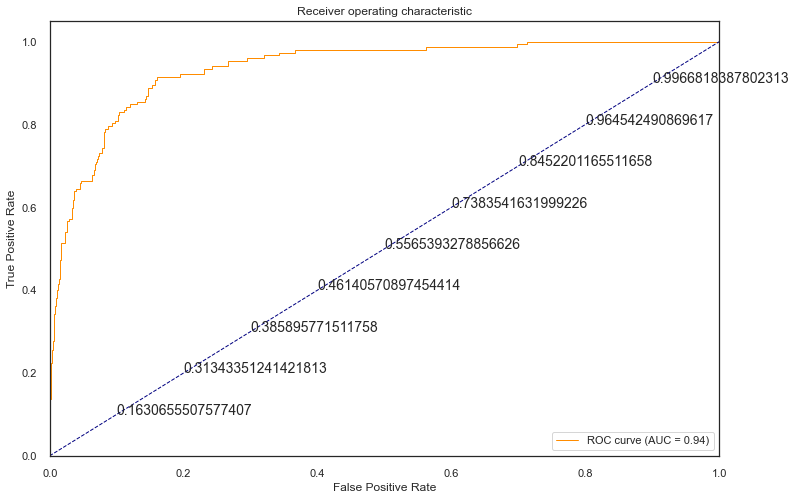

<Figure size 864x576 with 0 Axes>

In [442]:
# ROC Curve
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_Curve_For_LRC')

In [331]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.935794


Text(0.5, 1.0, 'Precision Vs Recall')

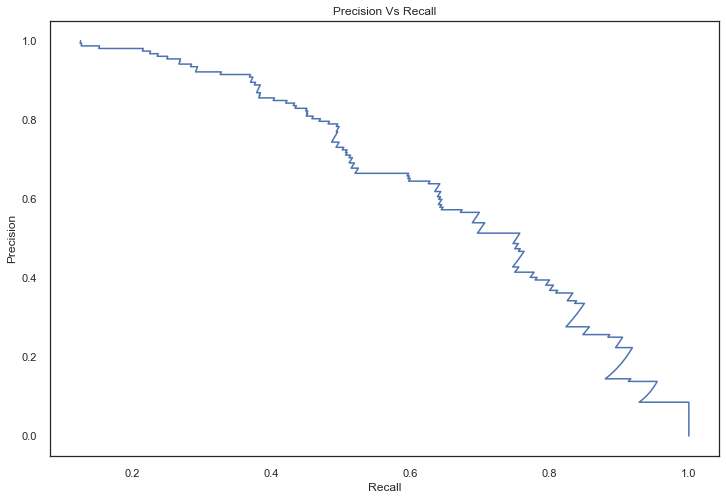

In [333]:
# Precision and Recall
precision, recall, _ = precision_recall_curve(y_val, log.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

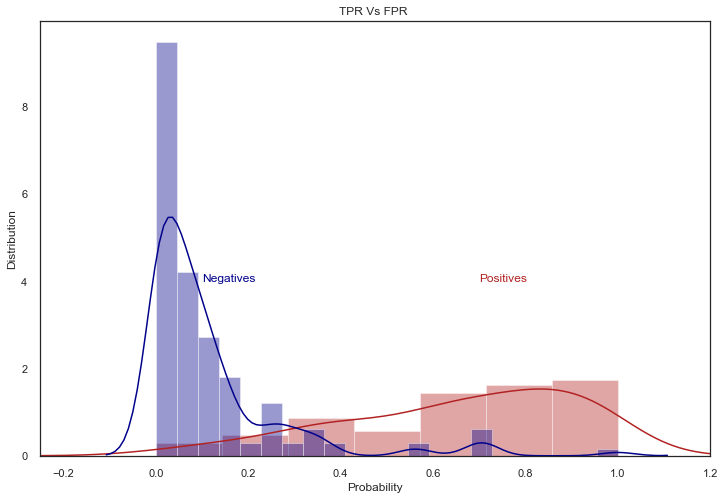

In [334]:
# TPR vs FPR
fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [336]:
log_train_pred_thres=(log.predict_proba(X_train)[:,1]>0.70).astype(bool)
log_val_pred_thres=(log.predict_proba(X_val)[:,1]>0.70).astype(bool)  

In [337]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )

specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[ 270   84]
 [ 210 3223]]
Confusion Matrix Val: 
 [[ 103   49]
 [  93 1378]]
Accuracy Train:  0.922365988909427
Accuracy Val:  0.9125077017868145
Sensitivity Train :  0.7627118644067796
Sensitivity Val:  0.6776315789473685
Specificity Train:  0.9388290125254879
Specificity Val:  0.9367777022433719
Kappa Value : 0.5438304105142315
AUC         : 0.8072046405953702
F1-Score Train  :  0.6474820143884892
F1-Score Val  :  0.5919540229885056


In [339]:
log_test_pred_thres = (log.predict_proba(X_unseen)[:,1]>0.65).astype(bool)
log_test_pred=pd.DataFrame(log_test_pred_thres)
log_test_pred.head()

0
0  False
1  False
2  False
3  False
4  False

In [340]:
#Replace 0 and 1 with Yes and No
Replacement = {1:'Yes',0:'No'}

Labels=log_test_pred[0].apply(lambda x : Replacement[x])
Labels.value_counts()

No     1200
Yes     153
Name: 0, dtype: int64

In [342]:
submission_log=pd.DataFrame({"Provider":Test_data_after_feature_removal_provider.Provider})
submission_log['PotentialFraud']=Labels
submission_log.shape

(1353, 2)

In [343]:
submission_log.to_csv("Submission_Logistic_Regression_F1_60_Threshold_60Prcnt.csv",index=False)

In [344]:
submission_log.PotentialFraud.value_counts()

No     1200
Yes     153
Name: PotentialFraud, dtype: int64

## KNN

In [355]:
from sklearn.neighbors import KNeighborsClassifier

#### Create a KNN model instance with n_neighbors=1

In [356]:
knn = KNeighborsClassifier(n_neighbors=1)

#### Fit this KNN model to the training data.

In [357]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Predictions and Evaluations
Let's evaluate our KNN model!

#### Use the predict method to predict values using your KNN model and X_test.

In [413]:
pred = knn.predict(X_val)

In [441]:
# ROC curve using KNN
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, knn.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

#for label in range(1,20,1):
#    plt.text((10-label)/10,(10-label)/10,thresholds[label*5],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_Curve_For_KNN')

<Figure size 864x576 with 0 Axes>

In [438]:
# TPR VS FPR
fig = plt.figure(figsize=(20,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

** Create a confusion matrix and classification report.**

In [361]:
from sklearn.metrics import classification_report,confusion_matrix

In [362]:
print(confusion_matrix(y_val,pred))

[[1399   72]
 [  81   71]]


In [446]:
print(classification_report(y_val,pred))
print("Confusion Matrix:-")
print(confusion_matrix(y_val,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1471
           1       0.82      0.31      0.45       152

    accuracy                           0.93      1623
   macro avg       0.88      0.65      0.71      1623
weighted avg       0.92      0.93      0.91      1623

Confusion Matrix:-
[[1461   10]
 [ 105   47]]


#### Choosing a K Value
#### Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [365]:
error_rate = []

# It Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

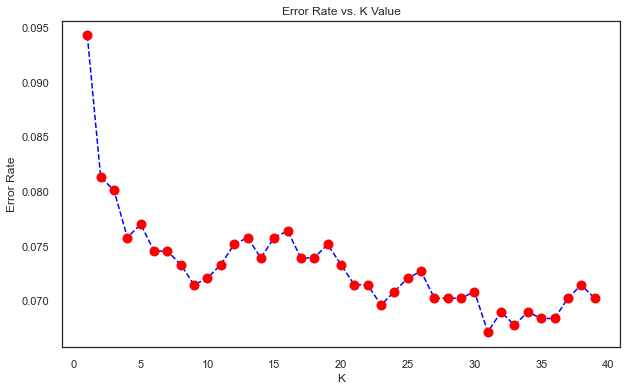

In [385]:
#create the following plot using the information from your for loop.
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('Errorratevskvalue')

#### Retrain with new K Value
Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [368]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_val)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_val,pred))
print('\n')
print(classification_report(y_val,pred))

WITH K=30


[[1461   10]
 [ 105   47]]


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1471
           1       0.82      0.31      0.45       152

    accuracy                           0.93      1623
   macro avg       0.88      0.65      0.71      1623
weighted avg       0.92      0.93      0.91      1623



## SVM

In [369]:
from sklearn.svm import SVC

In [417]:
svc_model = SVC(probability=True)

In [418]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Model Evaluation
#### Now get predictions from the model and create a confusion matrix and a classification report.

In [419]:
predictions_svm = svc_model.predict(X_val)

In [420]:
help(svc_model)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  ot

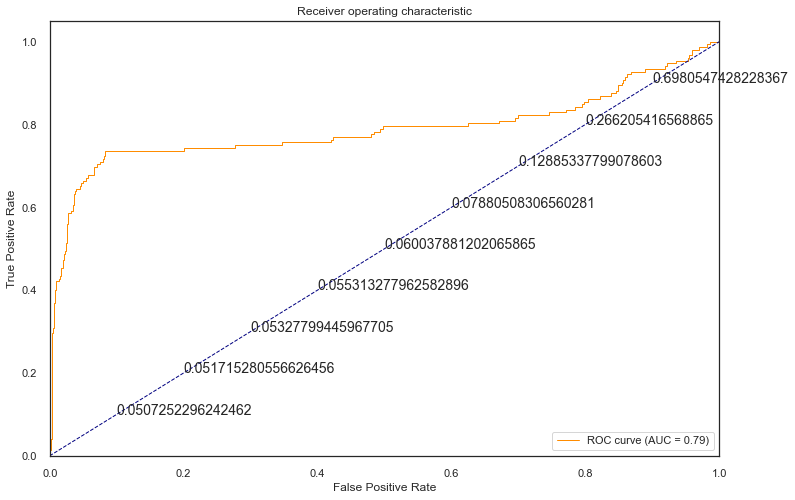

<Figure size 864x576 with 0 Axes>

In [440]:
# ROC curve using SVM
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, svc_model.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_Curve_For_SVM')

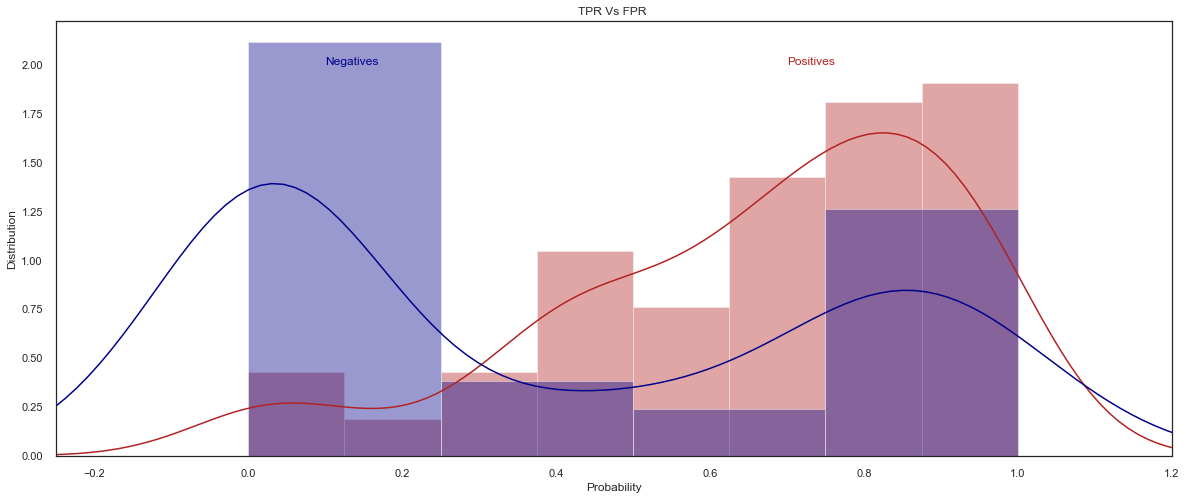

In [426]:
# TPR VS FPR
fig = plt.figure(figsize=(20,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,2,'Negatives',color='darkblue')
plt.text(0.7,2,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

In [373]:
from sklearn.metrics import classification_report,confusion_matrix

In [375]:
print(confusion_matrix(y_val,predictions_svm))

[[1459   12]
 [  92   60]]


In [445]:
print(classification_report(y_val,predictions_svm))
print("Confusion Matrix:-")
print(confusion_matrix(y_val,predictions_svm))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1471
           1       0.83      0.39      0.54       152

    accuracy                           0.94      1623
   macro avg       0.89      0.69      0.75      1623
weighted avg       0.93      0.94      0.93      1623

Confusion Matrix:-
[[1459   12]
 [  92   60]]


#### Applying Grid Search

In [377]:
from sklearn.model_selection import GridSearchCV

In [379]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [380]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   0.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   1.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.9s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.7s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   44.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [381]:
grid_predictions = grid.predict(X_val)

In [382]:
print(confusion_matrix(y_val,grid_predictions))

[[1455   16]
 [  91   61]]


In [383]:
print(classification_report(y_val,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1471
           1       0.79      0.40      0.53       152

    accuracy                           0.93      1623
   macro avg       0.87      0.70      0.75      1623
weighted avg       0.93      0.93      0.92      1623



## Random Forest

In [393]:
from sklearn.ensemble import RandomForestClassifier

In [394]:
rfc = RandomForestClassifier(n_estimators=600,class_weight='balanced',random_state=123,max_depth=4)

In [395]:
#Fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

#### Predictions
Let's predict off the y_val values and evaluate our model.

In [396]:
predictions = rfc.predict(X_val)

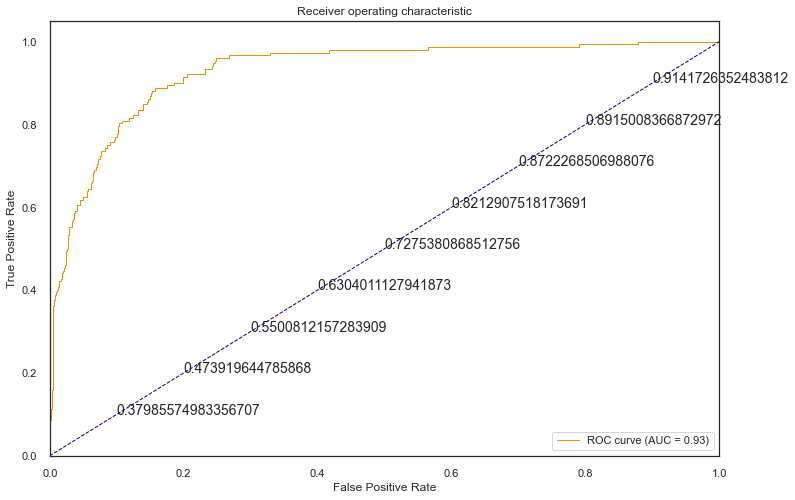

<Figure size 864x576 with 0 Axes>

In [439]:
# ROC Curve for Random Forest Classification

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC_Curve_for_RFC')

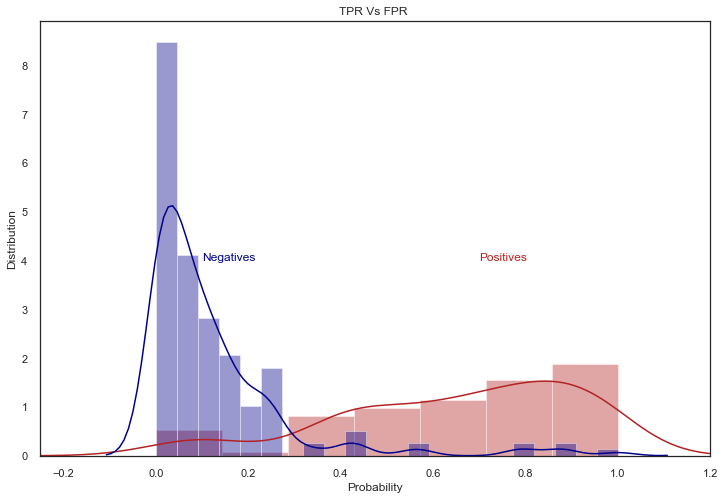

In [398]:
# TPR VS FPR
fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

#### Evaluation

In [399]:
from sklearn.metrics import classification_report,confusion_matrix

In [447]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1471
           1       0.41      0.82      0.55       152

    accuracy                           0.87      1623
   macro avg       0.70      0.85      0.74      1623
weighted avg       0.93      0.87      0.89      1623



In [448]:
print(confusion_matrix(y_val,predictions))

[[1294  177]
 [  28  124]]


In [1]:
!git branch

* feat-manage-1
  master
